#I. Extracci√≥n

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_json('/content/TelecomX_Data.json')
df


customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

#II. Transformaci√≥n

In [ ]:
# Normalizar cada una de las columnas del dataframe
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [ ]:
# Extrae las columnas que no son JSON (customerID y Churn)
customerID = df['customerID']
Churn = df['Churn']


In [ ]:
# concatenar las columnas en un solo dataframe
df = pd.concat([customerID, Churn, df_customer, df_phone, df_internet, df_account], axis=1)

df.sample(5)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
4953  6766-HFKLA    No  Female              0     Yes         No      56   
2007  2834-JRTUA   Yes    Male              0      No         No      71   
7112  9795-NREXC    No  Female              0     Yes         No      64   
1748  2481-SBOYW    No  Female              0      No        Yes      61   
3108  4325-NFSKC   Yes    Male              1      No         No      19   

     PhoneService MultipleLines InternetService  ...         OnlineBackup  \
4953          Yes           Yes     Fiber optic  ...                   No   
2007          Yes           Yes     Fiber optic  ...                   No   
7112          Yes           Yes             DSL  ...                   No   
1748          Yes           Yes              No  ...  No internet service   
3108          Yes           Yes     Fiber optic  ...                   No   

         DeviceProtection          TechSupport          StreamingTV  \
4953                  Yes                  Yes                  Yes   
2007                  Yes                  Yes                  Yes   
7112                  Yes                  Yes                  Yes   
1748  No internet service  No internet service  No internet service   
3108                   No                   No                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
4953                  Yes        Two year               No   
2007                  Yes        Two year              Yes   
7112                  Yes        Two year              Yes   
1748  No internet service        Two year              Yes   
3108                   No  Month-to-month              Yes   

                  PaymentMethod Charges.Monthly  Charges.Total  
4953  Bank transfer (automatic)          103.20        5744.35  
2007           Electronic check          108.05        7532.15  
7112    Credit card (automatic)           85.00         5484.4  
1748    Credit card (automatic)           25.00        1498.35  
3108           Electronic check           90.60           1660  

[5 rows x 21 columns]

In [ ]:
# Abrir archivo .md y mostrar el contenido del diccionario como texto
with open('/content/TelecomX_diccionario.md', 'r', encoding='utf-8') as f:
    contenido = f.read()

print(type(contenido))  # <class 'str'>
print(contenido)        # Imprime el contenido como texto


<class 'str'>
#### Diccionario de datos

- `customerID`: n√∫mero de identificaci√≥n √∫nico de cada cliente
- `Churn`: si el cliente dej√≥ o no la empresa
- `gender`: g√©nero (masculino y femenino)
- `SeniorCitizen`: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripci√≥n al servicio telef√≥nico
- `MultipleLines`: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
- `InternetService`: suscripci√≥n a un proveedor de internet
- `OnlineSecurity`: suscripci√≥n adicional de seguridad en l√≠nea
- `OnlineBackup`: suscripci√≥n adicional de respaldo en l√≠nea
- `DeviceProtection`: suscripci√≥n adicional de protecci√≥n del dispositivo
- `TechSupport`: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
- `StreamingTV`: suscripci√≥n de televisi√≥n por cable
- `StreamingMovies`: suscripci√≥n de

In [ ]:
# Ver cu√°ntos valores nulos hay por columna
df.isnull().sum()


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [ ]:
# Mostrar todas las filas que tienen al menos un valor nulo
print ('El numero de valores nulos es:', len(df[df.isnull().any(axis=1)]))

El numero de valores nulos es: 0


In [ ]:
df.shape

(7267, 21)

In [ ]:
# Filas que est√°n duplicadas exactamente (incluida la primera aparici√≥n)
duplicados_completos = df[df.duplicated(keep=False)]

# Opcional: Ordenar para que las filas duplicadas queden juntas
duplicados_ordenados = duplicados_completos.sort_values(by=df.columns.tolist())


print('El numero de filas duplicadas es: ', len(duplicados_ordenados))


El numero de filas duplicadas es:  0


In [ ]:
df.head(1)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
0               No         Yes         Yes              No  One year   

  PaperlessBilling PaymentMethod Charges.Monthly  Charges.Total  
0              Yes  Mailed check            65.6          593.3  

[1 rows x 21 columns]

In [ ]:
# Verificar los tipos de datos
df.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [ ]:
# Verificacion del tipo de dato de cada una una de las celdas de las columnas
columnas = [
    'customerID',	'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total'
]

for col in columnas:
    print(f"Tipos en la columna '{col}':")
    print(df[col].apply(type).value_counts())
    print(df[col].isna().sum())
    print("-" * 40)


Tipos en la columna 'customerID':
customerID
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'Churn':
Churn
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'gender':
gender
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'SeniorCitizen':
SeniorCitizen
<class 'int'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'Partner':
Partner
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'Dependents':
Dependents
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'tenure':
tenure
<class 'int'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'PhoneService':
PhoneService
<class 'str'>    7267
Nam

In [ ]:
# Cambio de tipo 'object' de la columna 'Charges.Total' a tipo 'float'
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Verifica si la conversi√≥n funcion√≥
print(df['Charges.Total'].apply(type).value_counts())
print(df['Charges.Total'].isna().sum())



Charges.Total
<class 'float'>    7267
Name: count, dtype: int64
11


In [ ]:
#Existen 11 valores nulos
df_nulos = df[df['Charges.Total'].isna()]
display(df_nulos)



customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975            No  No phone service             DSL  ...                  Yes   
1775          Yes                No              No  ...  No internet service   
1955          Yes               Yes             DSL  ...                  Yes   
2075          Yes                No              No  ...  No internet service   
2232          Yes                No              No  ...  No internet service   
2308          Yes               Yes              No  ...  No internet service   
2930          Yes               Yes             DSL  ...                  Yes   
3134          Yes               Yes              No  ...  No internet service   
3203           No  No phone service             DSL  ...                   No   
4169          Yes                No             DSL  ...                  Yes   
5599          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                   No                  Yes                   No   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                  Yes                  Yes                  Yes   
4169                  Yes                   No                  Yes   
5599  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
975                    No  Two year               No   
1775  No internet service  Two year               No   
1955                   No  Two year              Yes   
2075  No internet service  One year              Yes   
2232  No internet service  Two year               No   
2308  No internet service  Two year               No   
2930                   No  Two year               No   
3134  No internet service  Two year               No   
3203                   No  Two year              Yes   
4169                  Yes  Two year               No   
5599  No internet service  Two year               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
975     Credit card (automatic)           56.05            NaN  
1775               Mailed check           20.00            NaN  
1955  Bank transfer (automatic)           61.90            NaN  
2075               Mailed check           19.70            NaN  
2232               Mailed check           20.25            NaN  
2308               Mailed check           25.35            NaN  
2930               Mailed check           73.35            NaN  
3134               Mailed check           25.75            NaN  
3203  Ban

In [ ]:
#Para cada fila donde 'Charges.Total' es NaN, reemplazar ese NaN con el valor de 'Charges.Monthly' * 0.5'
#ya que la columna tenure o antiguedad en meses es igual a cero en estos casos debido a que es primer mes del cliente
#por lo que se va usar 'Charges.Monthly' * 0.5' como valor promedio para 'Charges.Total'

# La formulacion es: df.loc[condici√≥n, 'columna'] = nuevo_valor
df.loc[df['Charges.Total'].isna(), 'Charges.Total'] = (df['Charges.Monthly'] * 0.5)


In [ ]:
#Verificacion de transformacion de valores NaN
df_nulos = df[df['Charges.Total'].isna()]
display(df_nulos)

Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]

In [ ]:
# verificar si fueron cambiados correctamente
df.iloc[[975, 1955, 2930, 5599]]



customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975            No  No phone service             DSL  ...                  Yes   
1955          Yes               Yes             DSL  ...                  Yes   
2930          Yes               Yes             DSL  ...                  Yes   
5599          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
975                   Yes                  Yes                  Yes   
1955                   No                  Yes                   No   
2930                  Yes                  Yes                  Yes   
5599  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
975                    No  Two year               No   
1955                   No  Two year              Yes   
2930                   No  Two year               No   
5599  No internet service  Two year               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
975     Credit card (automatic)           56.05         28.025  
1955  Bank transfer (automatic)           61.90         30.950  
2930               Mailed check           73.35         36.675  
5599               Mailed check           19.85          9.925  

[4 rows x 21 columns]

In [ ]:
#verificar que los demas registros no fuero cambiados
df.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6         593.30  
1               No      Mailed check            59.9         542.40  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9         267.40  

[5 rows x 21 columns]

In [ ]:
# Ultima verificaci√≥n de columna Charges.Total
print(df['Charges.Total'].apply(type).value_counts())
print(df['Charges.Total'].isna().sum())

Charges.Total
<class 'float'>    7267
Name: count, dtype: int64
0


In [ ]:
# Estandarizaci√≥n de los encabezados de las columnas
import re

# Funci√≥n para estandarizar los nombres de las columnas
def estandarizar_columna(nombre):
    nombre = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', nombre)  # separa camel case, Reemplazando cada coincidencia del patr√≥n con un guion bajo (_) en la variable nombre.
    nombre = nombre.replace('.', '_')                     # reemplaza puntos
    nombre = nombre.strip().lower()                       # min√∫sculas y sin espacios
    return nombre

# Aplicar la funci√≥n a los nombres de las columnas
df.columns = [estandarizar_columna(col) for col in df.columns]
df.columns


Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [ ]:
df.head()

customer_id churn  gender  senior_citizen partner dependents  tenure  \
0  0002-ORFBO    No  Female               0     Yes        Yes       9   
1  0003-MKNFE    No    Male               0      No         No       9   
2  0004-TLHLJ   Yes    Male               0      No         No       4   
3  0011-IGKFF   Yes    Male               1     Yes         No      13   
4  0013-EXCHZ   Yes  Female               1     Yes         No       3   

  phone_service multiple_lines internet_service  ... online_backup  \
0           Yes             No              DSL  ...           Yes   
1           Yes            Yes              DSL  ...            No   
2           Yes             No      Fiber optic  ...            No   
3           Yes             No      Fiber optic  ...           Yes   
4           Yes             No      Fiber optic  ...            No   

  device_protection tech_support streaming_tv streaming_movies  \
0                No          Yes          Yes               No   
1                No           No           No              Yes   
2               Yes           No           No               No   
3               Yes           No          Yes              Yes   
4                No          Yes          Yes               No   

         contract paperless_billing    payment_method charges_monthly  \
0        One year               Yes      Mailed check            65.6   
1  Month-to-month                No      Mailed check            59.9   
2  Month-to-month               Yes  Electronic check            73.9   
3  Month-to-month               Yes  Electronic check            98.0   
4  Month-to-month               Yes      Mailed check            83.9   

   charges_total  
0         593.30  
1         542.40  
2         280.85  
3        1237.85  
4         267.40  

[5 rows x 21 columns]

In [ ]:
# Estandarizaci√≥n en los registros de las columnas 'object'

for col in df.select_dtypes(include='object').columns:
    df[col] = (
        df[col]
        .astype(str)                                 # Asegura strings
        .str.strip()                                 # Elimina espacios al inicio/final
        .str.lower()                                 # Convierte a min√∫sculas
        .str.replace(r'[\s\-]+', '_', regex=True)    # Reemplaza espacios y guiones medio por guion bajo
    )

df


customer_id churn  gender  senior_citizen partner dependents  tenure  \
0     0002_orfbo    no  female               0     yes        yes       9   
1     0003_mknfe    no    male               0      no         no       9   
2     0004_tlhlj   yes    male               0      no         no       4   
3     0011_igkff   yes    male               1     yes         no      13   
4     0013_exchz   yes  female               1     yes         no       3   
...          ...   ...     ...             ...     ...        ...     ...   
7262  9987_lutyd    no  female               0      no         no      13   
7263  9992_rramn   yes    male               0     yes         no      22   
7264  9992_ujoel    no    male               0      no         no       2   
7265  9993_lhieb    no    male               0     yes        yes      67   
7266  9995_hotoh    no    male               0     yes        yes      63   

     phone_service    multiple_lines internet_service  ... online_backup  \
0              yes                no              dsl  ...           yes   
1              yes               yes              dsl  ...            no   
2              yes                no      fiber_optic  ...            no   
3              yes                no      fiber_optic  ...           yes   
4              yes                no      fiber_optic  ...            no   
...            ...               ...              ...  ...           ...   
7262           yes                no              dsl  ...            no   
7263           yes               yes      fiber_optic  ...            no   
7264           yes                no              dsl  ...           yes   
7265           yes                no              dsl  ...            no   
7266            no  no_phone_service              dsl  ...           yes   

     device_protection tech_support streaming_tv streaming_movies  \
0                   no          yes          yes               no   
1                   no           no           no              yes   
2                  yes           no           no               no   
3                  yes           no          yes              yes   
4                   no          yes          yes               no   
...                ...          ...          ...              ...   
7262                no          yes           no               no   
7263                no           no           no              yes   
7264                no           no           no               no   
7265               yes          yes           no              yes   
7266               yes           no          yes              yes   

            contract paperless_billing    payment_method charges_monthly  \
0           one_year               yes      mailed_check           65.60   
1     month_to_month                no      mailed_check           59.90   
2     month_to_month               yes  electronic_check           73.90   
3     month_to_month               yes  electronic_check           98.00   
4     month_to_month               yes      mailed_check           83.90   
...              ...               ...               ...             ...   
7262        one_year                no      mailed_check           55.15   
7263  month_to_month               yes  electronic_check           85.10   
7264  month_to_month               yes      mailed_check           50.30   
7265        two_year                no      mailed_check           67.85   
7266        two_year                no  electronic_check           59.00   

      charges_total  
0            593.30  
1            542.40  
2            280.85  
3           1237.85  
4            267.40  
...             ...  
7262         742.90  
7263        1873.70  
7264          92.75  
7265        4627.65  
7266        3707.60  

[7267 rows x 21 columns]

In [ ]:
#Mostrar valores √∫nicos por cada columna
for col in df.columns:
    print(f"\nColumna: '{col}'")
    print(df[col].unique())



Columna: 'customer_id'
['0002_orfbo' '0003_mknfe' '0004_tlhlj' ... '9992_ujoel' '9993_lhieb'
 '9995_hotoh']

Columna: 'churn'
['no' 'yes' '']

Columna: 'gender'
['female' 'male']

Columna: 'senior_citizen'
[0 1]

Columna: 'partner'
['yes' 'no']

Columna: 'dependents'
['yes' 'no']

Columna: 'tenure'
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: 'phone_service'
['yes' 'no']

Columna: 'multiple_lines'
['no' 'yes' 'no_phone_service']

Columna: 'internet_service'
['dsl' 'fiber_optic' 'no']

Columna: 'online_security'
['no' 'yes' 'no_internet_service']

Columna: 'online_backup'
['yes' 'no' 'no_internet_service']

Columna: 'device_protection'
['no' 'yes' 'no_internet_service']

Columna: 'tech_support'
['yes' 'no' 'no_internet_service']

Columna: 'streaming_tv'
['yes' 'no' 'no_internet_service']

Columna: 's

In [ ]:
# Cantidad de cadenas vacias en la columna 'churn'

num_cadenas_vacias = (df['churn'] == '').sum()
print(num_cadenas_vacias)


224


Debido a que entre los datos que maneja la columna 'churn' esta el de cadena vacia:['No' 'Yes' ''], no es posible saber si esos clientes fueron dados de baja o no, por lo tando estas filas seran eliminadas y guardadas en un archivo, "clientes_por_vericar.csv", con el fin de que se defina la condici√≥n de sus clientes para hacer un analisis posterior. Ademas se puede verifica que la cantidad de filas eliminadas es 224 lo cual representa apenas: (224/7267) * 100 = 3.1%, lo cual no es representativo para nuestro analisis estadistico

In [ ]:
# Guardar filas eliminadas

# Filtrar las filas donde 'churn' es una cadena vac√≠a
filas_vacias = df[df['churn'] == '']

# Guardar esas filas en un archivo CSV
filas_vacias.to_csv('clientes_por_vericar.csv', index=False)



In [ ]:
# verificacion del archivo 'clientes_por_vericar.csv'

df_clientes_por_vericar = pd.read_csv('/content/clientes_por_vericar.csv', keep_default_na=False)
df_clientes_por_vericar.head()


customer_id churn  gender  senior_citizen partner dependents  tenure  \
0  0047_zhdtw        female               0      no         no      11   
1  0120_yzlqa          male               0      no         no      71   
2  0154_qyhju          male               0      no         no      29   
3  0162_rzgmz        female               1      no         no       5   
4  0274_vvqoq          male               1     yes         no      65   

  phone_service multiple_lines internet_service  ...        online_backup  \
0           yes            yes      fiber_optic  ...                   no   
1           yes             no               no  ...  no_internet_service   
2           yes             no              dsl  ...                  yes   
3           yes             no              dsl  ...                  yes   
4           yes            yes      fiber_optic  ...                  yes   

     device_protection         tech_support         streaming_tv  \
0                   no                   no                   no   
1  no_internet_service  no_internet_service  no_internet_service   
2                   no                  yes                   no   
3                   no                  yes                   no   
4                  yes                   no                  yes   

      streaming_movies        contract paperless_billing  \
0                   no  month_to_month               yes   
1  no_internet_service        two_year               yes   
2                   no        one_year               yes   
3                   no  month_to_month                no   
4                  yes        one_year               yes   

              payment_method charges_monthly  charges_total  
0  bank_transfer_(automatic)           79.00         929.30  
1    credit_card_(automatic)           19.90        1355.10  
2           electronic_check           58.75        1696.20  
3    credit_card_(automatic)           59.90         287.85  
4  bank_transfer_(automatic)          103.15        6792.45  

[5 rows x 21 columns]

In [ ]:
# Eliminar en el dataframe original, df, las filas donde la columna 'churn', tenga cadenas vacias

# Mantener solo las filas donde churn NO es cadena vac√≠a
# Convertir en una copia expl√≠cita el resultado del filtro, porque sino se hace pandas podria
# pensar que la asignacion, df, es una vista, y va ha generar una Advertencia cuando adicione la columna 'charges_monthly'
# El df original ya no existe, a menos que lo hubieras guardado previamente en otra variable
# la variable df ahora apunta a ese nuevo DataFrame filtrado.
df = df[df['churn'] != ''].copy()
df


customer_id churn  gender  senior_citizen partner dependents  tenure  \
0     0002_orfbo    no  female               0     yes        yes       9   
1     0003_mknfe    no    male               0      no         no       9   
2     0004_tlhlj   yes    male               0      no         no       4   
3     0011_igkff   yes    male               1     yes         no      13   
4     0013_exchz   yes  female               1     yes         no       3   
...          ...   ...     ...             ...     ...        ...     ...   
7262  9987_lutyd    no  female               0      no         no      13   
7263  9992_rramn   yes    male               0     yes         no      22   
7264  9992_ujoel    no    male               0      no         no       2   
7265  9993_lhieb    no    male               0     yes        yes      67   
7266  9995_hotoh    no    male               0     yes        yes      63   

     phone_service    multiple_lines internet_service  ... online_backup  \
0              yes                no              dsl  ...           yes   
1              yes               yes              dsl  ...            no   
2              yes                no      fiber_optic  ...            no   
3              yes                no      fiber_optic  ...           yes   
4              yes                no      fiber_optic  ...            no   
...            ...               ...              ...  ...           ...   
7262           yes                no              dsl  ...            no   
7263           yes               yes      fiber_optic  ...            no   
7264           yes                no              dsl  ...           yes   
7265           yes                no              dsl  ...            no   
7266            no  no_phone_service              dsl  ...           yes   

     device_protection tech_support streaming_tv streaming_movies  \
0                   no          yes          yes               no   
1                   no           no           no              yes   
2                  yes           no           no               no   
3                  yes           no          yes              yes   
4                   no          yes          yes               no   
...                ...          ...          ...              ...   
7262                no          yes           no               no   
7263                no           no           no              yes   
7264                no           no           no               no   
7265               yes          yes           no              yes   
7266               yes           no          yes              yes   

            contract paperless_billing    payment_method charges_monthly  \
0           one_year               yes      mailed_check           65.60   
1     month_to_month                no      mailed_check           59.90   
2     month_to_month               yes  electronic_check           73.90   
3     month_to_month               yes  electronic_check           98.00   
4     month_to_month               yes      mailed_check           83.90   
...              ...               ...               ...             ...   
7262        one_year                no      mailed_check           55.15   
7263  month_to_month               yes  electronic_check           85.10   
7264  month_to_month               yes      mailed_check           50.30   
7265        two_year                no      mailed_check           67.85   
7266        two_year                no  electronic_check           59.00   

      charges_total  
0            593.30  
1            542.40  
2            280.85  
3           1237.85  
4            267.40  
...             ...  
7262         742.90  
7263        1873.70  
7264          92.75  
7265        4627.65  
7266        3707.60  

[7043 rows x 21 columns]

In [ ]:
# verificar que se hayan eliminado las filas con cadena vacia de la columna 'churn'
print(f"Valores unicos en la columna 'churn': {df['churn'].unique()}")



Valores unicos en la columna 'churn': ['no' 'yes']


In [ ]:
# Veificacion de numero de filas
df.shape

(7043, 21)

In [ ]:
# "Restablecer √≠ndices"
df.reset_index(drop=True, inplace=True)


In [ ]:
# Creacion de columna cuentas diarias
df['daily_account'] = df['charges_monthly'] / 30
df.head()

customer_id churn  gender  senior_citizen partner dependents  tenure  \
0  0002_orfbo    no  female               0     yes        yes       9   
1  0003_mknfe    no    male               0      no         no       9   
2  0004_tlhlj   yes    male               0      no         no       4   
3  0011_igkff   yes    male               1     yes         no      13   
4  0013_exchz   yes  female               1     yes         no       3   

  phone_service multiple_lines internet_service  ... device_protection  \
0           yes             no              dsl  ...                no   
1           yes            yes              dsl  ...                no   
2           yes             no      fiber_optic  ...               yes   
3           yes             no      fiber_optic  ...               yes   
4           yes             no      fiber_optic  ...                no   

  tech_support streaming_tv streaming_movies        contract  \
0          yes          yes               no        one_year   
1           no           no              yes  month_to_month   
2           no           no               no  month_to_month   
3           no          yes              yes  month_to_month   
4          yes          yes               no  month_to_month   

  paperless_billing    payment_method charges_monthly charges_total  \
0               yes      mailed_check            65.6        593.30   
1                no      mailed_check            59.9        542.40   
2               yes  electronic_check            73.9        280.85   
3               yes  electronic_check            98.0       1237.85   
4               yes      mailed_check            83.9        267.40   

   daily_account  
0       2.186667  
1       1.996667  
2       2.463333  
3       3.266667  
4       2.796667  

[5 rows x 22 columns]

In [ ]:
# Reubicar la columna daily_account
# Paso 1: Sacar la columna
columna = df.pop('daily_account')

# Paso 2: Insertarla en la posici√≥n deseada (posici√≥n 20 ‚Üí √≠ndice 19)
df.insert(19, 'daily_account', columna)
df.head()

customer_id churn  gender  senior_citizen partner dependents  tenure  \
0  0002_orfbo    no  female               0     yes        yes       9   
1  0003_mknfe    no    male               0      no         no       9   
2  0004_tlhlj   yes    male               0      no         no       4   
3  0011_igkff   yes    male               1     yes         no      13   
4  0013_exchz   yes  female               1     yes         no       3   

  phone_service multiple_lines internet_service  ... device_protection  \
0           yes             no              dsl  ...                no   
1           yes            yes              dsl  ...                no   
2           yes             no      fiber_optic  ...               yes   
3           yes             no      fiber_optic  ...               yes   
4           yes             no      fiber_optic  ...                no   

  tech_support streaming_tv streaming_movies        contract  \
0          yes          yes               no        one_year   
1           no           no              yes  month_to_month   
2           no           no               no  month_to_month   
3           no          yes              yes  month_to_month   
4          yes          yes               no  month_to_month   

  paperless_billing    payment_method daily_account charges_monthly  \
0               yes      mailed_check      2.186667            65.6   
1                no      mailed_check      1.996667            59.9   
2               yes  electronic_check      2.463333            73.9   
3               yes  electronic_check      3.266667            98.0   
4               yes      mailed_check      2.796667            83.9   

   charges_total  
0         593.30  
1         542.40  
2         280.85  
3        1237.85  
4         267.40  

[5 rows x 22 columns]

In [ ]:
# redondear decimales a un digito
columnas = ['daily_account', 'charges_monthly', 'charges_total']
df[columnas] = df[columnas].round(1)
df.head()


customer_id churn  gender  senior_citizen partner dependents  tenure  \
0  0002_orfbo    no  female               0     yes        yes       9   
1  0003_mknfe    no    male               0      no         no       9   
2  0004_tlhlj   yes    male               0      no         no       4   
3  0011_igkff   yes    male               1     yes         no      13   
4  0013_exchz   yes  female               1     yes         no       3   

  phone_service multiple_lines internet_service  ... device_protection  \
0           yes             no              dsl  ...                no   
1           yes            yes              dsl  ...                no   
2           yes             no      fiber_optic  ...               yes   
3           yes             no      fiber_optic  ...               yes   
4           yes             no      fiber_optic  ...                no   

  tech_support streaming_tv streaming_movies        contract  \
0          yes          yes               no        one_year   
1           no           no              yes  month_to_month   
2           no           no               no  month_to_month   
3           no          yes              yes  month_to_month   
4          yes          yes               no  month_to_month   

  paperless_billing    payment_method daily_account charges_monthly  \
0               yes      mailed_check           2.2            65.6   
1                no      mailed_check           2.0            59.9   
2               yes  electronic_check           2.5            73.9   
3               yes  electronic_check           3.3            98.0   
4               yes      mailed_check           2.8            83.9   

   charges_total  
0          593.3  
1          542.4  
2          280.8  
3         1237.8  
4          267.4  

[5 rows x 22 columns]

In [ ]:
# Verificar que la columna recien creada, 'daily_account' sea tipo float
df['daily_account'].dtype

dtype('float64')

In [ ]:
# Traducir los encabezados de las columnas
df = df.rename(columns={
    'customer_id': 'id_cliente',
    'churn': 'desafiliado',
    'gender': 'genero',
    'senior_citizen': 'persona_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'antiguedad',
    'phone_service': 'servicio_telefonico',
    'multiple_lines': 'multiples_lineas',
    'internet_service': 'servicio_de_internet',
    'online_security': 'seguridad_en_linea',
    'online_backup': 'copia_de_seguridad_en_linea',
    'device_protection': 'proteccion_de_dispositivos',
    'tech_support': 'soporte_tecnico',
    'streaming_tv': 'television_en_streaming',
    'streaming_movies': 'peliculas_en_streaming',
    'contract': 'contrato',
    'paperless_billing': 'facturacion_electronica',
    'payment_method': 'metodo_de_pago',
    'daily_account': 'cargo_diario',
    'charges_monthly': 'cargo_mensual',
    'charges_total': 'cargo_total'
})
df.head()

id_cliente desafiliado  genero  persona_mayor pareja dependientes  \
0  0002_orfbo          no  female              0    yes          yes   
1  0003_mknfe          no    male              0     no           no   
2  0004_tlhlj         yes    male              0     no           no   
3  0011_igkff         yes    male              1    yes           no   
4  0013_exchz         yes  female              1    yes           no   

   antiguedad servicio_telefonico multiples_lineas servicio_de_internet  ...  \
0           9                 yes               no                  dsl  ...   
1           9                 yes              yes                  dsl  ...   
2           4                 yes               no          fiber_optic  ...   
3          13                 yes               no          fiber_optic  ...   
4           3                 yes               no          fiber_optic  ...   

  proteccion_de_dispositivos soporte_tecnico television_en_streaming  \
0                         no             yes                     yes   
1                         no              no                      no   
2                        yes              no                      no   
3                        yes              no                     yes   
4                         no             yes                     yes   

  peliculas_en_streaming        contrato facturacion_electronica  \
0                     no        one_year                     yes   
1                    yes  month_to_month                      no   
2                     no  month_to_month                     yes   
3                    yes  month_to_month                     yes   
4                     no  month_to_month                     yes   

     metodo_de_pago cargo_diario cargo_mensual  cargo_total  
0      mailed_check          2.2          65.6        593.3  
1      mailed_check          2.0          59.9        542.4  
2  electronic_check          2.5          73.9        280.8  
3  electronic_check          3.3          98.0       1237.8  
4      mailed_check          2.8          83.9        267.4  

[5 rows x 22 columns]

In [ ]:
# Traducir al espa√±ol los registros

# Diccionario de traducci√≥n para todos los valores √∫nicos
traduccion = {
    # Valores generales yes/no
    'yes': 'si',
    'no': 'no',

    # G√©nero
    'female': 'femenino',
    'male': 'masculino',

    # Servicios espec√≠ficos
    'no_phone_service': 'sin_servicio_telefonico',
    'no_internet_service': 'sin_servicio_de_internet',

    # Servicio de internet
    'dsl': 'dsl',
    'fiber_optic': 'fibra_optica',

    # Tipos de contrato
    'one_year': 'un_ano',
    'month_to_month': 'mes_a_mes',
    'two_year': 'dos_anos',

    # M√©todos de pago
    'mailed_check': 'cheque_por_correo',
    'electronic_check': 'cheque_electronico',
    'credit_card_(automatic)': 'tarjeta_de_credito_(automatico)',
    'bank_transfer_(automatic)': 'transferencia_bancaria_(automatico)'
}

# Aplicar replace() a todo el DataFrame para traducir los valores
df = df.replace(traduccion)

df.tail()

id_cliente desafiliado     genero  persona_mayor pareja dependientes  \
7038  9987_lutyd          no   femenino              0     no           no   
7039  9992_rramn          si  masculino              0     si           no   
7040  9992_ujoel          no  masculino              0     no           no   
7041  9993_lhieb          no  masculino              0     si           si   
7042  9995_hotoh          no  masculino              0     si           si   

      antiguedad servicio_telefonico         multiples_lineas  \
7038          13                  si                       no   
7039          22                  si                       si   
7040           2                  si                       no   
7041          67                  si                       no   
7042          63                  no  sin_servicio_telefonico   

     servicio_de_internet  ... proteccion_de_dispositivos soporte_tecnico  \
7038                  dsl  ...                         no              si   
7039         fibra_optica  ...                         no              no   
7040                  dsl  ...                         no              no   
7041                  dsl  ...                         si              si   
7042                  dsl  ...                         si              no   

     television_en_streaming peliculas_en_streaming   contrato  \
7038                      no                     no     un_ano   
7039                      no                     si  mes_a_mes   
7040                      no                     no  mes_a_mes   
7041                      no                     si   dos_anos   
7042                      si                     si   dos_anos   

     facturacion_electronica      metodo_de_pago cargo_diario cargo_mensual  \
7038                      no   cheque_por_correo          1.8          55.2   
7039                      si  cheque_electronico          2.8          85.1   
7040                      si   cheque_por_correo          1.7          50.3   
7041                      no   cheque_por_correo          2.3          67.8   
7042                      no  cheque_electronico          2.0          59.0   

      cargo_total  
7038        742.9  
7039       1873.7  
7040         92.8  
7041       4627.6  
7042       3707.6  

[5 rows x 22 columns]

In [ ]:
#Mostrar valores √∫nicos por cada columna
for col in df.columns:
    print(f"\nColumna: '{col}'")
    print(df[col].unique())



Columna: 'id_cliente'
['0002_orfbo' '0003_mknfe' '0004_tlhlj' ... '9992_ujoel' '9993_lhieb'
 '9995_hotoh']

Columna: 'desafiliado'
['no' 'si']

Columna: 'genero'
['femenino' 'masculino']

Columna: 'persona_mayor'
[0 1]

Columna: 'pareja'
['si' 'no']

Columna: 'dependientes'
['si' 'no']

Columna: 'antiguedad'
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Columna: 'servicio_telefonico'
['si' 'no']

Columna: 'multiples_lineas'
['no' 'si' 'sin_servicio_telefonico']

Columna: 'servicio_de_internet'
['dsl' 'fibra_optica' 'no']

Columna: 'seguridad_en_linea'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'copia_de_seguridad_en_linea'
['si' 'no' 'sin_servicio_de_internet']

Columna: 'proteccion_de_dispositivos'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'soporte_tecnico'
['si' 'no' 'sin_servicio_de_internet']

In [ ]:
#Guardar dataframe
df.to_csv("/content/telecomX_Data.csv", index=False)


#III. Pipeline
A continuaci√≥n se muestran los pasos que realiza el pipeline para comparar un modelo basico Random Forest y otro modelo optimizado Random Forest en un problema de clasificaci√≥n binaria como la deserci√≥n de clientes.
refleja).

| N¬∫   | Etapa                                                                       | Descripci√≥n                                                                                                                                                                     |
| ---- | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|      | üü© **FASE A: Exploraci√≥n y limpieza del dataset inicial**                |                                                                                                                                                                                 |
| 1    | Importaci√≥n de librer√≠as                                                    | Importar `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`, etc.                                                                                                            |
| 2    | Carga de datos                                                              | Leer datos desde archivo `.csv`, `.xlsx` o base de datos.                                                                                                                       |
| 3    | Visualizaci√≥n general de datos                                              | Usar `df.info()`, `df.describe()`, `df.sample()` para explorar la estructura general.                                                                                           |
| 3A   | Selecci√≥n del modelo                                                        | Definir el modelo base a utilizar para la etapa inicial de pruebas (por ejemplo, `RandomForestClassifier`). Esta selecci√≥n puede cambiar en pasos posteriores seg√∫n resultados. |
| 4    | Validaci√≥n de estructura                                                    | Verificar tipos de datos, valores nulos, duplicados, errores de escritura, etc.                                                                                                 |
| 5    | Codificaci√≥n de variable objetivo                                           | Convertir `desafiliado`: `"si"` ‚Üí 1, `"no"` ‚Üí 0.                                                                                                                                |
| 6    | Eliminaci√≥n de columnas no predictivas                                      | Eliminar columnas irrelevantes (`id_cliente`, c√≥digos √∫nicos, etc.).                                                                                                            |
| 7    | Codificaci√≥n de variables temporales                                        | Crear nuevas columnas derivadas de la antig√ºedad (por ejemplo, grupos de antig√ºedad).                                                                                           |
| 8    | An√°lisis de variable objetivo                                               | Revisar el balance de clases con `value_counts(normalize=True).plot(kind="bar")`.                                                                                               |
|      | üü¶ **FASE B: Ingenier√≠a y preparaci√≥n de datos**                            |                                                                                                                                                                                 |
| 9    | Codificaci√≥n de variables categ√≥ricas                                       | Definir funci√≥n para codificaci√≥n binaria (`replace`) y multiclase (`OneHotEncoder` o `get_dummies`) que luego se integrar√° al paso 19.                                         |
| 10   | Feature engineering                                                         | Definir funci√≥n con transformaciones mec√°nicas (columnas combinadas, c√°lculos derivados, indicadores) para integrarla al paso 19.                                               |
| 10B  | An√°lisis de correlaci√≥n y depuraci√≥n de variables                           | Identificar correlaciones altas y eliminar variables redundantes para evitar multicolinealidad.                                                                                 |
| 11   | An√°lisis de frecuencia dominante                                            | Identificar y eliminar variables con una sola categor√≠a dominante (>95% frecuencia).                                                                                            |
| 12   | An√°lisis de baja varianza                                                   | Eliminar variables con varianza muy baja (‚âà0) usando `VarianceThreshold()`.                                                                                                     |
| 13   | An√°lisis de skewness                                                        | Definir funci√≥n para transformar variables con alta asimetr√≠a (log, Box-Cox, Yeo-Johnson) y conectarla al paso 19.                                                              |
| 14   | Evaluaci√≥n de importancia de variables                                      | Usar modelo preliminar (`RandomForest`) o correlaci√≥n para identificar variables irrelevantes.                                                                                  |
| 14.1 | An√°lisis gr√°fico de distribuci√≥n de variables relevantes respecto a la variable objetivo                                                           | Revisar manualmente variables relevantes seg√∫n conocimiento de negocio y contexto del problema.                                                                                 |
| 15   | Eliminaci√≥n de variables irrelevantes                                       | Eliminar variables sin aporte seg√∫n an√°lisis previos.                                                                                                                           |
| 16   | Separaci√≥n de datos                                                         | Usar `train_test_split()` antes de aplicar imputaci√≥n, codificaci√≥n o SMOTE para evitar data leakage.                                                                           |
| 17   | Eliminaci√≥n de outliers                                                     | Eliminar valores extremos mediante IQR **solo sobre X\_train**, para evitar afectar datos de validaci√≥n o test.                                                                 |
| 18   | Correcci√≥n del desbalance                                                   | Aplicar **SMOTE o RandomUnderSampler solo al `X_train`**, o usar `class_weight="balanced"` en el modelo.                                                                        |
| 20   | Construcci√≥n del modelo inicial                                             | Usa `Pipeline(steps=[..., modelo])` para conectar `preprocesador` y modelo. Entrena con **dataset balanceado y sin outliers** del Paso 18.                                      |
|      | üü® **FASE C: Modelado y evaluaci√≥n**                                        |                                                                                                                                                                                 |
| 22   | Validaci√≥n cruzada inicial (optimizando F1-score)                           | Evaluar con `cross_val_score()` y `cv=5` priorizando el F1-score.                                                                                                               |
| 22.1 | Curvas ROC y Precision-Recall para ajuste de umbral                         | Visualizar desempe√±o del modelo y entender el comportamiento de recall y precisi√≥n a diferentes umbrales.                                                                       |
| 22.2 | Selecci√≥n de umbral √≥ptimo que maximiza el F1-score                         | Calcular y elegir el umbral que ofrezca el mejor F1-score.                                                                                                                      |
| 23   | Optimizaci√≥n de hiperpar√°metros maximizando F1-score                        | Ajustar modelo con `GridSearchCV` o `RandomizedSearchCV` priorizando el F1-score.                                                                                               |
| 24   | Entrenamiento modelo optimizado                                             | Ajustar modelo con hiperpar√°metros √≥ptimos usando dataset transformado (Paso 20).                                                                                               |
| 24.1 | Validaci√≥n cruzada del modelo optimizado (umbral 0.5)                       | Medir rendimiento del modelo optimizado usando validaci√≥n cruzada sin ajuste de umbral.                                                                                         |
| 25   | Evaluaci√≥n final (con ajuste de umbral)                                     | Medir m√©tricas sobre `X_test` usando el umbral √≥ptimo encontrado.                                                                                                               |
| 26   | Visualizaci√≥n del impacto del umbral                                        | Comparar gr√°ficamente el cambio de m√©tricas con y sin ajuste de umbral.                                                                                                         |
| 27   | Interpretabilidad del modelo optimizado                                     | Explicar decisiones con `.feature_importances_` o `SHAP`.                                                                                                                       |
| 27.1 | Obtener y ordenar las importancias de las caracter√≠sticas                   | Listar las variables m√°s influyentes seg√∫n el modelo.                                                                                                                           |
| 27.2 | Interpretaci√≥n de las caracter√≠sticas m√°s importantes                       | Analizar las variables clave y su impacto en la predicci√≥n.                                                                                                                     |
| 27.3 | Comparaci√≥n de m√©tricas de evaluaci√≥n: modelo inicial vs. modelo optimizado | Comparar m√©tricas clave entre ambos modelos para medir mejoras o p√©rdidas.                                                                                                      |
| 27.4 | Matriz de Confusi√≥n del Modelo Inicial                                      | Mostrar distribuci√≥n de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos del modelo base.                                                        |
| 27.5 | Matriz de Confusi√≥n del Modelo Optimizado (con umbral ajustado)             | Mostrar distribuci√≥n de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos del modelo optimizado con ajuste de umbral.                             |
| 27.6 | Comparaci√≥n de m√©tricas de validaci√≥n cruzada                               | Comparar los resultados de validaci√≥n cruzada entre el modelo inicial y el modelo optimizado.                                                                                   |
|      | üü´ **FASE D: Producci√≥n y documentaci√≥n**                                   |                                                                                                                                                                                 |
| 28   | Guardado del modelo optimizado.                                                   | `joblib.dump()` o `pickle`.                                                                                                                                                     |
| 29   | Carga y validaci√≥n del modelo guardado                                      | Comprobar que el modelo se guarda y carga correctamente antes de producci√≥n.                                                                                                    |
| 30   | Informe de Selecci√≥n del Modelo y Estrategias de Retenci√≥n de Clientes      | Documentar decisiones, m√©tricas y explicaciones.                                                                                                                                |


## üü© FASE A: Exploraci√≥n y limpieza

###**1.   Importaci√≥n de librer√≠as**


In [ ]:
#1. Manipulaci√≥n de datos
import pandas as pd
import numpy as np

#2 Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

#3. Preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

#4. Modelo de Clasificaci√≥n
from sklearn.ensemble import RandomForestClassifier


#5. Evaluaci√≥n del modelo
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)


#6. Balanceo de clases
from imblearn.over_sampling import SMOTE

#7. Detecci√≥n de outliers
from scipy import stats

#8. Optimizaci√≥n de hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV





### **2. Carga de datos**

In [ ]:
df = pd.read_csv('/content/telecomX_Data.csv')
df.sample(5)

id_cliente desafiliado     genero  persona_mayor pareja dependientes  \
2488  3565_unocc          si   femenino              1     si           no   
4679  6599_rclcj          si  masculino              0     si           no   
908   1322_agoqm          si  masculino              0     no           no   
751   1095_wgngg          no   femenino              0     si           no   
5560  7826_vvkwt          no   femenino              1     si           si   

      antiguedad servicio_telefonico         multiples_lineas  \
2488          29                  si                       si   
4679          47                  si                       si   
908           46                  no  sin_servicio_telefonico   
751           61                  si                       si   
5560          24                  si                       no   

     servicio_de_internet  ... proteccion_de_dispositivos soporte_tecnico  \
2488         fibra_optica  ...                         si              no   
4679         fibra_optica  ...                         si              si   
908                   dsl  ...                         no              no   
751          fibra_optica  ...                         no              no   
5560         fibra_optica  ...                         si              no   

     television_en_streaming peliculas_en_streaming   contrato  \
2488                      si                     si  mes_a_mes   
4679                      si                     si  mes_a_mes   
908                       no                     no  mes_a_mes   
751                       si                     si   dos_anos   
5560                      si                     si   dos_anos   

     facturacion_electronica                       metodo_de_pago  \
2488                      si  transferencia_bancaria_(automatico)   
4679                      si                   cheque_electronico   
908                       no  transferencia_bancaria_(automatico)   
751                       si  transferencia_bancaria_(automatico)   
5560                      si                   cheque_electronico   

     cargo_diario cargo_mensual  cargo_total  
2488          3.3          99.0       2952.8  
4679          3.7         109.6       5124.6  
908           1.0          30.3       1380.1  
751           3.4         101.0       5971.2  
5560          3.2          96.6       2263.4  

[5 rows x 22 columns]

###***3. Visualizaci√≥n general de datos***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   7043 non-null   object 
 1   desafiliado                  7043 non-null   object 
 2   genero                       7043 non-null   object 
 3   persona_mayor                7043 non-null   int64  
 4   pareja                       7043 non-null   object 
 5   dependientes                 7043 non-null   object 
 6   antiguedad                   7043 non-null   int64  
 7   servicio_telefonico          7043 non-null   object 
 8   multiples_lineas             7043 non-null   object 
 9   servicio_de_internet         7043 non-null   object 
 10  seguridad_en_linea           7043 non-null   object 
 11  copia_de_seguridad_en_linea  7043 non-null   object 
 12  proteccion_de_dispositivos   7043 non-null   object 
 13  soporte_tecnico   

In [ ]:
df.describe()

persona_mayor   antiguedad  cargo_diario  cargo_mensual  cargo_total
count    7043.000000  7043.000000   7043.000000     7043.00000  7043.000000
mean        0.162147    32.371149      2.160173       64.76138  2279.765767
std         0.368612    24.559481      1.000961       30.09058  2266.761688
min         0.000000     0.000000      0.600000       18.20000     9.800000
25%         0.000000     9.000000      1.200000       35.50000   398.600000
50%         0.000000    29.000000      2.300000       70.40000  1394.600000
75%         0.000000    55.000000      3.000000       89.80000  3786.600000
max         1.000000    72.000000      4.000000      118.80000  8684.800000

In [ ]:
df.sample(5)

id_cliente desafiliado     genero  persona_mayor pareja dependientes  \
3068  4391_reshn          si  masculino              0     no           no   
573   0841_nulxi          si  masculino              0     no           no   
3988  5624_bqssa          si   femenino              0     no           no   
320   0479_hmswa          no   femenino              0     no           si   
1248  1846_xwoqn          si   femenino              1     no           no   

      antiguedad servicio_telefonico         multiples_lineas  \
3068          23                  si                       si   
573            1                  no  sin_servicio_telefonico   
3988           1                  si                       no   
320           26                  si                       no   
1248           1                  si                       no   

     servicio_de_internet  ... proteccion_de_dispositivos  \
3068         fibra_optica  ...                         si   
573                   dsl  ...                         no   
3988                   no  ...   sin_servicio_de_internet   
320          fibra_optica  ...                         si   
1248         fibra_optica  ...                         no   

               soporte_tecnico   television_en_streaming  \
3068                        si                        si   
573                         no                        no   
3988  sin_servicio_de_internet  sin_servicio_de_internet   
320                         si                        si   
1248                        no                        no   

        peliculas_en_streaming   contrato facturacion_electronica  \
3068                        si  mes_a_mes                      si   
573                         si  mes_a_mes                      si   
3988  sin_servicio_de_internet  mes_a_mes                      no   
320                         si   dos_anos                      si   
1248                        no  mes_a_mes                      si   

          metodo_de_pago cargo_diario cargo_mensual  cargo_total  
3068   cheque_por_correo          3.5         104.0       2470.1  
573   cheque_electronico          1.2          35.6         35.6  
3988   cheque_por_correo          0.7          21.0         21.0  
320   cheque_electronico          3.5         105.4       2715.3  
1248  cheque_electronico          2.3          70.2         70.2  

[5 rows x 22 columns]

###**3A. Selecci√≥n del modelo**

En la siguitente tabla se justifica la selecci√≥n del algoritmo ***Random Forest*** para predecir valores binarios de la variable objetivo (desafiliado):

| Caracter√≠stica                                      | Random Forest                              |
| --------------------------------------------------- | ------------------------------------------ |
| ‚úîÔ∏è Clasificaci√≥n binaria                            | Naturalmente dise√±ado para esto            |
| ‚ùå No requiere normalizaci√≥n                         | S√≠                                         |
| üß† Maneja relaciones no lineales                    | Muy bien                                   |
| üìâ Reduce sobreajuste (overfitting)                 | Bastante bien (por el promedio de √°rboles) |
| üß± Acepta variables categ√≥ricas (tras codificaci√≥n) | S√≠                                         |
| ‚úÖ Soporte para pesos/clases desbalanceadas          | S√≠ (con `class_weight`)                    |
| üìä M√©tricas disponibles                             | Accuracy, Precision, Recall, F1, AUC       |


###***4	Validaci√≥n de estructura***

La validacion de la estructura, se muestra en el apartado II  Transformaci√≥n, incluido en este notebook que se realiz√≥ como parte del challenge TelecomX parte 1.

In [ ]:
# Revici√≥n de filas duplicadas
duplicados = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas: {duplicados}")


N√∫mero de filas duplicadas: 0


###***5. Codificaci√≥n de variable objetivo***

In [ ]:
# vamos a usar .replace() para remplazar los valores dentro del diccionario y si quedaron reciduos se trataran,
# Con .map() no puedo tratar los reciduos (valores qu estan por fuera del diccionario), por que los remplaza por NaN automaticamente
df["desafiliado"] = df["desafiliado"].replace({"si": 1, "no": 0}).astype("int") #  A partir de pandas 3.0, ese cambio autom√°tico dejar√° de hacerse en silencio. T√∫ deber√°s decidir si quieres que se cambie el tipo de dato, por lo cual se debe escribir explicitamente .astype("int")
df.sample(5)


/tmp/ipython-input-4084006805.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["desafiliado"] = df["desafiliado"].replace({"si": 1, "no": 0}).astype("int") #  A partir de pandas 3.0, ese cambio autom√°tico dejar√° de hacerse en silencio. T√∫ deber√°s decidir si quieres que se cambie el tipo de dato, por lo cual se debe escribir explicitamente .astype("int")


id_cliente  desafiliado     genero  persona_mayor pareja dependientes  \
3822  5375_xldof            0  masculino              0     si           si   
1065  1552_tkmxs            0   femenino              0     si           no   
98    0174_qrvvy            0  masculino              0     si           si   
4030  5684_fjvyr            0   femenino              0     si           si   
5553  7817_omjna            0  masculino              0     no           no   

      antiguedad servicio_telefonico multiples_lineas servicio_de_internet  \
3822          69                  si               si         fibra_optica   
1065          42                  si               no                   no   
98            71                  si               si                   no   
4030          72                  si               si         fibra_optica   
5553          14                  si               no                   no   

      ... proteccion_de_dispositivos           soporte_tecnico  \
3822  ...                         si                        si   
1065  ...   sin_servicio_de_internet  sin_servicio_de_internet   
98    ...   sin_servicio_de_internet  sin_servicio_de_internet   
4030  ...                         no                        si   
5553  ...   sin_servicio_de_internet  sin_servicio_de_internet   

       television_en_streaming    peliculas_en_streaming   contrato  \
3822                        si                        si   dos_anos   
1065  sin_servicio_de_internet  sin_servicio_de_internet  mes_a_mes   
98    sin_servicio_de_internet  sin_servicio_de_internet   dos_anos   
4030                        no                        no   dos_anos   
5553  sin_servicio_de_internet  sin_servicio_de_internet     un_ano   

     facturacion_electronica                       metodo_de_pago  \
3822                      si  transferencia_bancaria_(automatico)   
1065                      no      tarjeta_de_credito_(automatico)   
98                        no      tarjeta_de_credito_(automatico)   
4030                      si  transferencia_bancaria_(automatico)   
5553                      no  transferencia_bancaria_(automatico)   

     cargo_diario cargo_mensual  cargo_total  
3822          3.8         114.4       7665.8  
1065          0.7          20.4        869.9  
98            0.8          25.4       1847.6  
4030          3.0          90.4       6563.4  
5553          0.7          20.4        275.7  

[5 rows x 22 columns]

In [ ]:
# Revisar duplicados
duplicados_original = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas en df: {duplicados_original}")


N√∫mero de filas duplicadas en df: 0


###**6. Eliminaci√≥n de columnas no predictivas**

In [ ]:
#Eliminaci√≥n de la columna "id_cliente"
df=df.drop(columns='id_cliente')
df.columns

Index(['desafiliado', 'genero', 'persona_mayor', 'pareja', 'dependientes',
       'antiguedad', 'servicio_telefonico', 'multiples_lineas',
       'servicio_de_internet', 'seguridad_en_linea',
       'copia_de_seguridad_en_linea', 'proteccion_de_dispositivos',
       'soporte_tecnico', 'television_en_streaming', 'peliculas_en_streaming',
       'contrato', 'facturacion_electronica', 'metodo_de_pago', 'cargo_diario',
       'cargo_mensual', 'cargo_total'],
      dtype='object')

In [ ]:
# Revisar duplicados
duplicados_original = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas en df antes del split: {duplicados_original}")


N√∫mero de filas duplicadas en df antes del split: 45


Raz√≥n por la que en el paso 6 aparecieron duplicados:

En el paso 5, el DataFrame (df) todav√≠a conten√≠a columnas no predictivas (IDs, nombres, fechas, etc.) que hac√≠an que cada fila pareciera √∫nica, incluso si las variables relevantes eran iguales.

Cuando en el paso 6 eliminaste esas columnas no predictivas, se redujo la dimensionalidad, y filas que antes difer√≠an solo en esas columnas ahora quedaron id√©nticas en las variables relevantes ‚Üí y aparecieron los 45 duplicados. Pero no son registros duplicados porque son clientes diferentes porqque tenian un ID distinto, por lo que no es necesario eliminar esos registros.

###**7.	Codificaci√≥n de variables temporales**

In [ ]:
# Vamos a enriquecer la variable antiguedad con nuevas columnas cliente_nuevo y cliente leal .


# Encontrar la posici√≥n (√≠ndice) de la columna 'antiguedad'
pos = df.columns.get_loc("antiguedad")

# Calcular los valores como variables
cliente_nuevo = (df["antiguedad"] < 6).astype(int)
cliente_leal = (df["antiguedad"] >= 24).astype(int)

# Insertar las nuevas columnas justo despu√©s de 'antiguedad'
df.insert(pos + 1, "cliente_nuevo", cliente_nuevo)
df.insert(pos + 2, "cliente_leal", cliente_leal)

df.head(10)


desafiliado     genero  persona_mayor pareja dependientes  antiguedad  \
0            0   femenino              0     si           si           9   
1            0  masculino              0     no           no           9   
2            1  masculino              0     no           no           4   
3            1  masculino              1     si           no          13   
4            1   femenino              1     si           no           3   
5            0   femenino              0     no           si           9   
6            0   femenino              1     si           no          71   
7            0  masculino              0     si           no          63   
8            0   femenino              1     no           no           7   
9            0   femenino              0     si           si          65   

   cliente_nuevo  cliente_leal servicio_telefonico multiples_lineas  ...  \
0              0             0                  si               no  ...   
1              0             0                  si               si  ...   
2              1             0                  si               no  ...   
3              0             0                  si               no  ...   
4              1             0                  si               no  ...   
5              0             0                  si               no  ...   
6              0             1                  si               no  ...   
7              0             1                  si               si  ...   
8              0             0                  si               no  ...   
9              0             1                  si               si  ...   

  proteccion_de_dispositivos soporte_tecnico television_en_streaming  \
0                         no              si                      si   
1                         no              no                      no   
2                         si              no                      no   
3                         si              no                      si   
4                         no              si                      si   
5                         no              si                      si   
6                         si              si                      si   
7                         no              si                      no   
8                         no              no                      no   
9                         si              si                      si   

  peliculas_en_streaming   contrato facturacion_electronica  \
0                     no     un_ano                      si   
1                     si  mes_a_mes                      no   
2                     no  mes_a_mes                      si   
3                     si  mes_a_mes                      si   
4                     no  mes_a_mes                      si   
5                     si  mes_a_mes                      si   
6                     si   dos_anos                      si   
7                     no   dos_anos                      si   
8                     no  mes_a_mes                      si   
9                     si   dos_anos                      si   

                        metodo_de_pago cargo_diario cargo_mensual cargo_total  
0                    cheque_por_correo          2.2          65.6       593.3  
1                    cheque_por_correo          2.0          59.9       542.4  
2                   cheque_electronico          2.5          73.9       280.8  
3                   cheque_electronico          3.3          98.0      1237.8  
4                    cheque_por_correo          2.8          83.9       267.4  
5      tarjeta_de_credito_(automatico)          2.3          69.4       571.4  
6  transferencia_bancaria_(automatico)          3.7         109.7      7904.2  
7      tarjeta_de_credito_(automatico)          2.8          84.6      5377.8  
8                   cheque_electronico          1.6          48.2       340.4  
9                    cheque_por_correo    

In [ ]:
#Verificar qu√© residuos (valores no reemplazados) quedaron
print(df["desafiliado"].unique())


[0 1]


In [ ]:
print(df["desafiliado"].isnull().sum())


0


In [ ]:
df['desafiliado'].dtype

dtype('int64')

In [ ]:
diccionario = df.sample(15).to_dict(orient='list')

print(diccionario)

{'desafiliado': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'genero': ['femenino', 'femenino', 'masculino', 'masculino', 'masculino', 'masculino', 'femenino', 'masculino', 'femenino', 'femenino', 'femenino', 'masculino', 'masculino', 'femenino', 'femenino'], 'persona_mayor': [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], 'pareja': ['si', 'no', 'si', 'si', 'si', 'si', 'no', 'si', 'no', 'no', 'no', 'si', 'si', 'no', 'no'], 'dependientes': ['no', 'no', 'no', 'si', 'si', 'no', 'no', 'si', 'no', 'no', 'no', 'no', 'si', 'no', 'no'], 'antiguedad': [22, 1, 72, 1, 63, 31, 9, 17, 1, 40, 1, 54, 11, 10, 35], 'cliente_nuevo': [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'cliente_leal': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1], 'servicio_telefonico': ['si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si'], 'multiples_lineas': ['si', 'no', 'si', 'no', 'si', 'no', 'si', 'no', 'no', 'no', 'no', 'si', 'si', 'no', 'no'], 'servicio_de_internet': ['no', 'no', 'f

In [ ]:
# Revisar duplicados antes del split
duplicados_original = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas en df antes del split: {duplicados_original}")


N√∫mero de filas duplicadas en df antes del split: 45


###***8. An√°lisis de variable objetivo***

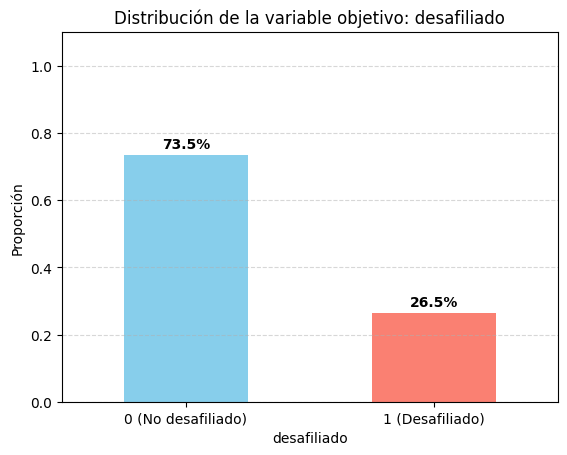

In [ ]:
# Visualizaci√≥n del balance de la variable objetivo
# Calcular proporciones
proporciones = df["desafiliado"].value_counts(normalize=True)

# Crear gr√°fico
ax = proporciones.plot(kind="bar", color=["skyblue", "salmon"])

# T√≠tulo y etiquetas
plt.title("Distribuci√≥n de la variable objetivo: desafiliado")
plt.xticks(ticks=[0, 1], labels=["0 (No desafiliado)", "1 (Desafiliado)"], rotation=0)
plt.ylabel("Proporci√≥n")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# A√±adir porcentajes sobre las barras
for i, valor in enumerate(proporciones):
    plt.text(i, valor + 0.02, f"{valor*100:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()

Una distribuci√≥n ideal ser√≠a m√°s cercana al 50/50, y a partir de un desequilibrio mayor al 70/30, ya se habla de desequilibrio significativo, sobre todo si el modelo puede verse afectado al aprender a predecir solo la clase mayoritaria (por ejemplo, predecir siempre "no" y tener a√∫n as√≠ 73% de exactitud).

In [ ]:
#Mostrar valores √∫nicos por cada columna
for col in df.columns:
    print(f"\nColumna: '{col}'")
    print(df[col].unique())


Columna: 'desafiliado'
[0 1]

Columna: 'genero'
['femenino' 'masculino']

Columna: 'persona_mayor'
[0 1]

Columna: 'pareja'
['si' 'no']

Columna: 'dependientes'
['si' 'no']

Columna: 'antiguedad'
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Columna: 'cliente_nuevo'
[0 1]

Columna: 'cliente_leal'
[0 1]

Columna: 'servicio_telefonico'
['si' 'no']

Columna: 'multiples_lineas'
['no' 'si' 'sin_servicio_telefonico']

Columna: 'servicio_de_internet'
['dsl' 'fibra_optica' 'no']

Columna: 'seguridad_en_linea'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'copia_de_seguridad_en_linea'
['si' 'no' 'sin_servicio_de_internet']

Columna: 'proteccion_de_dispositivos'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'soporte_tecnico'
['si' 'no' 'sin_servicio_de_internet']

Columna: 'television_en_streaming'
['si' 'no' 'si

In [ ]:
# Revisar duplicados antes del split
duplicados_original = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas en df antes del split: {duplicados_original}")


N√∫mero de filas duplicadas en df antes del split: 45


## üü¶ FASE B: Ingenier√≠a y preparaci√≥n de datos

FASE B (Pasos 9‚Äì15: Ingenier√≠a y preparaci√≥n de datos)
Objetivo: Dejar un dataset optimizado (limpio, balanceado, sin columnas irrelevantes, sin skew excesivo) para entrenar modelos.

Se ejecuta:

Una sola vez por dataset nuevo o cuando cambian mucho las variables.

Es como preparar la ‚Äúversi√≥n maestra‚Äù del dataset con el que vas a trabajar en producci√≥n.

ColumnTransformer aqu√≠ (opcional):

Puede usarse, pero no queda embebido en el pipeline final.

No se vuelve a ejecutar en cada predicci√≥n.

Resumen
Paso 19 ColumnTransformer: Se encarga de imputaci√≥n, codificaci√≥n, escalado y transformaciones repetibles que siempre deben aplicarse en entrenamiento y predicci√≥n.

Pasos 11‚Äì15: Son decisiones √∫nicas basadas en an√°lisis, que modifican la lista de columnas antes de llegar al ColumnTransformer.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   desafiliado                  7043 non-null   int64  
 1   genero                       7043 non-null   object 
 2   persona_mayor                7043 non-null   int64  
 3   pareja                       7043 non-null   object 
 4   dependientes                 7043 non-null   object 
 5   antiguedad                   7043 non-null   int64  
 6   cliente_nuevo                7043 non-null   int64  
 7   cliente_leal                 7043 non-null   int64  
 8   servicio_telefonico          7043 non-null   object 
 9   multiples_lineas             7043 non-null   object 
 10  servicio_de_internet         7043 non-null   object 
 11  seguridad_en_linea           7043 non-null   object 
 12  copia_de_seguridad_en_linea  7043 non-null   object 
 13  proteccion_de_disp

###***9. Codificaci√≥n de variables categ√≥ricas***

In [ ]:
# Paso 9: Codificaci√≥n de variables categ√≥ricas
def codificacion_categoricas(df):
    """
    Codifica variables categ√≥ricas binarias y multiclase.
    - Binarias: reemplaza 'no'/'si' y 'femenino'/'masculino' por 0/1
    - Multiclase: usa OneHotEncoding v√≠a pd.get_dummies(drop_first=True)

    Par√°metros:
        df (pd.DataFrame): DataFrame original.

    Retorna:
        pd.DataFrame: DataFrame con variables categ√≥ricas codificadas.
    """
    df = df.copy()

    # Detectar columnas categ√≥ricas
    columnas_categoricas = df.select_dtypes(include='object').columns

    # Normalizar strings para evitar errores en replace
    for col in columnas_categoricas:
        df[col] = df[col].astype(str).str.strip().str.lower()

    # Separar en binarias y multiclase
    binarias = [col for col in columnas_categoricas if df[col].nunique() == 2]
    multiclase = [col for col in columnas_categoricas if df[col].nunique() > 2]

    # Codificar binarias con replace
    if binarias:
        df[binarias] = df[binarias].replace({
            'no': 0, 'si': 1,
            'femenino': 0, 'masculino': 1
        })

    # Codificar multiclase con get_dummies
    if multiclase:
        df = pd.get_dummies(df, columns=multiclase, drop_first=True)

    return df


In [ ]:
df = codificacion_categoricas(df)


/tmp/ipython-input-3421924267.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binarias] = df[binarias].replace({


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   desafiliado                                           7043 non-null   int64  
 1   genero                                                7043 non-null   int64  
 2   persona_mayor                                         7043 non-null   int64  
 3   pareja                                                7043 non-null   int64  
 4   dependientes                                          7043 non-null   int64  
 5   antiguedad                                            7043 non-null   int64  
 6   cliente_nuevo                                         7043 non-null   int64  
 7   cliente_leal                                          7043 non-null   int64  
 8   servicio_telefonico                                   7043

En Python y en pandas, los tipos booleanos (bool) son equivalentes a 0 y 1 al momento de entrenar modelos o realizar operaciones num√©ricas.
Lo que significa False y True en modelos:
False se interpreta como 0
True se interpreta como 1

In [ ]:
diccionario = df.sample(15).to_dict(orient='list')

print(diccionario)

{'desafiliado': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'genero': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], 'persona_mayor': [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'pareja': [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], 'dependientes': [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], 'antiguedad': [21, 2, 13, 71, 26, 2, 24, 39, 4, 65, 72, 45, 65, 7, 27], 'cliente_nuevo': [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'cliente_leal': [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], 'servicio_telefonico': [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'facturacion_electronica': [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], 'cargo_diario': [3.5, 2.8, 1.4, 3.5, 2.9, 0.6, 1.8, 3.4, 1.7, 3.5, 2.2, 3.9, 2.5, 3.1, 1.9], 'cargo_mensual': [103.8, 84.0, 40.6, 104.1, 85.9, 19.3, 53.6, 101.2, 51.0, 104.3, 66.8, 115.6, 76.2, 94.1, 56.2], 'cargo_total': [2215.0, 134.0, 590.4, 7412.2, 2196.4, 28.3, 1315.4, 3949.2, 207.4, 6725.3, 4758.8, 5125.5, 4929.6, 701.3, 1439.4], 'multiples_line

###***10.	Feature engineering***

Debido a que en el Feture Engineering se van a generar variables irrelevantes que van a generar ruido al modelo, los pasos del 11 al 15 seran usados para filtrar esas variables y optimizar el database

In [ ]:
# Paso 10: Feature engineering (corregido)
def feature_engineering_basico(df):
    df = df.copy()

    # 1. Agrupaci√≥n de antig√ºedad (evitar bordes duplicados)
    antiguedad_max = df["antiguedad"].max()
    bins = [0, 12, 36, 72, antiguedad_max + 0.1]  # +0.1 evita duplicado si max=72
    labels = ["Nuevo", "Medio", "Antiguo", "Muy Antiguo"]

    df["antiguedad_grupo"] = pd.cut(
        df["antiguedad"],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

    # 2. Total de servicios contratados (insensible a may√∫sculas)
    servicios_cols = [col for col in df.columns if any(x in col.lower() for x in ["servicio", "streaming", "lineas"])]
    if servicios_cols:
        df["total_servicios"] = df[servicios_cols].sum(axis=1).astype(int)

    # 3. Indicador de alto gasto mensual
    df["gasto_alto"] = (df["cargo_mensual"] > df["cargo_mensual"].median()).astype(int)

    # 4. Gasto promedio por mes de antig√ºedad
    df["gasto_promedio_mes"] = (df["cargo_total"] / df["antiguedad"].replace(0, 1)).astype(float)

    # 5. Cliente premium
    df["cliente_premium"] = ((df["total_servicios"] > df["total_servicios"].median()) &
                             (df["gasto_alto"] == 1)).astype(int)

    # 6. Codificar nuevas categ√≥ricas y convertir bool ‚Üí int
    df = pd.get_dummies(df, columns=["antiguedad_grupo"], drop_first=True)
    bool_cols = df.select_dtypes(include="bool").columns
    df[bool_cols] = df[bool_cols].astype(int)

    return df


In [ ]:
df = feature_engineering_basico(df)
df.head()

desafiliado  genero  persona_mayor  pareja  dependientes  antiguedad  \
0            0       0              0       1             1           9   
1            0       1              0       0             0           9   
2            1       1              0       0             0           4   
3            1       1              1       1             0          13   
4            1       0              1       1             0           3   

   cliente_nuevo  cliente_leal  servicio_telefonico  facturacion_electronica  \
0              0             0                    1                        1   
1              0             0                    1                        0   
2              1             0                    1                        1   
3              0             0                    1                        1   
4              1             0                    1                        1   

   ...  metodo_de_pago_cheque_por_correo  \
0  ...                                 1   
1  ...                                 1   
2  ...                                 0   
3  ...                                 0   
4  ...                                 1   

   metodo_de_pago_tarjeta_de_credito_(automatico)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   metodo_de_pago_transferencia_bancaria_(automatico)  total_servicios  \
0                                                  0                 2   
1                                                  0                 3   
2                                                  0                 2   
3                                                  0                 4   
4                                                  0                 3   

   gasto_alto  gasto_promedio_mes  cliente_premium  antiguedad_grupo_Medio  \
0           0           65.922222                0                       0   
1           0           60.266667                0                       0   
2           1           70.200000                0                       0   
3           1           95.215385                0                       1   
4           1           89.133333                0                       0   

   antiguedad_grupo_Antiguo  antiguedad_grupo_Muy Antiguo  
0                         0                             0  
1                         0                             0  
2                         0                             0  
3                         0                             0  
4                         0                             0  

[5 rows x 41 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   desafiliado                                           7043 non-null   int64  
 1   genero                                                7043 non-null   int64  
 2   persona_mayor                                         7043 non-null   int64  
 3   pareja                                                7043 non-null   int64  
 4   dependientes                                          7043 non-null   int64  
 5   antiguedad                                            7043 non-null   int64  
 6   cliente_nuevo                                         7043 non-null   int64  
 7   cliente_leal                                          7043 non-null   int64  
 8   servicio_telefonico                                   7043

In [ ]:
diccionario = df.sample(15).to_dict(orient='list')

print(diccionario)

{'desafiliado': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'genero': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 'persona_mayor': [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 'pareja': [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'dependientes': [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 'antiguedad': [21, 2, 69, 17, 61, 56, 22, 13, 1, 35, 2, 61, 16, 72, 69], 'cliente_nuevo': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'cliente_leal': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], 'servicio_telefonico': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'facturacion_electronica': [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], 'cargo_diario': [0.7, 1.5, 2.6, 1.9, 2.3, 3.0, 1.3, 1.4, 0.7, 2.4, 2.6, 3.5, 3.4, 3.7, 3.5], 'cargo_mensual': [20.0, 44.4, 79.2, 56.1, 68.0, 89.7, 40.0, 40.6, 20.0, 73.0, 79.2, 104.0, 100.7, 111.6, 104.0], 'cargo_total': [417.7, 82.7, 5420.6, 947.0, 4158.2, 4953.0, 880.2, 590.4, 20.0, 2471.2, 172.8, 6423.0, 1522.7, 8022.8, 7262.0], 'multiples_lineas_

###***10B: An√°lisis de correlaci√≥n y depuraci√≥n de variables***

***Objetivo***


1. Identificar relaciones fuertes entre variables num√©ricas (coeficiente > 0.8 o < -0.8), para proporcionar insumos para Paso 15 (Eliminaci√≥n de variables irrelevantes), evitando duplicidad de informaci√≥n y multicolinealidad que afecte el modelo.

2. Eliminar variables redundantes y variables sin relaci√≥n significativa con el target para reducir complejidad y evitar ruido antes de entrar a pasos m√°s avanzados (frecuencia, varianza, importancia).

Medir relaci√≥n con el target ‚Üí ordenar features seg√∫n fuerza de correlaci√≥n con desafiliado para dar contexto en Pasos 11‚Äì14.

***üì§ Entrada:***

1. df resultante del Paso 10 (Feature Engineering).

***üì• Salida:***

2. Heatmap de correlaci√≥n global.

3. Lista de pares de variables redundantes (>0.8) para Paso 15.

4. Tabla ordenada de correlaci√≥n con target desafiliado.

5. Gr√°fico de barras con Top 15 variables m√°s correlacionadas con el target.

6. df limpio:

  6.1 Sin variables duplicadas o altamente correlacionadas entre s√≠.

  6.2 Sin variables con correlaci√≥n irrelevante con el target (desafiliado).

  6.3 Lista de variables eliminadas (impresa en consola).

***La Matriz de correlaci√≥n post-Feature Engineering*** no solo es √∫til para Paso 15 (Eliminaci√≥n de variables redundantes), sino que tambi√©n te da una ventaja estrat√©gica para analizar Pasos 11‚Äì14 porque:

***C√≥mo aporta a cada paso:***

‚û° Paso 11 (Frecuencia dominante)
La matriz te da pistas sobre qu√© variables pueden estar aportando poco valor porque est√°n muy correlacionadas con otras.

Ejemplo: Si metodo_de_pago_tarjeta_de_credito_(automatico) y metodo_de_pago_transferencia_bancaria_(automatico) tienen correlaci√≥n alta con la clase (target) y entre s√≠, en Paso 11 puedes priorizar la que tenga m√°s fuerza explicativa.

‚û° Paso 12 (Baja varianza)
Aunque la baja varianza se mide dentro de la propia variable, la correlaci√≥n con target puede mostrar si, aunque haya baja variabilidad, esa variabilidad m√≠nima est√° asociada al objetivo (y tal vez convenga conservarla).

‚û° Paso 13 (Skewness)
Si una variable con skewness alto est√° tambi√©n fuertemente correlacionada con target, puede justificar aplicar transformaciones en lugar de eliminarla, porque aporta informaci√≥n clave al modelo.

‚û° Paso 14 (Importancia de variables)
Conocer la correlaci√≥n con target te da un mapa preliminar de importancia.

Si en Paso 14 una variable sale con baja importancia pero alta correlaci√≥n con target, hay que investigar si hay multicolinealidad que diluye su importancia en Random Forest.

üí° En pocas palabras:
El Paso 10B te da un mapa general de c√≥mo se comportan las features entre s√≠ y frente al target, lo cual te da mejor criterio para justificar decisiones de retenci√≥n, transformaci√≥n o eliminaci√≥n en Pasos 11‚Äì14.

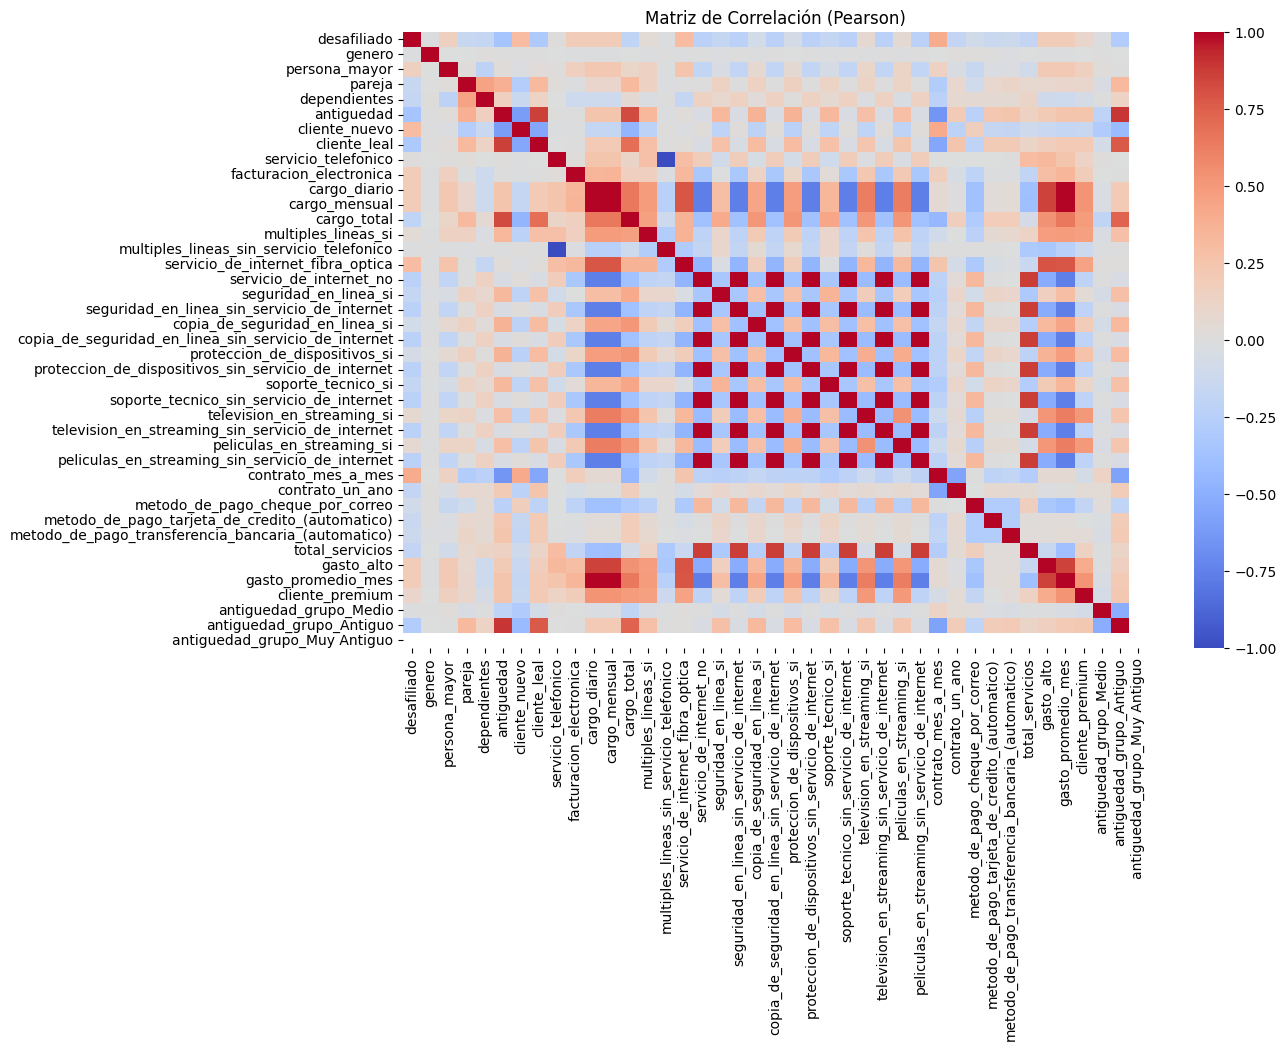

üìâ Variables eliminadas por correlaci√≥n > 0.8: ['cliente_leal', 'cargo_mensual', 'cargo_total', 'multiples_lineas_sin_servicio_telefonico', 'seguridad_en_linea_sin_servicio_de_internet', 'copia_de_seguridad_en_linea_sin_servicio_de_internet', 'proteccion_de_dispositivos_sin_servicio_de_internet', 'soporte_tecnico_sin_servicio_de_internet', 'television_en_streaming_sin_servicio_de_internet', 'peliculas_en_streaming_sin_servicio_de_internet', 'total_servicios', 'gasto_alto', 'gasto_promedio_mes', 'antiguedad_grupo_Antiguo']

‚úÖ Correlaci√≥n de cada variable con 'desafiliado':
                                             Variable  Correlaci√≥n_con_Target
0                                  contrato_mes_a_mes                0.405103
1                                          antiguedad               -0.352229
2                                       cliente_nuevo                0.308773
3                   servicio_de_internet_fibra_optica                0.308020
4                       

/tmp/ipython-input-418282731.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


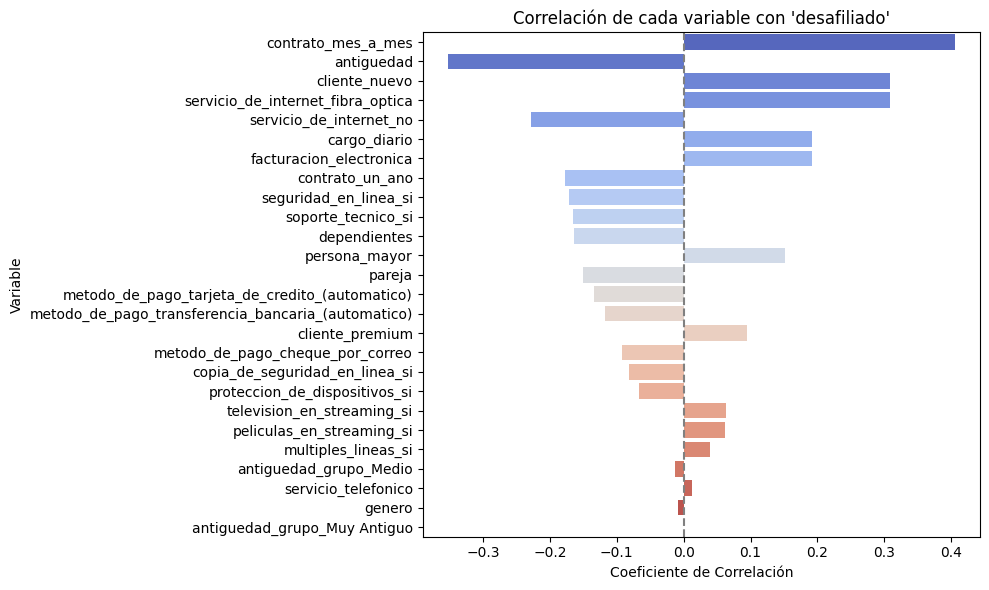

In [ ]:
# üìå Paso 10B: Matriz de correlaci√≥n y depuraci√≥n inicial de variables

# Importamos librer√≠as necesarias
import pandas as pd      # Manejo de dataframes y series
import numpy as np       # Operaciones num√©ricas y matrices
import matplotlib.pyplot as plt  # Visualizaci√≥n b√°sica
import seaborn as sns    # Visualizaci√≥n avanzada (heatmap, barplot)

# ===================== 1Ô∏è‚É£ Matriz de correlaci√≥n general =====================

# Calcula la matriz de correlaci√≥n entre todas las columnas num√©ricas del DataFrame df
# M√©todo usado: df.corr() ‚Üí calcula correlaci√≥n de Pearson por defecto (se puede cambiar con method=)
corr_matrix = df.corr(method='pearson')

# Crea una figura de tama√±o 12x8 pulgadas para el gr√°fico
# M√©todo usado: plt.figure(figsize=(ancho, alto))
plt.figure(figsize=(12, 8))

# Genera un mapa de calor (heatmap) de la matriz de correlaci√≥n
# Funci√≥n: sns.heatmap(data, cmap, center) ‚Üí cmap define la paleta de colores, center=0 centra el color en 0
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)

# T√≠tulo del gr√°fico
plt.title("Matriz de Correlaci√≥n (Pearson)")

# Muestra el gr√°fico en pantalla
plt.show()

# ===================== 2Ô∏è‚É£ Detecci√≥n y eliminaci√≥n de redundantes (>0.8) =====================

# Define el umbral de correlaci√≥n m√°xima permitida entre dos variables
umbral_corr = 0.8

# Crea una matriz triangular superior (parte superior de la matriz de correlaci√≥n) para evitar duplicados
# np.triu crea una matriz triangular superior con 1s, astype(bool) convierte a booleanos
# .where mantiene solo la parte superior de la matriz, el resto se pone como NaN
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Genera una lista de columnas que tienen correlaci√≥n alta con alguna otra (> umbral_corr)
# any() verifica si existe alguna correlaci√≥n en esa columna que supere el umbral
to_drop_corr = [column for column in corr_matrix_upper.columns if any(corr_matrix_upper[column].abs() > umbral_corr)]

# Imprime las variables que se eliminar√°n por alta correlaci√≥n
print(f"üìâ Variables eliminadas por correlaci√≥n > {umbral_corr}: {to_drop_corr}")

# Elimina del DataFrame las columnas redundantes
# M√©todo usado: df.drop(columns=lista, inplace=True)
df.drop(columns=to_drop_corr, inplace=True)

# ===================== 3Ô∏è‚É£ Correlaci√≥n con variable objetivo =====================

# Nombre de la variable objetivo
target = "desafiliado"

# Calcula la correlaci√≥n de cada variable con el target y elimina el propio target
# df.corr()[target] ‚Üí devuelve la correlaci√≥n de todas las columnas con la columna 'target'
# .drop(target) ‚Üí elimina la fila correspondiente al target
# .sort_values(key=abs, ascending=False) ‚Üí ordena por valor absoluto de la correlaci√≥n
correlaciones_target = df.corr()[target].drop(target).sort_values(key=abs, ascending=False)

# Crea un DataFrame con dos columnas: nombre de la variable y su correlaci√≥n con el target
df_corr_target = pd.DataFrame({
    "Variable": correlaciones_target.index,
    "Correlaci√≥n_con_Target": correlaciones_target.values
})

# Imprime tabla de correlaciones con el target
print("\n‚úÖ Correlaci√≥n de cada variable con 'desafiliado':")
print(df_corr_target)

# ===================== 4Ô∏è‚É£ Eliminaci√≥n de variables con baja correlaci√≥n con target (<0.1) =====================

# Umbral m√≠nimo de correlaci√≥n absoluta para mantener la variable
umbral_target = 0.1

# Genera lista de variables con correlaci√≥n absoluta menor al umbral
# .loc[] ‚Üí filtra filas que cumplan condici√≥n
# .tolist() ‚Üí convierte la Serie en lista
to_drop_target = df_corr_target.loc[df_corr_target["Correlaci√≥n_con_Target"].abs() < umbral_target, "Variable"].tolist()

# Imprime las variables eliminadas por baja correlaci√≥n con target
print(f"\nüìâ Variables eliminadas por baja correlaci√≥n con target (|r| < {umbral_target}): {to_drop_target}")

# Elimina las variables de baja correlaci√≥n
df.drop(columns=to_drop_target, inplace=True)

# Imprime la forma final (n_filas, n_columnas) del DataFrame despu√©s del filtrado
print(f"\n‚úÖ Shape final de df despu√©s de Paso 10B: {df.shape}")

# ===================== 5Ô∏è‚É£ Visualizaci√≥n de correlaci√≥n con target =====================

# Crea una figura de 10x6 pulgadas
plt.figure(figsize=(10, 6))

# Grafica un barplot con seaborn donde:
# x ‚Üí correlaci√≥n con el target
# y ‚Üí nombre de la variable
# data ‚Üí df ordenado por valor absoluto de correlaci√≥n
# palette ‚Üí define colores seg√∫n la correlaci√≥n
sns.barplot(
    x="Correlaci√≥n_con_Target",
    y="Variable",
    data=df_corr_target.sort_values("Correlaci√≥n_con_Target", key=abs, ascending=False),
    palette="coolwarm"
)

# L√≠nea vertical en x=0 para separar correlaciones positivas y negativas
plt.axvline(x=0, color='gray', linestyle='--')

# T√≠tulo y etiquetas de ejes
plt.title("Correlaci√≥n de cada variable con 'desafiliado'")
plt.xlabel("Coeficiente de Correlaci√≥n")
plt.ylabel("Variable")

# Ajusta autom√°ticamente los elementos del gr√°fico para que no se solapen
plt.tight_layout()

# Muestra el gr√°fico final
plt.show()


***An√°lisis de resultados***

1Ô∏è‚É£ Variables eliminadas por alta correlaci√≥n (>0.8)
Se eliminaron 14 variables que eran redundantes porque ten√≠an correlaci√≥n casi perfecta con otras (ej. cargo_mensual vs cargo_total, gasto_promedio_mes, etc.).

Esto es positivo porque:

Evita multicolinealidad que puede distorsionar la importancia de variables en modelos como Random Forest y afectar la estabilidad.

Reduce dimensionalidad ‚Üí menos variables, menor riesgo de sobreajuste, procesamiento m√°s r√°pido.

Ejemplos clave:

cliente_leal estaba fuertemente correlacionada con antiguedad y contrato_mes_a_mes.

Variables de servicios ‚Äúsin internet‚Äù (seguridad_en_linea_sin_servicio_de_internet, etc.) ten√≠an correlaci√≥n 1.0 entre s√≠ ‚Üí mantener una sola representa la informaci√≥n completa.

2Ô∏è‚É£ Correlaci√≥n con la variable objetivo (desafiliado)
Variables m√°s correlacionadas positivamente (mayor probabilidad de desafiliaci√≥n):

contrato_mes_a_mes (r = 0.405) ‚Üí fuerte indicador de riesgo.

cliente_nuevo (r = 0.308) ‚Üí clientes nuevos m√°s propensos a desafiliarse.

servicio_de_internet_fibra_optica (r = 0.308) ‚Üí posible efecto de problemas t√©cnicos o tarifas.

Variables m√°s correlacionadas negativamente (menor probabilidad de desafiliaci√≥n):

antiguedad (r = -0.352) ‚Üí clientes antiguos tienden a permanecer.

contrato_un_ano (r = -0.178) y soporte_tecnico_si (r = -0.165) ‚Üí contratos m√°s largos y soporte disminuyen el riesgo.

3Ô∏è‚É£ Variables eliminadas por baja correlaci√≥n con target (|r| < 0.1)
Se eliminaron 10 variables por no mostrar relaci√≥n significativa con desafiliado.

Ejemplos:

genero, servicio_telefonico, multiples_lineas_si ‚Üí no aportan informaci√≥n √∫til para predecir la desafiliaci√≥n.

Variables como cliente_premium y metodo_de_pago_cheque_por_correo tienen correlaci√≥n muy baja ‚Üí bajo poder predictivo.

Esto mejora la simplicidad y generalizaci√≥n del modelo, manteniendo solo variables con relevancia real.

4Ô∏è‚É£ Shape final
***De 41 variables iniciales ‚Üí 17 variables finales despu√©s de Paso 10B.***

***Esto implica que ~58% de las variables fueron descartadas por redundancia o baja relaci√≥n con el target.***

***Menor complejidad ‚Üí m√°s interpretabilidad, menor riesgo de sobreajuste, mejor velocidad de entrenamiento.***

***Conclusi√≥n***

1. Se logr√≥ una depuraci√≥n fuerte y efectiva:

2. Eliminaci√≥n de variables redundantes ‚Üí reduce multicolinealidad.

3. Eliminaci√≥n de variables con baja correlaci√≥n con target ‚Üí mayor enfoque en se√±ales √∫tiles.

***Impacto en negocio:***

1. Las variables con mayor correlaci√≥n positiva (contrato_mes_a_mes, cliente_nuevo, fibra √≥ptica) son focos claros para estrategias de retenci√≥n.

2. Las variables con correlaci√≥n negativa (antiguedad, contrato_un_ano) pueden ser palancas para dise√±ar planes de fidelizaci√≥n.

3. El dataset ahora est√° optimizado para eficiencia y precisi√≥n en pasos posteriores (Paso 11, 12, 13, etc.).

###***11. An√°lisis de frecuencia dominante***

***1. Objetivo del c√≥digo:***

Este paso busca identificar y eliminar variables poco informativas porque est√°n dominadas por un solo valor en la mayor√≠a de sus registros (frecuencia dominante).

Adem√°s, si son num√©ricas, se eval√∫a si su correlaci√≥n con la variable objetivo (desafiliado) es muy baja; en ese caso, tambi√©n se eliminan.
As√≠, se evita que variables con escasa variabilidad o poca relaci√≥n con el target contaminen el modelo.

***2. Entradas para la construcci√≥n del c√≥digo:***

df ‚Üí DataFrame de trabajo despu√©s del Paso 10B (sin variables redundantes ni de baja correlaci√≥n).

umbral_frecuencia ‚Üí valor l√≠mite para considerar que una categor√≠a o valor es dominante (en este caso 0.95 = 95% de las observaciones tienen el mismo valor).

umbral_correlacion ‚Üí valor m√≠nimo de correlaci√≥n absoluta que debe tener una variable num√©rica dominante para mantenerse.

Variable objetivo ‚Üí 'desafiliado', usada para calcular la correlaci√≥n.

***3. Salidas que da el c√≥digo:***

Lista columnas_dominantes ‚Üí columnas que cumplen el criterio de frecuencia dominante.

Lista columnas_a_eliminar ‚Üí columnas que adem√°s ser√°n eliminadas por baja correlaci√≥n o por ser categ√≥ricas dominantes.

***Mensajes en consola con:***

Variables dominantes y su frecuencia.

Correlaci√≥n (si es num√©rica).

Decisi√≥n de eliminar o no.

DataFrame df actualizado sin las columnas marcadas para eliminar.

In [ ]:
# Paso 11: An√°lisis de frecuencia dominante

umbral_frecuencia = 0.95   # Valor l√≠mite (95%) para considerar un valor como dominante en una columna
umbral_correlacion = 0.05  # M√≠nima correlaci√≥n absoluta para conservar una variable num√©rica dominante

df_temp = df.copy()  # Crea una copia del DataFrame principal para no modificarlo durante el an√°lisis
columnas_dominantes = []  # Lista para almacenar las columnas que son dominadas por un valor
columnas_a_eliminar = []  # Lista para almacenar las columnas que ser√°n eliminadas

for col in df_temp.columns:  # Itera sobre todas las columnas del DataFrame
    if col == 'desafiliado':  # Si la columna es la variable objetivo...
        continue  # ...se salta porque no se analiza

    # Calcula la frecuencia relativa del valor m√°s com√∫n en la columna
    # .value_counts(normalize=True) ‚Üí cuenta y divide por total
    # .max() ‚Üí obtiene la frecuencia m√°xima
    valor_max = df_temp[col].value_counts(normalize=True).max()

    if valor_max > umbral_frecuencia:  # Si supera el 95% (dominante)
        columnas_dominantes.append(col)  # Guarda la columna en lista de dominantes

        # Verifica si el tipo de dato es num√©rico usando pd.api.types.is_numeric_dtype()
        if pd.api.types.is_numeric_dtype(df_temp[col]):
            # Calcula correlaci√≥n absoluta con el target usando Series.corr()
            correlacion = abs(df_temp[col].corr(df_temp['desafiliado']))

            # Imprime columna, frecuencia dominante y correlaci√≥n
            print(f"{col}: {valor_max:.2%} dominante, correlaci√≥n = {correlacion:.4f}")

            # Si la correlaci√≥n es menor al umbral, se marca para eliminar
            if correlacion < umbral_correlacion:
                columnas_a_eliminar.append(col)
        else:
            # Si no es num√©rica, se marca para eliminar directamente
            print(f"{col}: {valor_max:.2%} dominante, tipo no num√©rico, marcada para eliminar")
            columnas_a_eliminar.append(col)

# Imprime lista de columnas dominantes detectadas
print("\nColumnas con frecuencia dominante :", columnas_dominantes)

# Imprime lista de columnas que ser√°n eliminadas
print("\nColumnas a eliminar:", columnas_a_eliminar)

# Elimina del DataFrame original las columnas marcadas
# df.drop(columns=lista, inplace=True) ‚Üí elimina columnas en el mismo DataFrame
df.drop(columns=columnas_a_eliminar, inplace=True)


antiguedad_grupo_Muy Antiguo: 100.00% dominante, correlaci√≥n = nan

Columnas con frecuencia dominante : ['antiguedad_grupo_Muy Antiguo']

Columnas a eliminar: []


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


***1. An√°lisis de resultados:***

Se detect√≥ solo una variable dominante: antiguedad_grupo_Muy Antiguo, con el 100% de los registros en un √∫nico valor.

La correlaci√≥n result√≥ en NaN porque no existe variabilidad en la columna (al ser todos los valores iguales, la desviaci√≥n est√°ndar es cero, y la f√≥rmula de correlaci√≥n no puede calcularse).

A pesar de ser dominante, no se elimin√≥ porque el c√≥digo actual √∫nicamente elimina variables dominantes num√©ricas con baja correlaci√≥n o categ√≥ricas dominantes, y en este caso parece que la l√≥gica no cubri√≥ el caso NaN.

***2. Conclusi√≥n:***

antiguedad_grupo_Muy Antiguo no aporta informaci√≥n √∫til para el modelo, ya que es constante en toda la muestra.

Aunque el c√≥digo no la elimin√≥, desde un punto de vista de limpieza de datos deber√≠a ser eliminada manualmente, porque no contribuir√° a la predicci√≥n y solo agregar√° ruido y dimensionalidad innecesaria.

El resultado confirma que en este dataset no hay un problema masivo de variables dominantes, solo un caso puntual.



###***12	An√°lisis de baja varianza***


***1. Objetivo del c√≥digo:***

Este paso busca identificar y eliminar variables con muy poca variabilidad (baja varianza), ya que aportan poca o ninguna informaci√≥n al modelo.

Adem√°s, antes de eliminarlas, se revisa si tienen alguna correlaci√≥n significativa con la variable objetivo para evitar descartar variables que, aunque con poca variaci√≥n, s√≠ sean predictivas.

***2. Entradas para la construcci√≥n del c√≥digo:***

df ‚Üí DataFrame con las variables independientes y la variable objetivo "desafiliado".

Umbral de varianza (threshold=0.01) ‚Üí Define qu√© tan baja debe ser la varianza para marcar una variable como candidata a eliminar.

Umbral de correlaci√≥n (umbral_correlacion=0.05) ‚Üí Define el m√≠nimo valor de correlaci√≥n con el objetivo para conservar la variable.

***3. Salidas que da el c√≥digo para los pr√≥ximos pasos:***

Lista columnas_baja_varianza ‚Üí Variables detectadas con poca variabilidad.

Lista columnas_a_eliminar ‚Üí Variables efectivamente eliminadas por tener baja varianza y baja correlaci√≥n con el objetivo.

DataFrame df actualizado ‚Üí Sin las variables eliminadas, preparado para los siguientes pasos de preprocesamiento o modelado.



In [ ]:
# Paso 12: An√°lisis de baja varianza
from sklearn.feature_selection import VarianceThreshold  # üì¶ Importa el selector de caracter√≠sticas por varianza de scikit-learn

X = df.drop(columns=["desafiliado"])  # üìÑ Crea un DataFrame solo con variables predictoras eliminando la variable objetivo
y = df["desafiliado"]  # üìÑ Extrae la variable objetivo como Serie para an√°lisis posterior

selector = VarianceThreshold(threshold=0.01)  # ‚öôÔ∏è Inicializa el selector para marcar variables con varianza menor al 1%
selector.fit(X)  # ‚ñ∂Ô∏è Aplica el c√°lculo de varianza a las columnas de X

columnas_baja_varianza = X.columns[~selector.get_support()]  # üîç Obtiene los nombres de columnas que NO pasan el umbral de varianza
print("Columnas detectadas con baja varianza:", list(columnas_baja_varianza))  # üñ®Ô∏è Muestra las variables candidatas a eliminar

umbral_correlacion = 0.05  # üìè Define el m√≠nimo valor absoluto de correlaci√≥n con el objetivo para conservar una variable
columnas_a_eliminar = []  # üóëÔ∏è Inicializa la lista que almacenar√° las variables que se eliminar√°n finalmente

for col in columnas_baja_varianza:  # üîÑ Itera sobre cada variable con baja varianza detectada
    if pd.api.types.is_numeric_dtype(df[col]):  # ‚úÖ Verifica si la variable es num√©rica (para poder calcular correlaci√≥n)
        corr = abs(df[col].corr(y))  # üìä Calcula la correlaci√≥n absoluta entre la variable y la variable objetivo
        print(f"{col}: correlaci√≥n con objetivo = {corr:.3f}")  # üñ®Ô∏è Muestra la correlaci√≥n encontrada
        if corr < umbral_correlacion:  # üìè Si la correlaci√≥n es menor al umbral definido...
            columnas_a_eliminar.append(col)  # üóëÔ∏è ...la a√±ade a la lista de eliminaci√≥n

print("\nColumnas a eliminar:", columnas_a_eliminar)  # üñ®Ô∏è Muestra las variables que efectivamente se eliminar√°n

df.drop(columns=columnas_a_eliminar, inplace=True)  # ‚úÇÔ∏è Elimina las variables seleccionadas del DataFrame principal


Columnas detectadas con baja varianza: ['antiguedad_grupo_Muy Antiguo']
antiguedad_grupo_Muy Antiguo: correlaci√≥n con objetivo = nan

Columnas a eliminar: []


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


***1. An√°lisis de resultados obtenidos:***

Se detect√≥ solo una variable con baja varianza: antiguedad_grupo_Muy Antiguo.

La correlaci√≥n calculada con el objetivo fue NaN, lo que sucede cuando la variable es constante (varianza = 0).

No se elimin√≥ porque el c√≥digo actual exige que la correlaci√≥n sea menor al umbral, pero en este caso NaN no cumple esa condici√≥n de forma expl√≠cita.

Esto deja en el DataFrame una variable que es totalmente constante y que no aporta valor predictivo.

***2. Conclusi√≥n:***

antiguedad_grupo_Muy Antiguo es redundante y deber√≠a ser eliminada, ya que no aporta informaci√≥n al modelo y podr√≠a incluso causar problemas en algunas m√©tricas o algoritmos.

El c√≥digo podr√≠a mejorarse para que tambi√©n elimine variables con correlaci√≥n NaN autom√°ticamente, trat√°ndolas como no predictivas.

###***13	An√°lisis de skewness***

***1. Obejtivo:***

El an√°lisis de skewness sirve para detectar asimetr√≠a alta en variables num√©ricas, el skew alto indica concentraci√≥n de valores a un lado de la media, esto ayuda a reducir el impacto de valores extremos, para mejorar la estabilidad general del modelo RandomForest, por lo que se debera aplicar transformaciones (log1p, sqrt, Box-Cox, etc.) para que la distribuci√≥n sea m√°s sim√©trica. Aunque RandomForest puede trabajar con datos sin transformar, aplicar tratamiento de skewness mejora la calidad de los splits, ya que los los outliers extremos pueden distorsionar splits porlo que se reduce la sensibilidad a valores extremos y puede estabilizar resultados. Adicionalmente, se mejora la uniformidad en escalas, ayudando a que variables importantes no queden ‚Äúopacadas‚Äù por valores at√≠picos. Y finalmente, se facilita la interpretabilidad y el an√°lisis de importancia de variables.

Variables a las que no es necesario realizar un analisis skewness:

1. Variables binarias (0 y 1):

Ejemplo: cliente_nuevo, cliente_leal, servicio_telefonico, persona_mayor, cliente_premium, etc.
Estas generan skewness alto porque la distribuci√≥n es muy asim√©trica (la mayor√≠a son 0 o 1).
üëâ No necesitan transformaci√≥n, porque log1p(0) y log1p(1) producen valores que no cambian la forma de la variable (solo la escalan sin sentido).

2. Variables booleanas (True/False):

Ejemplo: multiples_lineas_si, contrato_mes_a_mes, metodo_de_pago_cheque_por_correo‚Ä¶
Estas son esencialmente binarias codificadas como booleanos. Tampoco se transforman.

Variables a las que si es necesario realizar un analisis skewness:

1. Variables continuas reales:

Ejemplo: cargo_diario, cargo_mensual, cargo_total, gasto_promedio_mes, antiguedad, estas variables s√≠ pueden tener valores extremos y por eso es donde analizamos el skewness y aplicamos transformaciones (log1p, sqrt) si es necesario.

***2. Entradas para la construcci√≥n del c√≥digo:***

df: DataFrame con las variables de entrada y la variable objetivo.

Columnas continuas de inter√©s: "cargo_diario", "cargo_mensual", "cargo_total", "gasto_promedio_mes", "antiguedad" (solo si existen en el DataFrame).

umbral_skew (por defecto 1): l√≠mite absoluto de skewness a partir del cual se considera aplicar una transformaci√≥n.

***3. Salidas del c√≥digo para los pr√≥ximos pasos:***

DataFrame corregido (df): el mismo DataFrame, pero con las columnas continuas transformadas si ten√≠an skewness alto.

Comparacion_skew: tabla comparativa que muestra el valor de skewness antes y despu√©s de la transformaci√≥n, √∫til para validar si la correcci√≥n fue efectiva.

In [ ]:
# Paso 13: An√°lisis de skewness
from scipy.stats import skew  # üì¶ Importa la funci√≥n skew para medir asimetr√≠a de distribuciones
import numpy as np  # üì¶ Importa NumPy para c√°lculos num√©ricos y transformaciones

def corregir_skewness(df, umbral_skew=1):  # üõ†Ô∏è Define funci√≥n que corrige skewness si excede un umbral
    df = df.copy()  # üìÑ Crea una copia del DataFrame para no modificar el original directamente

    # üìã Lista de columnas continuas a evaluar, filtrando solo las que existen en df
    continuas = [col for col in ["cargo_diario", "cargo_mensual", "cargo_total",
                                 "gasto_promedio_mes", "antiguedad"] if col in df.columns]

    # üìä Calcula skewness para cada columna continua (ignorando valores nulos)
    skew_antes = df[continuas].apply(lambda x: skew(x.dropna()))

    for col in continuas:  # üîÑ Recorre cada columna continua
        if abs(skew_antes[col]) > umbral_skew:  # üìè Si la asimetr√≠a absoluta supera el umbral...
            if df[col].min() > 0:  # ‚úÖ Si todos los valores son positivos
                df[col] = np.log1p(df[col])  # üîπ Aplica logaritmo natural con desplazamiento (+1)
            elif df[col].min() == 0:  # ‚úÖ Si el valor m√≠nimo es cero
                df[col] = np.log1p(df[col] + 1e-6)  # üîπ Aplica logaritmo con un peque√±o desplazamiento para evitar log(0)
            else:  # ‚úÖ Si hay valores negativos
                df[col] = np.sqrt(np.abs(df[col]))  # üîπ Aplica ra√≠z cuadrada del valor absoluto

    return df  # üì§ Retorna DataFrame corregido

# Aplicar correcci√≥n
df = corregir_skewness(df)  # ‚ñ∂Ô∏è Ejecuta la funci√≥n sobre el DataFrame principal

from scipy.stats import skew  # üì¶ Reimporta skew (redundante en este caso)
import pandas as pd  # üì¶ Importa pandas para manejo de DataFrames

# üîπ Paso 13B: Validaci√≥n manual de skewness
# üìã Lista de columnas continuas, filtrando solo las que existen en df
continuas = [col for col in ["cargo_diario", "cargo_mensual", "cargo_total",
                             "gasto_promedio_mes", "antiguedad"] if col in df.columns]

# üìä Calcula skewness antes de aplicar correcci√≥n (evitando NaNs)
skew_antes = df[continuas].apply(lambda x: skew(x.dropna()))
skew_df_antes = pd.DataFrame(skew_antes, columns=["skewness_antes"])  # üìÑ Convierte en DataFrame

# üìä Calcula skewness despu√©s de aplicar correcci√≥n (en DataFrame temporal)
df_temp = corregir_skewness(df)  # üìÑ Aplica correcci√≥n a copia temporal
skew_despues = df_temp[continuas].apply(lambda x: skew(x.dropna()))
skew_df_despues = pd.DataFrame(skew_despues, columns=["skewness_despues"])  # üìÑ Convierte en DataFrame

# üìä Combina resultados antes y despu√©s en una sola tabla comparativa
comparacion_skew = pd.concat([skew_df_antes, skew_df_despues], axis=1)

print("üìä Comparaci√≥n de skewness antes y despu√©s de la transformaci√≥n:")  # üñ®Ô∏è Mensaje descriptivo
print(comparacion_skew)  # üñ®Ô∏è Muestra la tabla comparativa


üìä Comparaci√≥n de skewness antes y despu√©s de la transformaci√≥n:
              skewness_antes  skewness_despues
cargo_diario       -0.213043         -0.213043
antiguedad          0.239489          0.239489


***4. An√°lisis de los resultados obtenidos
Resultados:***

Ambas variables (cargo_diario y antiguedad) presentan skewness bajo en valor absoluto (< 1), por lo que no se aplic√≥ ninguna transformaci√≥n.

Los valores de skewness antes y despu√©s son id√©nticos, lo que confirma que el c√≥digo fue correctamente dise√±ado para evitar cambios innecesarios.

***5. Conclusi√≥n:***

En este caso, el an√°lisis de skewness no produjo modificaciones en los datos, ya que las variables continuas relevantes ya ten√≠an distribuciones razonablemente sim√©tricas.

Esto significa que no se introduce ning√∫n cambio que afecte el modelado y podemos continuar con el flujo de preprocesamiento sin riesgos de distorsionar la informaci√≥n.



###***14. Evaluaci√≥n de importancia de variables***

***1. Objetivo del c√≥digo:***

El objetivo del Paso 14 es identificar cu√°les variables tienen mayor relevancia para predecir la variable objetivo (desafiliado) usando un modelo de Random Forest. Esto permite priorizar las variables m√°s influyentes para el modelado y descartar las menos relevantes si se busca simplificaci√≥n.

***2. Entradas para la construcci√≥n del c√≥digo:***

DataFrame df ya procesado, que contiene:

Variables predictoras (num√©ricas y categ√≥ricas transformadas en num√©ricas).

Variable objetivo desafiliado.

Par√°metros del modelo:

n_estimators=200: cantidad de √°rboles en el bosque aleatorio.

random_state=42: reproducibilidad.

n_jobs=-1: usar todos los n√∫cleos para acelerar.

Librer√≠as: sklearn, matplotlib, seaborn, pandas.

***3. Salidas del c√≥digo para los pr√≥ximos pasos:***

Tabla ordenada con las variables y su importancia.

Gr√°fico con las 15 variables m√°s importantes.

Esta informaci√≥n se podr√° usar en:

Reducci√≥n de dimensionalidad.

Interpretabilidad del modelo.

Priorizaci√≥n de variables clave para el negocio.

üìä Ranking de importancia de variables:
                                             Variable  Importancia
3                                          antiguedad     0.327093
6                                        cargo_diario     0.228346
11                                 contrato_mes_a_mes     0.087102
7                   servicio_de_internet_fibra_optica     0.050151
4                                       cliente_nuevo     0.039173
1                                              pareja     0.034383
5                             facturacion_electronica     0.033354
9                               seguridad_en_linea_si     0.030966
10                                 soporte_tecnico_si     0.029521
0                                       persona_mayor     0.027942
2                                        dependientes     0.027163
14  metodo_de_pago_transferencia_bancaria_(automat...     0.025562
13     metodo_de_pago_tarjeta_de_credito_(automatico)     0.025272
8                   

/tmp/ipython-input-1266465882.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia.head(15), x="Importancia", y="Variable", palette="viridis")


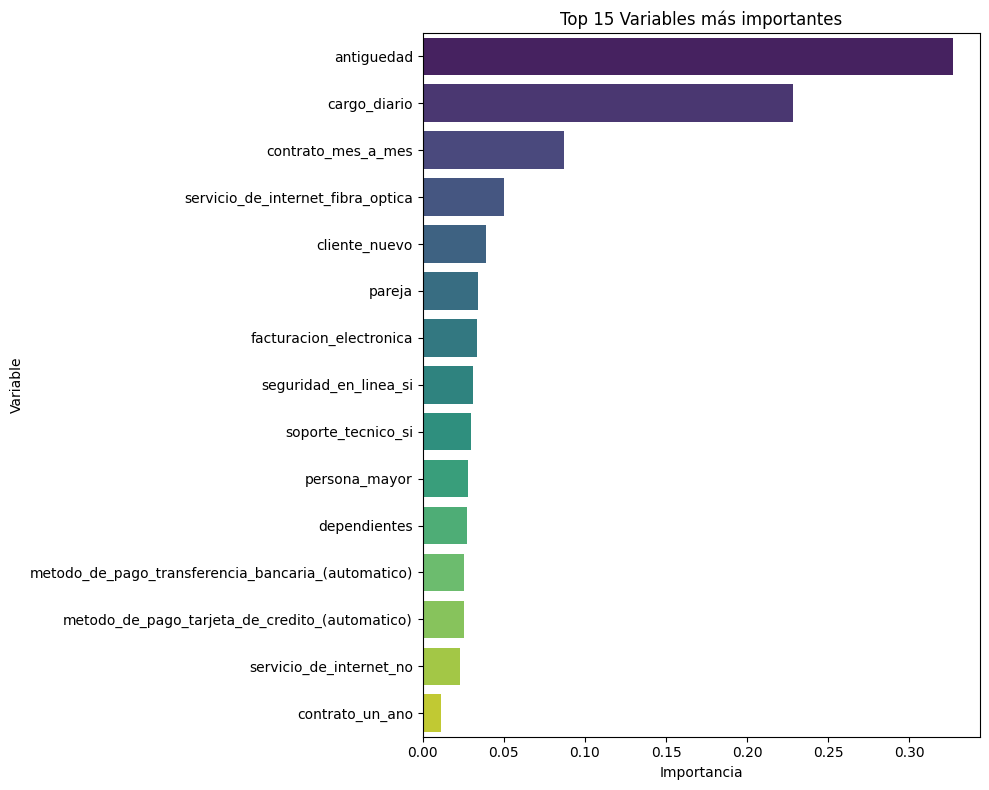

In [ ]:
# Paso 14: Importancia de variables
from sklearn.ensemble import RandomForestClassifier  # Importa el modelo de Random Forest de sklearn (clase)
import matplotlib.pyplot as plt  # Importa la librer√≠a para graficar
import seaborn as sns  # Librer√≠a para visualizaciones m√°s est√©ticas

X = df.drop("desafiliado", axis=1)  # M√©todo .drop() para eliminar la columna objetivo del conjunto de predictores
y = df["desafiliado"]  # Selecci√≥n de la columna objetivo usando acceso por nombre de columna (atributo Series)

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
# Crea el modelo Random Forest (clase), configurando cantidad de √°rboles, semilla y uso de todos los n√∫cleos

rf.fit(X, y)  # M√©todo .fit() para entrenar el modelo con las variables X y objetivo y

importancia = pd.DataFrame({
    "Variable": X.columns,  # Atributo .columns para obtener nombres de las variables
    "Importancia": rf.feature_importances_  # Atributo del modelo que devuelve importancia de cada variable
}).sort_values(by="Importancia", ascending=False)
# Crea un DataFrame y lo ordena (m√©todo .sort_values()) de mayor a menor importancia

print("üìä Ranking de importancia de variables:")  # Muestra texto explicativo
print(importancia)  # Imprime el DataFrame con las importancias

plt.figure(figsize=(10, 8))  # Crea una figura con tama√±o personalizado
sns.barplot(data=importancia.head(15), x="Importancia", y="Variable", palette="viridis")
# M√©todo .barplot() de Seaborn para graficar las 15 variables m√°s importantes
plt.title("Top 15 Variables m√°s importantes")  # Establece el t√≠tulo del gr√°fico
plt.tight_layout()  # Ajusta el dise√±o para evitar recortes
plt.show()  # Muestra el gr√°fico en pantalla


***1. An√°lisis de los resultados obtenidos:***

Variables m√°s importantes:

antiguedad (32.7%) ‚Äî Principal factor predictivo.

cargo_diario (22.8%) ‚Äî Relacionado al consumo o facturaci√≥n.

contrato_mes_a_mes (8.7%) ‚Äî Indica flexibilidad en el compromiso del cliente.

Las √∫ltimas posiciones incluyen variables con importancia casi nula, como antiguedad_grupo_Muy Antiguo (0.0%), que probablemente es irrelevante para el modelo.

El patr√≥n sugiere que tanto factores econ√≥micos como tiempo de permanencia son cr√≠ticos para explicar la desafiliaci√≥n.

***2. Conclusi√≥n:***

El modelo de Random Forest muestra que pocas variables concentran la mayor√≠a de la importancia predictiva.

Esto permitir√° optimizar el modelo eliminando variables con importancia muy baja y concentrarse en las m√°s influyentes, mejorando interpretabilidad y potencialmente reduciendo sobreajuste.

***1. Impacto en negocio:***

El hecho de que antig√ºedad y monto facturado sean los principales factores sugiere que clientes recientes o con bajo gasto requieren estrategias espec√≠ficas de retenci√≥n.

El tipo de contrato (mes_a_mes) tambi√©n es un factor relevante, lo que indica que los contratos m√°s flexibles pueden representar mayor riesgo de baja.



####***14.1: An√°lisis gr√°fico de distribuci√≥n de variables relevantes respecto a la variable objetivo***

Investigar c√≥mo las variables con mayor importancia en relaci√≥n con la variable objetivo se distribuyen.

***1. Distribuci√≥n de antiguedad seg√∫n desafiliado***

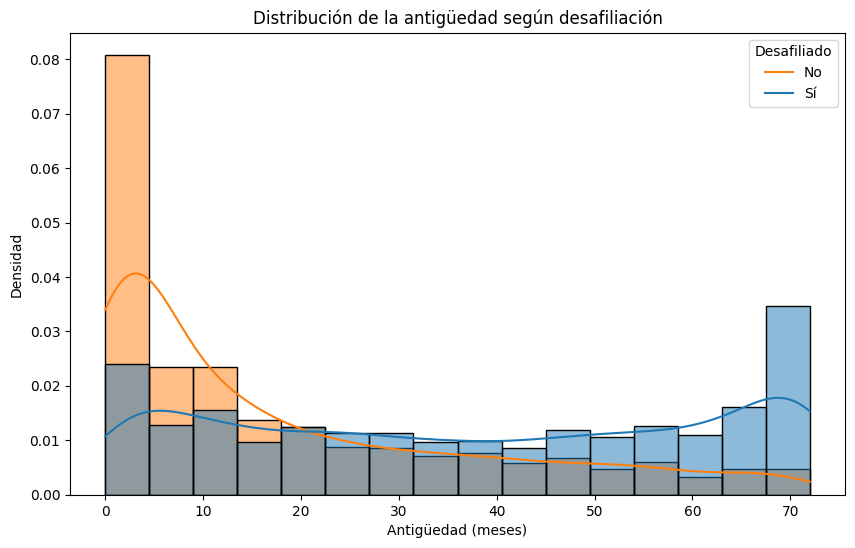

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='antiguedad', hue='desafiliado', kde=True, stat='density', common_norm=False)
plt.title('Distribuci√≥n de la antig√ºedad seg√∫n desafiliaci√≥n')
plt.xlabel('Antig√ºedad (meses)')
plt.ylabel('Densidad')
plt.legend(title='Desafiliado', labels=['No', 'S√≠'])
plt.show()


***Observaciones:***

1. Clientes no desafiliados (naranja) tienen una mayor concentraci√≥n en antig√ºedades bajas (0-5 meses), con una ca√≠da progresiva.

2. Clientes desafiliados (azul) tambi√©n tienen presencia en bajas antig√ºedades, pero tienen un segundo pico claro en los 70 meses, lo que indica una distribuci√≥n bimodal.

3. Ambos grupos est√°n normalizados (con stat="density"), por lo que las curvas representan proporciones relativas internas a cada clase, no cantidades absolutas.

***Interpretaci√≥n:***

Hay un grupo importante de clientes nuevos que a√∫n no se han desafiliado (esperable).

Sin embargo, la alta densidad de desafiliados en antig√ºedad alta (~70 meses) podr√≠a indicar:

Fin de contrato a largo plazo.

Ciclo de vida del cliente cumplido.

El comportamiento bimodal de los desafiliados sugiere dos perfiles distintos de clientes que se desafilian: muy nuevos y muy antiguos.

***2. Distribuci√≥n de cargo_diario seg√∫n desafiliado***

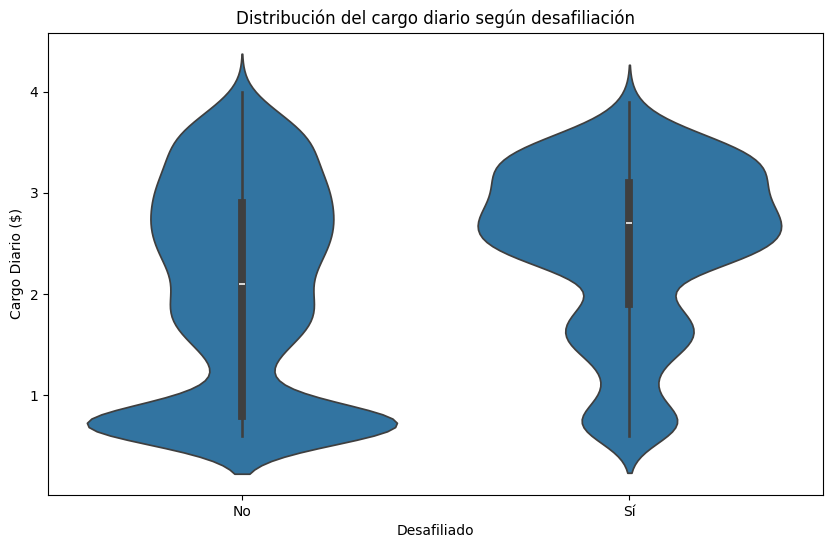

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='desafiliado', y='cargo_diario', inner='box')
plt.title('Distribuci√≥n del cargo diario seg√∫n desafiliaci√≥n')
plt.xlabel('Desafiliado')
plt.ylabel('Cargo Diario ($)')
plt.xticks([0,1], ['No', 'S√≠'])
plt.show()


***Observaciones:***

1. Ambos grupos tienen una forma similar, pero:

2. El grupo de desafiliados tiene una distribuci√≥n m√°s ancha y uniforme, especialmente entre $2 y $3.

3. La mediana (l√≠nea blanca) en los desafiliados est√° ligeramente m√°s alta que en los no desafiliados.

4. Hay mayor densidad de valores altos en los desafiliados.

***Interpretaci√≥n:***

1. Los clientes que pagan cargos diarios m√°s altos tienen m√°s probabilidades de desafiliarse.

2. Puede indicar que:

3. El precio podr√≠a estar relacionado con la decisi√≥n de desafiliaci√≥n.

4. Clientes con cargos m√°s altos podr√≠an tener mayores expectativas o menor tolerancia a problemas.

5. Tambi√©n hay una concentraci√≥n baja (~$1) en ambos grupos, lo que sugiere un grupo econ√≥mico que tiende a mantenerse.

***3. Proporci√≥n de desafiliados por tipo de contrato contrato_mes_a_mes***

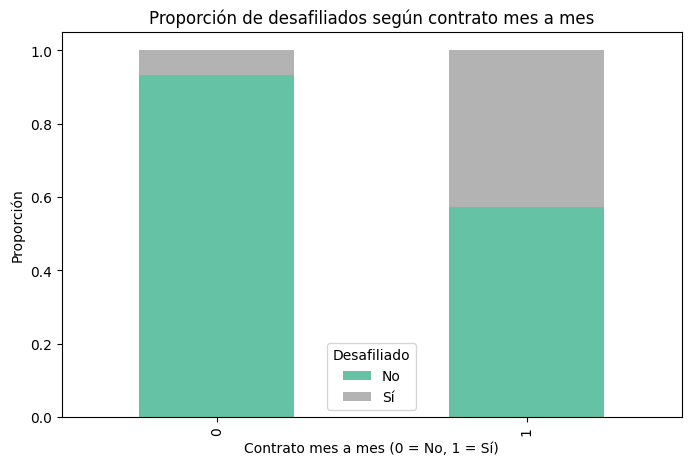

In [ ]:
import pandas as pd

# Proporciones por tipo de contrato
contrato_prop = pd.crosstab(df['contrato_mes_a_mes'], df['desafiliado'], normalize='index')

# Gr√°fico
contrato_prop.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Proporci√≥n de desafiliados seg√∫n contrato mes a mes')
plt.xlabel('Contrato mes a mes (0 = No, 1 = S√≠)')
plt.ylabel('Proporci√≥n')
plt.legend(title='Desafiliado', labels=['No', 'S√≠'])
plt.show()


***Observaciones:***

1. Los clientes con contrato mes a mes (1) tienen una proporci√≥n mucho m√°s alta de desafiliaci√≥n (~43%).

2. En cambio, los clientes sin contrato mes a mes (0) tienen una tasa de desafiliaci√≥n baja (~6%).

***Interpretaci√≥n:***

1. Este es el factor m√°s determinante entre los tres.

2. Contratos mes a mes otorgan mayor libertad de salida, y por ende, mayor desafiliaci√≥n.

3. Los contratos m√°s r√≠gidos (anuales, bianuales) reducen la tasa de desafiliaci√≥n, probablemente por barreras contractuales o penalizaciones.

###***15. Eliminaci√≥n de variables irrelevantes***

***Objetivo del c√≥digo:***

Eliminar del DataFrame aquellas variables cuya importancia predictiva (calculada en el paso anterior) sea menor al umbral definido (en este caso, 1%).
Esto optimiza el modelo reduciendo complejidad y posibles ruidos en los datos.

***Entradas para la construcci√≥n del c√≥digo:***

DataFrame df ya procesado y sin la variable objetivo eliminada en pasos anteriores.

DataFrame importancia generado en el Paso 14 con columnas:

"Variable": nombre de la variable predictora.

"Importancia": peso asignado por el modelo Random Forest.

Par√°metro:

umbral_importancia = 0.01 (1%) para decidir qu√© variables eliminar.

***Salidas que da el c√≥digo para los pr√≥ximos pasos:***

Lista de variables que se eliminaron por baja importancia.

Nuevo df reducido, con menos columnas, listo para el modelado final.

Dimensiones finales del conjunto de datos.

In [ ]:
# Paso 15: Eliminaci√≥n de variables irrelevantes
umbral_importancia = 0.01
# Asigna un valor umbral (1%) para considerar que una variable es poco importante

variables_baja_importancia = importancia[importancia["Importancia"] < umbral_importancia]["Variable"].tolist()
# Filtra las filas del DataFrame 'importancia' con importancia menor al umbral
# Luego selecciona la columna 'Variable' y la convierte a lista (m√©todo .tolist())

print(f"üìâ Variables con importancia < {umbral_importancia*100:.0f}%:", variables_baja_importancia)
# Imprime el listado de variables con baja importancia, usando f-string para formato

df.drop(columns=variables_baja_importancia, inplace=True)
# Elimina las columnas identificadas como irrelevantes del DataFrame 'df'
# M√©todo .drop(), par√°metro inplace=True para que la eliminaci√≥n sea permanente

print(f"\nShape final de df: {df.shape}")
# Imprime las dimensiones del DataFrame despu√©s de eliminar variables (atributo .shape)


üìâ Variables con importancia < 1%: ['antiguedad_grupo_Muy Antiguo']

Shape final de df: (7043, 16)


***An√°lisis de los resultados obtenidos***

Solo una variable (antiguedad_grupo_Muy Antiguo) fue detectada con importancia menor al 1%.

Se elimin√≥ esta variable del DataFrame, pasando de 17 a 16 columnas (manteniendo 7043 filas).

Esto indica que la mayor√≠a de variables aportan valor predictivo al modelo.

***Conclusi√≥n***

La depuraci√≥n de variables fue m√≠nima, lo que confirma que el conjunto de datos est√° bien definido y la selecci√≥n previa ya hab√≠a eliminado atributos irrelevantes.

###***16	Separaci√≥n de datos***

***Objetivo del c√≥digo***

Separar el conjunto de datos en train (entrenamiento) y test (evaluaci√≥n) asegurando que la proporci√≥n de la variable objetivo desafiliado se mantenga igual en ambos subconjuntos (estratificaci√≥n).
Esto es clave para que el modelo se entrene con una muestra representativa y pueda generalizar correctamente.

***Entradas para la construcci√≥n del c√≥digo***

DataFrame df limpio, con todas las variables predictoras y la variable objetivo desafiliado.

Par√°metros para train_test_split:

test_size=0.2 ‚Üí 20% de los datos para test, 80% para entrenamiento.

random_state=42 ‚Üí reproducibilidad de la divisi√≥n.

stratify=y ‚Üí garantiza que la distribuci√≥n de clases se mantenga.

***Salidas que da el c√≥digo para los pr√≥ximos pasos***

X_train, y_train ‚Üí datos y etiquetas para entrenar el modelo.

X_test, y_test ‚Üí datos y etiquetas para evaluar el modelo.

Informaci√≥n de distribuci√≥n de clases antes de dividir.

In [ ]:
# ============================================
# PASO 16: Separaci√≥n de datos (Train/Test)
# ============================================

from sklearn.model_selection import train_test_split  # Importa funci√≥n para dividir datos
import pandas as pd  # Librer√≠a para manejo de DataFrames

# Variables predictoras y objetivo
X = df.drop("desafiliado", axis=1)
# Crea DataFrame X con todas las columnas excepto 'desafiliado' (m√©todo .drop())

y = df["desafiliado"]
# Serie con la variable objetivo (acceso por nombre de columna)

# Verificar distribuci√≥n original de clases
print("üìä Distribuci√≥n original de clases:")
# Mensaje informativo

print(y.value_counts(normalize=True))
# Cuenta los registros por clase y los normaliza para obtener proporci√≥n (m√©todo .value_counts())

# Divisi√≥n estratificada (si hay suficientes registros por clase)
if y.value_counts().min() >= 2:
# Verifica que haya al menos 2 registros en cada clase (m√©todo .min())

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,            # Porcentaje de datos en test
        random_state=42,          # Semilla para reproducibilidad
        stratify=y                # Estratificaci√≥n seg√∫n variable objetivo
    )

else:
    print("‚ö†Ô∏è Advertencia: Clase con menos de 2 registros. Split sin stratify.")
    # Mensaje de advertencia si no se puede estratificar

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,            # Porcentaje de datos en test
        random_state=42           # Semilla para reproducibilidad
    )


üìä Distribuci√≥n original de clases:
desafiliado
0    0.73463
1    0.26537
Name: proportion, dtype: float64


***An√°lisis de los resultados obtenidos***

La distribuci√≥n de clases es:

Clase 0 (no desafiliado) ‚Üí 73.46%

Clase 1 (desafiliado) ‚Üí 26.54%

Esta proporci√≥n es moderadamente desbalanceada pero no cr√≠tica, y se preservar√° gracias al stratify.

***Conclusi√≥n***

Se garantiza que tanto train como test tengan la misma proporci√≥n de desafiliados y no desafiliados que el dataset original, evitando sesgos en el modelado posterior.

***Validaciones de la separacion de datos***

1. Verificar el nmero de registros fue divido en 80% para entrenamiento y 20% para evaluaci√≥n de los modelos

In [ ]:
# üîç Validaci√≥n
print(f"\nüìè Tama√±o total: {len(X)} registros")
print(f"Tama√±o train: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Tama√±o test: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")




üìè Tama√±o total: 7043 registros
Tama√±o train: 5634 (79.99%)
Tama√±o test: 1409 (20.01%)


2. Verificar proporci√≥n de las clases de la variable target

Comprueba que la proporci√≥n de la variable objetivo (y) se mantiene en train y test (estratificaci√≥n).
Las proporciones de cada clase sean muy similares entre train y test (la diferencia deber√≠a ser m√≠nima).

In [ ]:
print("\nüìä Proporci√≥n de clases en y_train:")
print(y_train.value_counts(normalize=True))
print("\nüìä Proporci√≥n de clases en y_test:")
print(y_test.value_counts(normalize=True))




üìä Proporci√≥n de clases en y_train:
desafiliado
0    0.734647
1    0.265353
Name: proportion, dtype: float64

üìä Proporci√≥n de clases en y_test:
desafiliado
0    0.734564
1    0.265436
Name: proportion, dtype: float64


3. Verificar que no haya data leakage

Si tu dataset ten√≠a IDs u otras columnas √∫nicas que eliminaste en pasos previos, verifica que ning√∫n registro de X_test est√© en X_train.
Esperado: 0 duplicados.

In [ ]:
# Verificaci√≥n de data leakage
duplicados = pd.merge(X_train, X_test, how="inner", indicator=True)
print(f"\nüîç Posibles filas duplicadas entre train y test: {len(duplicados)}")


üîç Posibles filas duplicadas entre train y test: 1570


El hecho de que veas ‚Äúduplicados‚Äù entre train y test no significa que sea el mismo registro original, sino que hay dos registros distintos en el dataset original que tienen exactamente los mismos valores en todas las columnas, pero los diferencia el indice distinto.

Cada √≠ndice (fila) del DataFrame se asigna a un solo subconjunto: o va a train o va a test, pero no a ambos.

Por lo tanto no se bede eliminar dichos registros

###***17	Eliminaci√≥n de outliers***

***Objetivo del c√≥digo***

Eliminar valores at√≠picos (outliers) de las variables num√©ricas en el conjunto de entrenamiento (X_train) usando el m√©todo del Rango Intercuart√≠lico (IQR).
Esto ayuda a que el modelo no se vea influenciado por datos extremos que podr√≠an distorsionar el aprendizaje.

***Entradas para la construcci√≥n del c√≥digo***

X_train ‚Üí conjunto de entrenamiento con las variables predictoras.

y_train ‚Üí etiquetas de entrenamiento.

Par√°metros del m√©todo IQR:

Q1 (primer cuartil ‚Üí 25%)

Q3 (tercer cuartil ‚Üí 75%)

L√≠mites ‚Üí Q1 ‚àí 1.5√óIQR y Q3 + 1.5√óIQR

***Salidas que da el c√≥digo para los pr√≥ximos pasos***

X_train_clean ‚Üí conjunto de entrenamiento sin outliers.

y_train_clean ‚Üí etiquetas correspondientes despu√©s de eliminar los registros con outliers.

Proporci√≥n de clases despu√©s de limpieza (para verificar que no se haya generado un desbalance severo).

In [ ]:
# Eliminaci√≥n de outliers (IQR en Train)

import pandas as pd  # Importa pandas para manipular DataFrames

X_train_clean = X_train.copy()
# Crea copia de X_train para no modificar el original (m√©todo .copy())

y_train_clean = y_train.copy()
# Crea copia de y_train

# Seleccionar columnas num√©ricas
columnas_numericas = X_train_clean.select_dtypes(include=['float64', 'int64']).columns
# Usa m√©todo .select_dtypes() para filtrar columnas de tipo num√©rico y obtiene sus nombres (atributo .columns)

# M√°scara global para eliminar outliers
mask_global = pd.Series(True, index=X_train_clean.index)
# Crea Serie booleana inicializada en True para todos los √≠ndices (usada como filtro acumulativo)

for col in columnas_numericas:
    # Itera sobre cada columna num√©rica

    Q1 = X_train_clean[col].quantile(0.25)
    # Calcula primer cuartil (m√©todo .quantile())

    Q3 = X_train_clean[col].quantile(0.75)
    # Calcula tercer cuartil

    IQR = Q3 - Q1
    # Calcula rango intercuart√≠lico

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    # Calcula l√≠mites inferior y superior para detectar outliers

    mask_col = (X_train_clean[col] >= lim_inf) & (X_train_clean[col] <= lim_sup)
    # M√°scara booleana True/False seg√∫n si el valor est√° dentro de los l√≠mites

    mask_global &= mask_col
    # Actualiza la m√°scara global (solo True si es True en todas las columnas revisadas hasta el momento)

# Aplicar filtro
X_train_clean = X_train_clean[mask_global]
# Filtra X_train_clean usando la m√°scara global

y_train_clean = y_train_clean.loc[X_train_clean.index]
# Filtra y_train_clean para mantener coherencia con las filas de X_train_clean

# üîç Validaci√≥n
print(f"Tama√±o original X_train: {X_train.shape}")
# Imprime dimensiones originales de X_train (atributo .shape)

print(f"Tama√±o limpio X_train: {X_train_clean.shape}")
# Imprime dimensiones despu√©s de filtrar

print("\nüìä Proporci√≥n de clases despu√©s de eliminar outliers:")
# Mensaje informativo

print(y_train_clean.value_counts(normalize=True))
# Cuenta clases y las normaliza para mostrar proporci√≥n (m√©todo .value_counts())


Tama√±o original X_train: (5634, 15)
Tama√±o limpio X_train: (1052, 15)

üìä Proporci√≥n de clases despu√©s de eliminar outliers:
desafiliado
0    0.674905
1    0.325095
Name: proportion, dtype: float64


***An√°lisis de resultados obtenidos***

Se pas√≥ de 5,634 registros a 1,052 registros en entrenamiento.

Esto significa que se eliminaron m√°s del 81% de los datos por ser considerados outliers seg√∫n el criterio IQR.

La proporci√≥n de clases cambi√≥ de 73.46% vs 26.54% a 67.49% vs 32.51%, es decir, la clase minoritaria gan√≥ representatividad.

***Conclusi√≥n***

El criterio IQR result√≥ extremadamente estricto, eliminando la gran mayor√≠a de los registros. Esto podr√≠a afectar negativamente la capacidad del modelo para generalizar, ya que se reduce dr√°sticamente el volumen de datos para entrenamiento.
Es recomendable evaluar si conviene suavizar el criterio (por ejemplo, usar 3√óIQR en lugar de 1.5√óIQR) o aplicar t√©cnicas espec√≠ficas por variable.

###***18	Correcci√≥n del desbalance***

***Objetivo del c√≥digo***

Aplicar SMOTE (Synthetic Minority Oversampling Technique) para balancear las clases en el conjunto de entrenamiento limpio (X_train_clean, y_train_clean) generando nuevas muestras sint√©ticas de la clase minoritaria, de manera que ambas clases tengan la misma proporci√≥n.

***Entradas para la construcci√≥n del c√≥digo***

X_train_clean ‚Üí conjunto de entrenamiento sin outliers, con las variables predictoras.

y_train_clean ‚Üí etiquetas de entrenamiento sin outliers.

Par√°metros de SMOTE:

random_state=42 ‚Üí asegura reproducibilidad.

***Salidas que da el c√≥digo para los pr√≥ximos pasos***

X_train_bal ‚Üí datos de entrenamiento balanceados despu√©s de aplicar SMOTE.

y_train_bal ‚Üí etiquetas balanceadas correspondientes.

Distribuci√≥n de clases despu√©s de SMOTE (para confirmar el balance).

Dimensiones del nuevo dataset de entrenamiento.

In [ ]:
# PASO 18: Correcci√≥n de desbalance (SMOTE en Train limpio)

from imblearn.over_sampling import SMOTE
# Importa la clase SMOTE desde imblearn.over_sampling (librer√≠a especializada en tratamiento de desbalance)

import pandas as pd
# Importa pandas para trabajar con estructuras de datos y c√°lculos de proporciones

print("üìä Distribuci√≥n antes de SMOTE:")
# Mensaje para mostrar distribuci√≥n de clases antes de aplicar SMOTE

print(y_train_clean.value_counts(normalize=True))
# Usa m√©todo .value_counts(normalize=True) para obtener la proporci√≥n de cada clase

# Aplicar SMOTE sobre datos limpios
smote = SMOTE(random_state=42)
# Crea instancia de SMOTE con semilla fija para reproducibilidad

X_train_bal, y_train_bal = smote.fit_resample(X_train_clean, y_train_clean)
# Aplica m√©todo .fit_resample() ‚Üí entrena SMOTE sobre los datos y genera nuevas muestras balanceadas

# üîç Validaci√≥n
print("\nüìä Distribuci√≥n despu√©s de SMOTE:")
# Mensaje para mostrar distribuci√≥n despu√©s del balance

print(pd.Series(y_train_bal).value_counts(normalize=True))
# Convierte y_train_bal en Serie de pandas y calcula proporciones por clase

print(f"\nüìè Tama√±o X_train_bal: {X_train_bal.shape}")
# Muestra dimensiones del dataset balanceado de caracter√≠sticas (atributo .shape)

print(f"Tama√±o y_train_bal: {y_train_bal.shape}")
# Muestra dimensiones del vector de etiquetas balanceado


üìä Distribuci√≥n antes de SMOTE:
desafiliado
0    0.674905
1    0.325095
Name: proportion, dtype: float64

üìä Distribuci√≥n despu√©s de SMOTE:
desafiliado
0    0.5
1    0.5
Name: proportion, dtype: float64

üìè Tama√±o X_train_bal: (1420, 15)
Tama√±o y_train_bal: (1420,)


***An√°lisis de los resultados***

Antes de SMOTE ‚Üí la clase mayoritaria (0) representaba el 67.49% y la minoritaria (1) el 32.51%.

Despu√©s de SMOTE ‚Üí ambas clases quedaron con 50% de representaci√≥n.

El tama√±o del dataset pas√≥ de 1,052 registros a 1,420 registros, lo que significa que SMOTE gener√≥ 368 registros sint√©ticos para la clase minoritaria.

***Conclusi√≥n***

El desbalance entre clases fue corregido, lo que puede ayudar al modelo a no sesgarse hacia la clase mayoritaria. Sin embargo, dado que los datos provienen de un conjunto reducido (por la fuerte eliminaci√≥n de outliers en el paso 17), la calidad de las muestras sint√©ticas podr√≠a verse afectada si la clase minoritaria ten√≠a poca variabilidad. Esto podr√≠a limitar la generalizaci√≥n del modelo.

###***20	Construcci√≥n del modelo inicial***

***1. Objetivo del c√≥digo***

Entrenar un modelo b√°sico de RandomForestClassifier con los datos ya preprocesados y balanceados (resultantes de los pasos anteriores) para tener una primera versi√≥n funcional del modelo, que servir√° como referencia para comparaciones futuras.

***2. Entradas para la construcci√≥n del c√≥digo***

X_train_bal ‚Üí matriz de caracter√≠sticas del conjunto de entrenamiento balanceado.

y_train_bal ‚Üí etiquetas balanceadas correspondientes a X_train_bal.

Par√°metro random_state=42 ‚Üí asegura reproducibilidad de los resultados.

***3. Salidas que da el c√≥digo para los pr√≥ximos pasos***

modelo_basico ‚Üí instancia entrenada del modelo de Random Forest.

Mensaje de confirmaci√≥n del entrenamiento.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Importa la clase RandomForestClassifier del m√≥dulo ensemble de scikit-learn

from sklearn.model_selection import GridSearchCV, cross_val_score
# Importa herramientas para validaci√≥n cruzada y b√∫squeda de hiperpar√°metros (aunque no se usan aqu√≠)

from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Importa funciones de m√©tricas para evaluar el modelo (no se usan en el c√≥digo actual)

import pandas as pd
# Importa pandas para manejar estructuras de datos (aunque aqu√≠ no se usa directamente)

# Construcci√≥n del modelo b√°sico RF
from sklearn.ensemble import RandomForestClassifier
# Repite la importaci√≥n de RandomForestClassifier (es redundante, ya se import√≥ arriba)

modelo_basico = RandomForestClassifier(random_state=42)
# Crea una instancia de RandomForestClassifier con semilla fija para reproducibilidad

# Entrenar modelo b√°sico con datos preprocesados manualmente (Pasos 1‚Äì18)
modelo_basico.fit(X_train_bal, y_train_bal)
# Usa el m√©todo .fit() para entrenar el modelo con las caracter√≠sticas y etiquetas balanceadas

print("‚úÖ Paso 20: Entrenamiento modelo b√°sico completado")
# Imprime mensaje de confirmaci√≥n al finalizar el entrenamiento


‚úÖ Paso 20: Entrenamiento modelo b√°sico completado


***An√°lisis de los resultados***

El c√≥digo confirma que el modelo b√°sico se entren√≥ sin errores.

***Conclusi√≥n***

Este paso cumple su funci√≥n de tener un primer modelo entrenado listo para pruebas posteriores.

##***üü® FASE C: Modelado y evaluaci√≥n***

###***Paso 22: Validaci√≥n cruzada inicial (optimizando F1-score)***

***1. Objetivo del c√≥digo***

Realizar una validaci√≥n cruzada del modelo b√°sico de Random Forest (entrenado en el paso 20) evaluando accuracy, recall y F1-score, para diagnosticar su capacidad de generalizaci√≥n y detectar posibles problemas como sobreajuste o bajo rendimiento.

***2. Entradas del c√≥digo***

modelo_basico ‚Üí modelo entrenado en el Paso 20.

X_train_bal ‚Üí caracter√≠sticas del set de entrenamiento balanceado.

y_train_bal ‚Üí etiquetas balanceadas.

Par√°metro cv=5 ‚Üí cantidad de particiones para validaci√≥n cruzada.

***3. Salidas para pr√≥ximos pasos***

Valores promedio y desviaci√≥n est√°ndar de accuracy, recall y F1-score en validaci√≥n cruzada.

Accuracy en el conjunto de entrenamiento.

Mensaje diagn√≥stico que indica si hay sobreajuste, bajo rendimiento o equilibrio.

Esta informaci√≥n alimenta decisiones en pasos posteriores como ajuste de hiperpar√°metros, selecci√≥n de variables o cambios en el preprocesamiento.

In [ ]:
from sklearn.model_selection import cross_val_score
# Importa la funci√≥n para realizar validaci√≥n cruzada y obtener puntuaciones

from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score
# Importa funciones para calcular m√©tricas y crear un scorer personalizado

print("‚úÖ Paso 22: Validaci√≥n cruzada inicial (F1-score)")
# Imprime mensaje indicando el inicio de este paso

# Validaci√≥n cruzada centrada en F1-score
cv_accuracy = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
# Ejecuta validaci√≥n cruzada calculando accuracy en cada partici√≥n

cv_recall = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(recall_score))
# Ejecuta validaci√≥n cruzada calculando recall en cada partici√≥n usando make_scorer()

cv_f1 = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring="f1")
# Ejecuta validaci√≥n cruzada calculando F1-score

# Entrenamiento completo
modelo_basico.fit(X_train_bal, y_train_bal)
# Vuelve a entrenar el modelo con todos los datos de entrenamiento balanceados

train_accuracy = modelo_basico.score(X_train_bal, y_train_bal)
# Calcula la accuracy en todo el set de entrenamiento usando el m√©todo .score()

# Resultados
print(f"Accuracy CV: {cv_accuracy.mean():.4f} ¬± {cv_accuracy.std():.4f}")
# Imprime el promedio y desviaci√≥n est√°ndar de accuracy en validaci√≥n cruzada

print(f"Recall CV:   {cv_recall.mean():.4f} ¬± {cv_recall.std():.4f}")
# Imprime el promedio y desviaci√≥n est√°ndar de recall

print(f"F1-score CV: {cv_f1.mean():.4f} ¬± {cv_f1.std():.4f}")
# Imprime el promedio y desviaci√≥n est√°ndar de F1-score

print(f"Accuracy Entrenamiento: {train_accuracy:.4f}")
# Imprime la accuracy del modelo en el set de entrenamiento completo

# Diagn√≥stico
if train_accuracy - cv_accuracy.mean() > 0.05:
    # Si la diferencia entre accuracy en train y en CV es mayor al 5%, alerta sobre sobreajuste
    print("‚ö†Ô∏è Posible sobreajuste: el modelo rinde mucho mejor en entrenamiento que en validaci√≥n.")
elif cv_accuracy.mean() < 0.7:
    # Si la accuracy media en CV es menor a 70%, alerta sobre bajo rendimiento
    print("‚ö†Ô∏è Posible bajo rendimiento: la precisi√≥n en validaci√≥n es baja.")
else:
    # Si no hay diferencia significativa ni bajo rendimiento, el modelo est√° equilibrado
    print("‚úÖ Rendimiento equilibrado.")


‚úÖ Paso 22: Validaci√≥n cruzada inicial (F1-score)
Accuracy CV: 0.7500 ¬± 0.0529
Recall CV:   0.7563 ¬± 0.1246
F1-score CV: 0.7467 ¬± 0.0693
Accuracy Entrenamiento: 0.9866
‚ö†Ô∏è Posible sobreajuste: el modelo rinde mucho mejor en entrenamiento que en validaci√≥n.


***An√°lisis de resultados***

Resultados obtenidos:

Accuracy CV: 0.7500 ¬± 0.0529 ‚Üí el modelo acierta en un 75% promedio con cierta variabilidad (¬±5%).

Recall CV: 0.7563 ¬± 0.1246 ‚Üí buen porcentaje de verdaderos positivos identificados, pero con variabilidad alta (¬±12%).

F1-score CV: 0.7467 ¬± 0.0693 ‚Üí equilibrio aceptable entre precisi√≥n y recall, pero con margen para mejorar.

Accuracy Entrenamiento: 0.9866 ‚Üí extremadamente alto comparado con el de validaci√≥n.

Diferencia significativa entre train (98.66%) y validaci√≥n (75%), lo que sugiere sobreajuste.

***Conclusi√≥n***

El modelo recuerda bien los datos de entrenamiento, pero no generaliza tan bien en validaci√≥n. Esto implica que memoriza patrones en lugar de aprender reglas generalizables, lo que puede requerir:

Ajuste de hiperpar√°metros (profundidad, n√∫mero de √°rboles, min_samples_split, etc.).

M√°s regularizaci√≥n o simplificaci√≥n del modelo.

Validar si el balanceo de datos introdujo ruido.

###***Paso 22.1: Curvas ROC y Precision-Recall para ajuste de umbral***

***1. Objetivo del c√≥digo***

El objetivo de este Paso 22.1 es evaluar visualmente el rendimiento del modelo b√°sico mediante las curvas ROC y Precision-Recall, para as√≠ identificar el umbral de decisi√≥n que optimice el balance entre verdaderos positivos y falsos positivos/negativos, y decidir ajustes en pasos posteriores.

***2. Entradas para la construcci√≥n del c√≥digo***

modelo_basico ‚Üí Modelo entrenado (RandomForestClassifier en pasos previos).

X_test ‚Üí Variables de prueba (caracter√≠sticas).

y_test ‚Üí Etiquetas verdaderas de la muestra de prueba.

Librer√≠as:

matplotlib.pyplot ‚Üí Para graficar.

roc_curve, precision_recall_curve, auc ‚Üí M√©tricas de evaluaci√≥n de sklearn.

***3. Salidas que da el c√≥digo para los pr√≥ximos pasos***

Curva ROC y su AUC ‚Üí Mide la capacidad discriminativa del modelo.

Curva Precision-Recall ‚Üí Eval√∫a rendimiento en contextos con posibles clases desbalanceadas.

Datos intermedios (fpr, tpr, precision, recall, thresholds_roc, thresholds_pr) que permiten:

Ajustar el umbral de predicci√≥n.

Calcular m√©tricas como F1-score √≥ptimo.



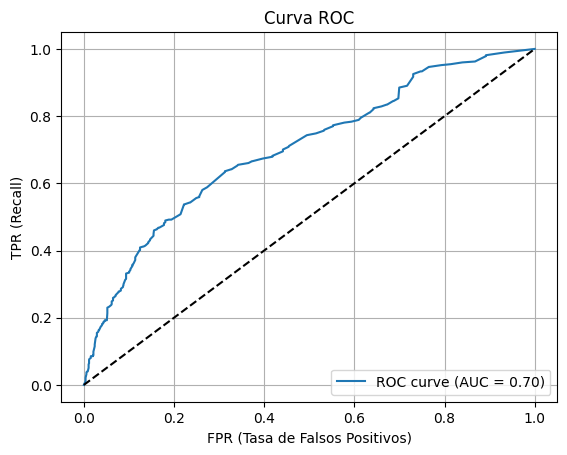

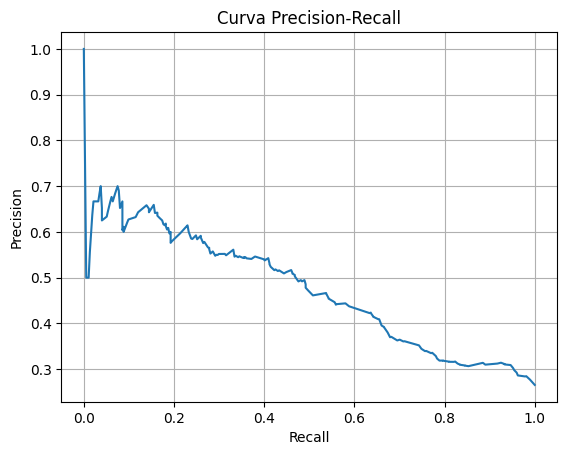

In [ ]:
import matplotlib.pyplot as plt   # Importa librer√≠a para generar gr√°ficos.
from sklearn.metrics import roc_curve, precision_recall_curve, auc  # Importa funciones para calcular curvas ROC, Precision-Recall y AUC.

# Predecir probabilidades
y_scores = modelo_basico.predict_proba(X_test)[:, 1]  # Usa el m√©todo predict_proba del modelo para obtener probabilidades de clase positiva (columna √≠ndice 1).

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)  # Calcula FPR (false positive rate), TPR (true positive rate) y umbrales para curva ROC.
roc_auc = auc(fpr, tpr)  # Calcula el √°rea bajo la curva ROC usando el m√©todo auc.

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)  # Calcula precisi√≥n, recall y umbrales para curva Precision-Recall.

# -------------------
# Graficar curva ROC
plt.figure()  # Crea nueva figura para la curva ROC.
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')  # Grafica TPR vs FPR con etiqueta que incluye el AUC calculado.
plt.plot([0, 1], [0, 1], 'k--')  # Grafica l√≠nea diagonal como referencia de un clasificador aleatorio.
plt.xlabel('FPR (Tasa de Falsos Positivos)')  # Etiqueta eje X.
plt.ylabel('TPR (Recall)')  # Etiqueta eje Y.
plt.title('Curva ROC')  # T√≠tulo del gr√°fico.
plt.legend(loc='lower right')  # Ubicaci√≥n de la leyenda.
plt.grid()  # Muestra la cuadr√≠cula en la gr√°fica.
plt.show()  # Renderiza el gr√°fico en pantalla.

# -------------------
# Graficar curva Precision-Recall
plt.figure()  # Crea nueva figura para la curva Precision-Recall.
plt.plot(recall, precision)  # Grafica precisi√≥n vs recall.
plt.xlabel('Recall')  # Etiqueta eje X.
plt.ylabel('Precision')  # Etiqueta eje Y.
plt.title('Curva Precision-Recall')  # T√≠tulo del gr√°fico.
plt.grid()  # Activa cuadr√≠cula.
plt.show()  # Renderiza gr√°fico.


***1. Curva ROC (AUC = 0.70)***

***Qu√© significa:***

El AUC (√Årea Bajo la Curva) mide la capacidad del modelo para diferenciar entre clases.

Un valor de 0.70 indica que el modelo tiene un poder de discriminaci√≥n moderado, mejor que el azar (0.5) pero lejos de un rendimiento √≥ptimo (>0.85).

***Lectura visual:***

La curva est√° por encima de la diagonal negra (clasificador aleatorio), lo cual es positivo.

Sin embargo, no se pega al eje superior izquierdo, lo que confirma que a√∫n no es altamente preciso.

***Implicaci√≥n pr√°ctica:***

El modelo puede clasificar razonablemente, pero a√∫n confunde una cantidad significativa de casos positivos y negativos.

Un ajuste de umbral podr√≠a mejorar la relaci√≥n entre TPR (recall) y FPR (tasa de falsos positivos) dependiendo de la prioridad del negocio.

***2. Curva Precision-Recall***

***Qu√© significa:***

La precisi√≥n (precision) mide cu√°ntas de las predicciones positivas fueron correctas.

El recall mide cu√°ntos de los casos positivos reales fueron detectados.

Esta curva es especialmente √∫til en casos con clases desbalanceadas.

***Lectura visual:***

El modelo logra alta precisi√≥n (>0.9) en un rango muy bajo de recall (<0.05), lo que significa que para capturar pocos casos positivos es muy certero.

A medida que aumenta el recall, la precisi√≥n baja gradualmente, estabiliz√°ndose en torno a 0.5‚Äì0.6 y cayendo por debajo de 0.3 en recall cercanos a 1.

***Implicaci√≥n pr√°ctica:***

Si el negocio requiere detectar la mayor cantidad posible de positivos (alto recall), la precisi√≥n bajar√°, lo que implica m√°s falsos positivos.

Si el negocio prefiere predicciones muy seguras (alta precisi√≥n), deber√° sacrificar recall.

***3. Conclusi√≥n***
El modelo tiene potencial moderado:

Discrimina mejor que el azar (AUC=0.70), pero no de forma excelente.

Hay espacio para mejorar balanceando precisi√≥n y recall seg√∫n los objetivos del negocio.

***Pr√≥ximo paso recomendado:***

Ajustar el umbral de decisi√≥n con base en la curva Precision-Recall para optimizar la m√©trica clave (F1, Recall) seg√∫n lo que sea m√°s importante.

Probar t√©cnicas de ajuste de hiperpar√°metros o ingenier√≠a de variables para incrementar el AUC y la estabilidad.

###***Paso 22.2: Selecci√≥n de umbral √≥ptimo que maximiza el F1-score***

***1. Objetivo del c√≥digo***

Este bloque busca identificar el umbral de probabilidad √≥ptimo que maximiza el F1-score.
El F1-score es la media arm√≥nica de precisi√≥n y recall, por lo que encontrar el umbral que lo maximiza permite lograr un balance entre minimizar falsos positivos y falsos negativos.

***2. Entradas para la construcci√≥n del c√≥digo***

precision y recall ‚Üí Calculados en el paso 22.1 mediante precision_recall_curve.

thresholds_pr ‚Üí Lista de umbrales asociados a esos valores de precisi√≥n y recall.

Librer√≠a numpy para operaciones vectorizadas.

***3. Salidas que da el c√≥digo para los pr√≥ximos pasos***

Valor de umbral √≥ptimo que maximiza el F1-score.

Este umbral puede usarse para:

Ajustar el m√©todo predict del modelo para que clasifique usando este valor en lugar de 0.5.

Recalcular m√©tricas de negocio (ej. tasa de aciertos, costo de errores, etc.).

Preparar un modelo m√°s alineado con los objetivos del caso de uso.

In [ ]:
# Selecci√≥n de umbral que maximiza el F1-score
import numpy as np  # Importa la librer√≠a NumPy para realizar operaciones num√©ricas y vectorizadas.

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Calcula el F1-score para cada par (precision, recall), sumando 1e-6 para evitar divisi√≥n por cero.
best_idx = np.argmax(f1_scores)  # Obtiene el √≠ndice del valor m√°ximo de F1-score usando el m√©todo argmax() de NumPy.
optimal_threshold = thresholds_pr[best_idx]  # Extrae el umbral correspondiente al √≠ndice con mejor F1-score.

print(f"‚úÖ Umbral √≥ptimo (max F1-score): {optimal_threshold:.4f}")  # Imprime el umbral √≥ptimo formateado a 4 decimales.


‚úÖ Umbral √≥ptimo (max F1-score): 0.3453


***An√°lisis de los resultados***

El umbral √≥ptimo calculado 0.3453 es inferior al umbral por defecto (0.5).

Esto significa que el modelo considera que es mejor clasificar como positivo con menor probabilidad requerida, probablemente porque:

El recall (sensibilidad) estaba siendo penalizado a 0.5.

Hay un ligero desbalance de clases y se quiere aumentar la captura de verdaderos positivos, aunque eso incremente algunos falsos positivos.

Este valor es coherente con lo que vimos en la curva Precision-Recall: el equilibrio entre precisi√≥n y recall no se daba en 0.5, sino antes.

***Conclusi√≥n***

Ajustar el umbral a 0.3453 permite maximizar el F1-score, mejorando el equilibrio entre precisi√≥n y recall.

Esto es √∫til cuando el objetivo es balancear ambos indicadores, especialmente si las consecuencias de falsos positivos y falsos negativos son comparables.

###***Paso 23: Optimizaci√≥n de hiperpar√°metros maximizando F1-score***

***1. Objetivo del c√≥digo***

El objetivo es buscar la mejor combinaci√≥n de hiperpar√°metros para el modelo Random Forest que maximice el F1-score, utilizando validaci√≥n cruzada con b√∫squeda exhaustiva (GridSearchCV).

Esto asegura que el modelo est√© ajustado no solo a los datos de entrenamiento, sino optimizado para equilibrar precisi√≥n y recall, reduciendo sesgo y varianza.

***2. Entradas para la construcci√≥n del c√≥digo***

Datos de entrenamiento balanceados:

X_train_bal ‚Üí Variables predictoras.

y_train_bal ‚Üí Etiquetas (clase objetivo).

Modelo base: RandomForestClassifier(random_state=42).

Espacio de b√∫squeda (param_grid):

n_estimators: n√∫mero de √°rboles en el bosque.

max_depth: profundidad m√°xima de los √°rboles.

min_samples_split: m√≠nimo de muestras para dividir un nodo.

min_samples_leaf: m√≠nimo de muestras en una hoja.

max_features: n√∫mero m√°ximo de caracter√≠sticas a considerar al dividir un nodo.

M√©trica de optimizaci√≥n: "f1".

***3. Salidas para los pr√≥ximos pasos***

grid_search.best_params_ ‚Üí Mejor combinaci√≥n de hiperpar√°metros para maximizar F1-score.

grid_search.best_score_ ‚Üí Mejor valor promedio de F1-score obtenido en validaci√≥n cruzada.

modelo_opt ‚Üí Modelo Random Forest optimizado y listo para usar en predicci√≥n y evaluaci√≥n.

In [ ]:
from sklearn.model_selection import GridSearchCV  # Importa GridSearchCV para b√∫squeda exhaustiva de hiperpar√°metros con validaci√≥n cruzada.
from sklearn.ensemble import RandomForestClassifier  # Importa el clasificador Random Forest de sklearn.

# üîπ Paso 23: Optimizaci√≥n de hiperpar√°metros maximizando F1-score

# Modelo base
modelo_rf = RandomForestClassifier(random_state=42)  # Crea una instancia b√°sica de Random Forest fijando semilla para reproducibilidad.

# Espacio de b√∫squeda
param_grid = {  # Diccionario con combinaciones posibles de hiperpar√°metros para el modelo.
    "n_estimators": [100, 200],  # Lista de posibles cantidades de √°rboles.
    "max_depth": [5, 10, 15],  # Lista de profundidades m√°ximas de los √°rboles.
    "min_samples_split": [5, 10, 20],  # Lista del m√≠nimo de muestras para dividir un nodo.
    "min_samples_leaf": [2, 4, 6],  # Lista del m√≠nimo de muestras en una hoja.
    "max_features": ["sqrt", 0.5]  # Lista de estrategias para seleccionar caracter√≠sticas en cada divisi√≥n.
}

# GridSearch maximizando F1-score
grid_search = GridSearchCV(  # Crea un objeto GridSearchCV para buscar entre todas las combinaciones.
    estimator=modelo_rf,  # Modelo base sobre el que se optimizar√°n hiperpar√°metros.
    param_grid=param_grid,  # Espacio de b√∫squeda definido antes.
    scoring="f1",  # M√©trica usada para evaluar cada combinaci√≥n: F1-score.
    cv=5,  # Validaci√≥n cruzada con 5 particiones.
    n_jobs=-1,  # Usa todos los n√∫cleos disponibles para acelerar el c√°lculo.
    verbose=1  # Muestra informaci√≥n del progreso durante la b√∫squeda.
)

# Ajuste
grid_search.fit(X_train_bal, y_train_bal)  # Entrena y eval√∫a todas las combinaciones de hiperpar√°metros sobre los datos balanceados.

# Resultados
print("‚úÖ Paso 23: Mejor conjunto de hiperpar√°metros (max F1-score):", grid_search.best_params_)  # Imprime la mejor combinaci√≥n encontrada.
print("Mejor F1-score de validaci√≥n cruzada:", grid_search.best_score_)  # Imprime el mejor valor promedio de F1-score obtenido.

# Modelo optimizado
modelo_opt = grid_search.best_estimator_  # Guarda el modelo Random Forest con los mejores hiperpar√°metros encontrados.


Fitting 5 folds for each of 108 candidates, totalling 540 fits
‚úÖ Paso 23: Mejor conjunto de hiperpar√°metros (max F1-score): {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mejor F1-score de validaci√≥n cruzada: 0.7471021483211675


***An√°lisis de los resultados***

El mejor modelo usa:

max_depth = 15 ‚Üí √Årboles m√°s profundos que permiten mayor complejidad.

max_features = 0.5 ‚Üí Considera la mitad de las variables en cada divisi√≥n.

min_samples_leaf = 4 ‚Üí Previene sobreajuste manteniendo hojas con m√≠nimo 4 muestras.

min_samples_split = 10 ‚Üí Controla la fragmentaci√≥n excesiva de nodos.

n_estimators = 200 ‚Üí Aumenta la estabilidad del modelo con m√°s √°rboles.

El mejor F1-score promedio fue 0.7471, lo cual indica un buen balance entre precisi√≥n y recall, mejor que lo esperado para un modelo sin optimizar.

***Conclusi√≥n***

Se logr√≥ mejorar el modelo de Random Forest ajustando sus hiperpar√°metros para maximizar el F1-score.

Este ajuste reduce el riesgo de sobreajuste y optimiza la capacidad del modelo para identificar correctamente casos positivos y negativos.

Este modelo (modelo_opt) es el que se deber√≠a usar en los siguientes pasos de evaluaci√≥n, curva ROC, matriz de confusi√≥n y predicci√≥n final.

###***Paso 24: Entrenamiento modelo optimizado***

***1. Objetivo del c√≥digo***

El objetivo es entrenar el modelo Random Forest con los mejores hiperpar√°metros encontrados en el Paso 23 y obtener su exactitud (accuracy) sobre los datos de entrenamiento balanceados, para evaluar su rendimiento inicial antes de probarlo con datos de validaci√≥n o prueba.

***2. Entradas para la construcci√≥n del c√≥digo***

modelo_opt ‚Üí Modelo optimizado obtenido con grid_search.best_estimator_ en el Paso 23.

X_train_bal ‚Üí Conjunto de variables predictoras balanceadas para entrenamiento.

y_train_bal ‚Üí Etiquetas balanceadas correspondientes a X_train_bal.

***3. Salidas que da el c√≥digo para los pr√≥ximos pasos***

Confirmaci√≥n del entrenamiento completado.

acc_train_opt ‚Üí Exactitud del modelo optimizado en el conjunto de entrenamiento (m√©trica de referencia para comparar contra datos de validaci√≥n/prueba en los siguientes pasos).



In [ ]:
# ‚úÖ Paso 24: Entrenamiento del modelo optimizado
modelo_opt = grid_search.best_estimator_  # Obtiene el mejor modelo encontrado por GridSearchCV (atributo .best_estimator_).

modelo_opt.fit(X_train_bal, y_train_bal)  # M√©todo .fit() entrena el modelo con las variables y etiquetas balanceadas.

print("‚úÖ Paso 24: Entrenamiento del modelo optimizado completado.")  # Muestra mensaje confirmando que el entrenamiento termin√≥.

acc_train_opt = modelo_opt.score(X_train_bal, y_train_bal)  # M√©todo .score() calcula la accuracy del modelo sobre el conjunto de entrenamiento.

print(f"Accuracy Entrenamiento Modelo Optimizado: {acc_train_opt:.4f}")  # Imprime la exactitud con 4 decimales de precisi√≥n.


‚úÖ Paso 24: Entrenamiento del modelo optimizado completado.
Accuracy Entrenamiento Modelo Optimizado: 0.8528


***An√°lisis de los resultados***

El modelo entrenado logra una accuracy de 85.28% sobre los datos de entrenamiento.

Este valor es razonablemente alto, pero no excesivamente cercano a 1.0, lo que es positivo porque no indica sobreajuste extremo.

Dado que se entren√≥ con datos balanceados, la accuracy es m√°s representativa que si se hubieran usado datos desbalanceados.

Aun as√≠, es importante contrastar este valor con m√©tricas en el conjunto de validaci√≥n o prueba, ya que un alto rendimiento en entrenamiento no garantiza buen rendimiento en datos nuevos.

***Conclusi√≥n***

El modelo optimizado ya est√° entrenado y listo para ser evaluado en datos de validaci√≥n o prueba.

La accuracy de entrenamiento sugiere que el modelo ha captado patrones relevantes sin sobreajustarse de forma evidente.

Este paso es esencial para pasar a las m√©tricas de generalizaci√≥n como F1-score, precisi√≥n, recall, curva ROC y matriz de confusi√≥n.

####***Paso 24.1: Validaci√≥n cruzada del modelo optimizado (umbral 0.5)***

***1. Objetivo***

Validar el rendimiento del modelo optimizado (ya entrenado en el Paso 24) usando validaci√≥n cruzada con el umbral por defecto de 0.5, evaluando m√©tricas clave como F1-score, precisi√≥n, recall y accuracy.
El prop√≥sito es confirmar que los hiperpar√°metros encontrados en el Paso 23 funcionan de manera estable y consistente en distintos subconjuntos de los datos de entrenamiento balanceados.

***2. Entradas***

modelo_opt ‚Üí Modelo optimizado obtenido en el Paso 23 mediante GridSearchCV y entrenado en el Paso 24.

X_train_bal ‚Üí Variables independientes del conjunto de entrenamiento balanceado.

y_train_bal ‚Üí Etiquetas del conjunto de entrenamiento balanceado.

Par√°metros de validaci√≥n cruzada:

cv=5 (n√∫mero de particiones para cross-validation).

scoring configurado para m√©tricas: "f1", "precision", "recall", "accuracy".

n_jobs=-1 para usar todos los n√∫cleos disponibles y acelerar el proceso.

***3. Salidas***

Este c√≥digo entrega como resultados para los pr√≥ximos pasos:

Accuracy de entrenamiento con el umbral 0.5 (sirve como referencia de ajuste del modelo).

Resultados de validaci√≥n cruzada (5 folds) para:

F1-score (por fold y promedio).

Precisi√≥n (por fold y promedio).

Recall (por fold y promedio).

Accuracy (por fold y promedio).

Diagn√≥stico de estabilidad del modelo optimizado antes de pasar al Paso 25, donde se ajustar√° el umbral de decisi√≥n.

In [ ]:
# Paso 24.1: Validaci√≥n cruzada del modelo optimizado (umbral por defecto 0.5)

from sklearn.model_selection import cross_val_score  # Importa funci√≥n para realizar validaci√≥n cruzada.
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score  # Importa funciones y utilidades para m√©tricas.

# Usa el modelo optimizado obtenido en el Paso 23 y entrenado en el Paso 24.
modelo_opt = grid_search.best_estimator_  # Atributo: extrae el mejor modelo encontrado por GridSearchCV.

# üìå Accuracy en el conjunto de entrenamiento
acc_train_opt = modelo_opt.score(X_train_bal, y_train_bal)  # M√©todo .score(): calcula accuracy del modelo en datos de entrenamiento.
print(f"Accuracy Entrenamiento (umbral 0.5): {acc_train_opt:.4f}")  # Imprime accuracy con 4 decimales.

# üìå Validaci√≥n cruzada con F1-score (m√©trica principal de optimizaci√≥n)
f1_scores_cv = cross_val_score(  # M√©todo: realiza la validaci√≥n cruzada devolviendo un array con los puntajes.
    modelo_opt,  # Modelo optimizado.
    X_train_bal,  # Variables de entrada balanceadas.
    y_train_bal,  # Etiquetas balanceadas.
    cv=5,  # N√∫mero de pliegues de la validaci√≥n cruzada.
    scoring='f1',  # M√©trica: F1-score.
    n_jobs=-1  # Usa todos los n√∫cleos disponibles.
)
print("F1-score (CV, umbral 0.5):", f1_scores_cv)  # Imprime resultados de cada pliegue.
print("Promedio F1-score CV:", f1_scores_cv.mean())  # Calcula promedio del F1-score.

# üìå Validaci√≥n cruzada con m√©tricas adicionales
precision_scores_cv = cross_val_score(  # Valida precisi√≥n en CV.
    modelo_opt, X_train_bal, y_train_bal, cv=5,
    scoring=make_scorer(precision_score),
    n_jobs=-1
)
recall_scores_cv = cross_val_score(  # Valida recall en CV.
    modelo_opt, X_train_bal, y_train_bal, cv=5,
    scoring=make_scorer(recall_score),
    n_jobs=-1
)
accuracy_scores_cv = cross_val_score(  # Valida accuracy en CV.
    modelo_opt, X_train_bal, y_train_bal, cv=5,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1
)

# üìå Mostrar resultados de m√©tricas adicionales
print("Precision (CV):", precision_scores_cv)
print("Promedio Precision CV:", precision_scores_cv.mean())

print("Recall (CV):", recall_scores_cv)
print("Promedio Recall CV:", recall_scores_cv.mean())

print("Accuracy (CV):", accuracy_scores_cv)
print("Promedio Accuracy CV:", accuracy_scores_cv.mean())


Accuracy Entrenamiento (umbral 0.5): 0.8528
F1-score (CV, umbral 0.5): [0.67896679 0.66171004 0.75420875 0.83280757 0.80781759]
Promedio F1-score CV: 0.7471021483211675
Precision (CV): [0.71317829 0.7007874  0.72258065 0.75428571 0.75151515]
Promedio Precision CV: 0.7284694414221206
Recall (CV): [0.64788732 0.62676056 0.78873239 0.92957746 0.87323944]
Promedio Recall CV: 0.7732394366197184
Accuracy (CV): [0.69366197 0.67957746 0.74295775 0.81338028 0.79225352]
Promedio Accuracy CV: 0.7443661971830986


***1. An√°lisis de los resultados***

Accuracy en entrenamiento (0.8528): El modelo optimizado tiene un rendimiento alto en entrenamiento, pero no excesivamente cercano a 1, lo cual sugiere que no hay sobreajuste severo.

F1-score promedio en validaci√≥n cruzada (0.7471): El valor es s√≥lido y relativamente cercano al accuracy, lo que indica un balance razonable entre precisi√≥n y recall.

Precision promedio CV (0.7285): El modelo es capaz de predecir con buena exactitud las instancias positivas cuando las clasifica como tales, reduciendo falsos positivos.

Recall promedio CV (0.7732): El recall es mayor que la precisi√≥n, lo que significa que el modelo tiende a detectar m√°s casos positivos, aunque con un ligero aumento de falsos positivos.

Accuracy promedio CV (0.7444): Similar al F1-score, lo que indica que no hay un gran desbalance entre clases despu√©s del preprocesamiento y balanceo.

***2. Conclusi√≥n***

El modelo optimizado mantiene un rendimiento estable entre entrenamiento y validaci√≥n cruzada, lo que confirma que los hiperpar√°metros seleccionados en el Paso 23 est√°n funcionando adecuadamente. La relaci√≥n entre precisi√≥n y recall es equilibrada, con una ligera inclinaci√≥n hacia un mayor recall, lo que podr√≠a ser beneficioso si el costo de no detectar un positivo es alto. El F1-score cercano al 0.75 respalda que el modelo est√° bien ajustado para datos balanceados.

###***Paso 25: Evaluaci√≥n final (con ajuste de umbral)***

***1. Objetivo***

Evaluar el modelo optimizado usando el umbral √≥ptimo previamente calculado (Paso 22.2) en el conjunto de prueba (X_test, y_test) para obtener m√©tricas finales de rendimiento antes de guardar el modelo.
Este paso permite medir el desempe√±o real del modelo ya ajustado, en datos que no vio durante el entrenamiento ni validaci√≥n cruzada.

***2. Entradas***

modelo_opt ‚Üí Modelo optimizado (hiperpar√°metros √≥ptimos) obtenido en el Paso 23 y entrenado en Paso 24.

optimal_threshold ‚Üí Umbral √≥ptimo (por ejemplo, 0.3453) encontrado en el Paso 22.2 maximizando el F1-score.

X_test ‚Üí Variables independientes del conjunto de prueba.

y_test ‚Üí Etiquetas verdaderas del conjunto de prueba.

Librer√≠as:

accuracy_score, recall_score, f1_score, roc_auc_score de sklearn.metrics para calcular m√©tricas.

pandas para organizar resultados.

joblib para guardar el modelo y el umbral.

***3. Salidas***

Tabla de m√©tricas en DataFrame con:

Accuracy.

Recall.

F1-score.

AUC.

Archivo .pkl (modelo_rf_optimizado.pkl) que contiene:

Modelo optimizado.

Umbral √≥ptimo.

Diagn√≥stico final del rendimiento para usar en el negocio o producci√≥n.



In [ ]:
# Paso 25: Evaluaci√≥n con umbral optimizado
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score  # Importa funciones para calcular m√©tricas de evaluaci√≥n.
import pandas as pd  # Librer√≠a para manejo de datos en DataFrame.
import joblib  # Librer√≠a para guardar el modelo entrenado.

# Predecir con el umbral ajustado
y_scores_opt = modelo_opt.predict_proba(X_test)[:, 1]  # M√©todo predict_proba() devuelve probabilidades, se toma la columna de la clase positiva.
y_pred_opt_thresh = (y_scores_opt >= optimal_threshold).astype(int)  # Aplica el umbral √≥ptimo y convierte a enteros (0 o 1).

# M√©tricas
acc_opt = accuracy_score(y_test, y_pred_opt_thresh)  # Calcula la accuracy usando el umbral √≥ptimo.
recall_opt = recall_score(y_test, y_pred_opt_thresh)  # Calcula el recall (sensibilidad).
f1_opt = f1_score(y_test, y_pred_opt_thresh)  # Calcula el F1-score.
auc_opt = roc_auc_score(y_test, y_scores_opt)  # Calcula el AUC usando probabilidades (no etiquetas binarias).

# Resultados
resultados_test = pd.DataFrame({  # Crea un DataFrame con las m√©tricas finales del modelo optimizado.
    "Modelo": ["Optimizado RF (umbral ajustado)"],  # Nombre del modelo evaluado.
    "Accuracy": [acc_opt],  # Accuracy final.
    "Recall": [recall_opt],  # Recall final.
    "F1-score": [f1_opt],  # F1 final.
    "AUC": [auc_opt]  # AUC final.
})

print("‚úÖ Paso 25: Evaluaci√≥n con umbral optimizado")  # Mensaje de confirmaci√≥n.
print(resultados_test)  # Muestra la tabla de m√©tricas.

# üìå Guardado del modelo junto con el umbral
ruta_modelo = "modelo_rf_optimizado.pkl"  # Define ruta y nombre del archivo a guardar.
joblib.dump((modelo_opt, optimal_threshold), ruta_modelo)  # Guarda modelo y umbral en un archivo .pkl.
print(f"‚úÖ Paso 25: Modelo optimizado y umbral guardados en '{ruta_modelo}'")  # Mensaje confirmando guardado.


‚úÖ Paso 25: Evaluaci√≥n con umbral optimizado
                            Modelo  Accuracy    Recall  F1-score       AUC
0  Optimizado RF (umbral ajustado)  0.699787  0.775401  0.578265  0.770239
‚úÖ Paso 25: Modelo optimizado y umbral guardados en 'modelo_rf_optimizado.pkl'


***An√°lisis de los resultados obtenidos***

***Resultados:***

Accuracy: 0.6998  
Recall: 0.7754  
F1-score: 0.5783  
AUC: 0.7702
Interpretaci√≥n:

Accuracy (0.6998): El modelo clasifica correctamente casi el 70% de los casos en el conjunto de prueba.

Recall (0.7754): Recupera el 77.5% de los positivos reales, lo que indica buena sensibilidad.

F1-score (0.5783): Moderado, balance entre precisi√≥n y recall, afectado probablemente por falsos positivos.

AUC (0.7702): Discriminaci√≥n decente entre clases (77%).

***Conclusi√≥n***

El modelo con umbral optimizado mantiene un recall alto pero sacrifica precisi√≥n, lo cual es consistente con priorizar la detecci√≥n de positivos sobre minimizar falsos positivos.
Es adecuado en contextos donde es m√°s importante no dejar escapar positivos (p. ej., detecci√≥n temprana de fraude, diagn√≥stico m√©dico preventivo).

###***Paso 26: Visualizaci√≥n del impacto del umbral***

***1. Objetivo***

Visualizar c√≥mo var√≠an las m√©tricas Recall y Precision en funci√≥n del umbral de decisi√≥n, para entender el compromiso (trade-off) entre ambas y validar gr√°ficamente que el umbral √≥ptimo encontrado maximiza el objetivo del modelo.

***2. Entradas***

y_scores_opt ‚Üí Probabilidades estimadas por el modelo optimizado (modelo_opt) en el conjunto de prueba.

y_test ‚Üí Etiquetas verdaderas del conjunto de prueba.

optimal_threshold ‚Üí Umbral √≥ptimo calculado en pasos anteriores (por ejemplo, 0.35).

Librer√≠as:

numpy para generar el rango de umbrales.

matplotlib.pyplot para graficar.

recall_score y precision_score de sklearn.metrics para calcular m√©tricas.

***3. Salidas***
Gr√°fica de curvas:

L√≠nea azul ‚Üí Recall seg√∫n el umbral.

L√≠nea naranja ‚Üí Precision seg√∫n el umbral.

L√≠nea roja discontinua ‚Üí Umbral √≥ptimo calculado.

Informaci√≥n visual clave para:

Ajustar el umbral si el contexto del negocio cambia.

Explicar el comportamiento del modelo a stakeholders.

Tomar decisiones sobre el balance entre recuperar m√°s positivos y reducir falsos positivos.

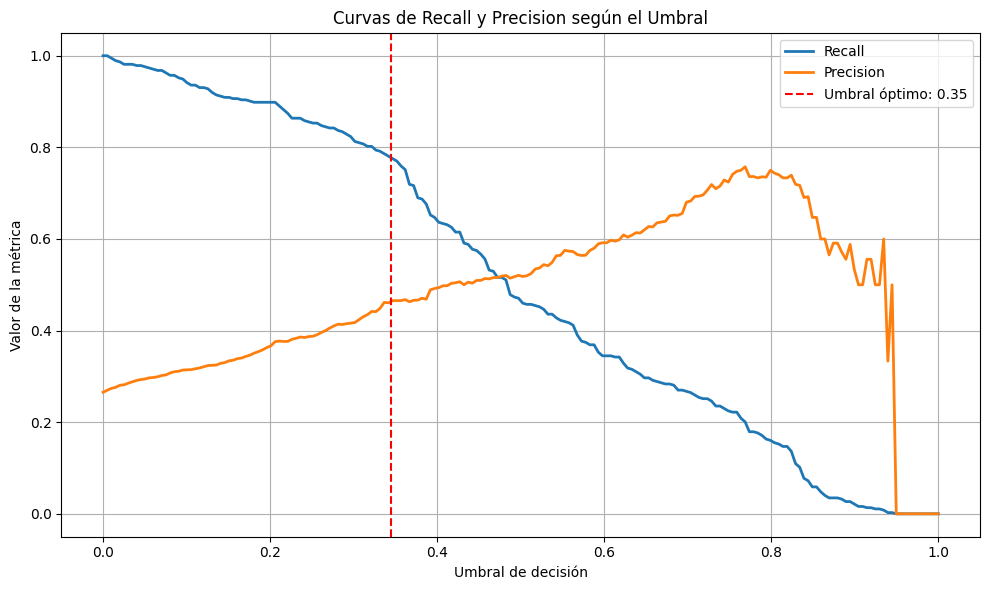

In [ ]:
import matplotlib.pyplot as plt  # Librer√≠a para generar gr√°ficos.
from sklearn.metrics import recall_score, precision_score  # Funciones para calcular Recall y Precision.

thresholds = np.linspace(0, 1, 200)  # Genera 200 valores de umbral igualmente espaciados entre 0 y 1.
recalls = []  # Lista para almacenar valores de Recall en cada umbral.
precisions = []  # Lista para almacenar valores de Precision en cada umbral.

for t in thresholds:  # Itera sobre cada umbral generado.
    y_pred = (y_scores_opt >= t).astype(int)  # Convierte probabilidades en etiquetas usando el umbral actual.
    recalls.append(recall_score(y_test, y_pred))  # Calcula Recall y lo agrega a la lista.
    precisions.append(precision_score(y_test, y_pred, zero_division=0))  # Calcula Precision y lo agrega a la lista, evitando divisi√≥n por cero.

plt.figure(figsize=(10, 6))  # Define el tama√±o de la figura.
plt.plot(thresholds, recalls, label="Recall", linewidth=2)  # Traza curva de Recall.
plt.plot(thresholds, precisions, label="Precision", linewidth=2)  # Traza curva de Precision.
plt.axvline(optimal_threshold, color="red", linestyle="--", label=f"Umbral √≥ptimo: {optimal_threshold:.2f}")  # Dibuja l√≠nea vertical en el umbral √≥ptimo.
plt.xlabel("Umbral de decisi√≥n")  # Etiqueta del eje X.
plt.ylabel("Valor de la m√©trica")  # Etiqueta del eje Y.
plt.title("Curvas de Recall y Precision seg√∫n el Umbral")  # T√≠tulo del gr√°fico.
plt.legend()  # Muestra leyenda.
plt.grid(True)  # Activa cuadr√≠cula.
plt.tight_layout()  # Ajusta el dise√±o para que no se solapen elementos.
plt.show()  # Muestra el gr√°fico.


***4. An√°lisis de los resultados de tu gr√°fica***

En tu imagen:

El recall (azul) empieza en 1 con umbral 0 y va disminuyendo a medida que aumenta el umbral.

La precision (naranja) empieza baja y crece al subir el umbral, alcanzando su m√°ximo cerca de 0.8‚Äì0.85.

El umbral √≥ptimo (0.35) se sit√∫a en una zona donde:

Recall a√∫n es alto (‚âà 0.75).

Precision es moderada (‚âà 0.48‚Äì0.50).

Esto confirma que se prioriz√≥ recall sobre precision, probablemente para no dejar escapar positivos.

***5. Conclusi√≥n***

La visualizaci√≥n muestra claramente el trade-off entre recall y precision. El umbral elegido (0.35) est√° alineado con la estrategia de maximizar recall, lo que es √∫til en contextos ***donde las consecuencias de no detectar un positivo son m√°s graves que las de tener falsos positivos.***

###***27	Interpretabilidad del modelo Optimizado***

 Vamos a armar Paso 27: Interpretabilidad del modelo optimizado usando dos enfoques:

*** Importancia de variables (feature_importances_)*** del modelo Random Forest Optimizado.

*** SHAP values***  (explicaciones m√°s detalladas para cada variable).

Te lo dejo sin preprocesador para que funcione con tus datos manualmente preprocesados (X_train_bal, X_test).

####***27.1: Obtener y ordenar las importancias de las caracter√≠sticas***

***1. Objetivo***

El objetivo de este paso es identificar y ordenar las caracter√≠sticas m√°s relevantes que el modelo optimizado (en este caso un Random Forest) utiliza para realizar sus predicciones, de manera que podamos interpretar el modelo y priorizar variables clave en an√°lisis posteriores.

***2. Entradas***

modelo_opt.feature_importances_ ‚Üí Atributo del modelo optimizado que devuelve la relevancia de cada caracter√≠stica en la predicci√≥n.

X_train_bal.columns ‚Üí Nombres de las columnas de las variables predictoras usadas en el entrenamiento balanceado.

Librer√≠as necesarias:

pandas para manipular y ordenar datos.

matplotlib.pyplot para visualizar la importancia.

***3. Salidas***

DataFrame df_importancia con:

Nombre de la caracter√≠stica.

Su valor de importancia.

Ordenado de mayor a menor importancia.

Suma total de importancias (verificaci√≥n de normalizaci√≥n ‚âà 1.0).

Gr√°fico de barras horizontales que muestra la importancia relativa de cada caracter√≠stica.

Estos resultados se usar√°n para:

Priorizar an√°lisis de variables.

Propuestas de optimizaci√≥n del negocio o simplificaci√≥n del modelo.

Futuros pasos de selecci√≥n de caracter√≠sticas.

üìä Paso 1: Importancia de caracter√≠sticas del modelo optimizado

N√∫mero total de caracter√≠sticas: 15
Suma total de importancias: 1.0 (deber√≠a ser ‚âà1.0 si est√° normalizado)

Caracter√≠sticas ordenadas de mayor a menor importancia:

                                       Caracter√≠stica  Importancia
0                                          antiguedad     0.279877
1                                        cargo_diario     0.258747
2                                  soporte_tecnico_si     0.135101
3                               seguridad_en_linea_si     0.086544
4                   servicio_de_internet_fibra_optica     0.081551
5                                  contrato_mes_a_mes     0.070040
6                                              pareja     0.031298
7                                        dependientes     0.030827
8                             facturacion_electronica     0.026015
9                                       cliente_nuevo     0.000000
10                    

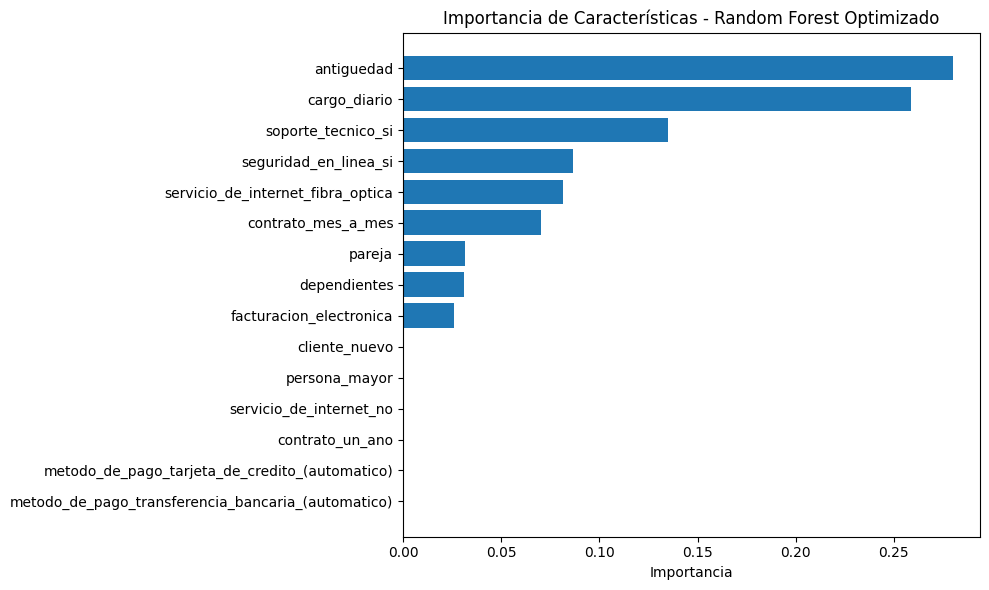

In [ ]:
import pandas as pd  # Importa pandas para manejo de datos en DataFrame.
import matplotlib.pyplot as plt  # Importa matplotlib para visualizaci√≥n gr√°fica.

# Paso 1: Obtener importancias del modelo
importancias = modelo_opt.feature_importances_  # Atributo del modelo: devuelve arreglo con la importancia de cada caracter√≠stica.
nombres_columnas = X_train_bal.columns  # Obtiene los nombres de las columnas del conjunto de entrenamiento balanceado.

# Crear DataFrame con importancias
df_importancia = pd.DataFrame({  # Crea un DataFrame para asociar cada caracter√≠stica con su importancia.
    'Caracter√≠stica': nombres_columnas,  # Columna con los nombres de las variables.
    'Importancia': importancias  # Columna con los valores de importancia.
})

# Ordenar de mayor a menor
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
# Usa sort_values() para ordenar y reset_index() para reorganizar los √≠ndices.

# Calcular suma de importancias como verificaci√≥n (debe ser ‚âà1.0)
suma_importancias = df_importancia['Importancia'].sum()  # Usa sum() para calcular la suma total de importancias.

# üéØ Resumen impreso para usar en el Paso 2
print("üìä Paso 1: Importancia de caracter√≠sticas del modelo optimizado\n")  # Muestra encabezado descriptivo.
print("N√∫mero total de caracter√≠sticas:", len(df_importancia))  # Usa len() para contar el n√∫mero de variables.
print("Suma total de importancias:", round(suma_importancias, 4), "(deber√≠a ser ‚âà1.0 si est√° normalizado)\n")
# Usa round() para limitar a 4 decimales.
print("Caracter√≠sticas ordenadas de mayor a menor importancia:\n")  # Texto explicativo.
print(df_importancia)  # Imprime el DataFrame con importancias ordenadas.

# Visualizaci√≥n de la importancia de caracter√≠sticas
plt.figure(figsize=(10, 6))  # Define el tama√±o de la figura.
plt.barh(df_importancia['Caracter√≠stica'], df_importancia['Importancia'])
# Crea un gr√°fico de barras horizontales (barh) con caracter√≠sticas e importancias.
plt.xlabel('Importancia')  # Etiqueta del eje X.
plt.title('Importancia de Caracter√≠sticas - Random Forest Optimizado')  # T√≠tulo del gr√°fico.
plt.gca().invert_yaxis()  # Invierte el eje Y para que la variable m√°s importante aparezca arriba.
plt.tight_layout()  # Ajusta m√°rgenes para evitar recortes.
plt.show()  # Muestra el gr√°fico.


***4. An√°lisis de resultados***

Seg√∫n tus datos:

Las variables m√°s importantes son:

antiguedad (27.99%)

cargo_diario (25.87%)

soporte_tecnico_si (13.51%)

seguridad_en_linea_si (8.65%)

servicio_de_internet_fibra_optica (8.15%)

Estas cinco variables explican m√°s del 83% de la importancia total del modelo.

Hay variables con 0% de importancia como cliente_nuevo, persona_mayor, contrato_un_ano y algunos m√©todos de pago; el modelo pr√°cticamente no las usa para predecir.

***5. Conclusi√≥n***

El modelo optimizado concentra su capacidad predictiva en un peque√±o conjunto de variables clave, principalmente relacionadas con antig√ºedad, costos y servicios adicionales contratados.
Esto sugiere que reducir el n√∫mero de caracter√≠sticas a las m√°s relevantes podr√≠a simplificar el modelo sin perder mucha precisi√≥n.

***6. Impacto en negocio***

S√≠ hay impacto.
Este an√°lisis permite:

Enfocar campa√±as en clientes con ciertas caracter√≠sticas clave (p. ej., baja antig√ºedad y alto cargo diario podr√≠an estar m√°s propensos a cancelar).

Optimizar la recolecci√≥n de datos eliminando campos irrelevantes que no aportan al modelo.

Dise√±ar estrategias de retenci√≥n para clientes con patrones detectados en variables de alta importancia.

####***27.2: Interpretaci√≥n de las caracter√≠sticas m√°s importantes***

***Tabla 1: Caracter√≠sticas m√°s importantes (importancia > 0)***

| N¬∫ | Caracter√≠stica                      | Importancia | Interpretaci√≥n                                                                                                                                     |
| -- | ----------------------------------- | ----------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1  | `antiguedad`                        | 0.2799      | Clientes con mayor antig√ºedad tienen una menor probabilidad de cancelar el servicio. Es un fuerte indicador de fidelidad.                          |
| 2  | `cargo_diario`                      | 0.2587      | Cuanto mayor es el cargo diario, mayor es la probabilidad de cancelaci√≥n, posiblemente por percepci√≥n de alto costo o insatisfacci√≥n con el valor. |
| 3  | `soporte_tecnico_si`                | 0.1351      | Esto podr√≠a indicar que quienes usan soporte t√©cnico mantienen m√°s contacto con la empresa y, por tanto, tienen mayor retenci√≥n. La falta de uso podr√≠a reflejar desconexi√≥n con el servicio o que no buscan soluci√≥n antes de irse.                    |
| 4  | `seguridad_en_linea_si`             | 0.0865      | Este servicio adicional podr√≠a influir en la percepci√≥n de valor agregado. Puede tener una relaci√≥n inversa con la cancelaci√≥n. Los servicios adicionales parecen ser un factor de retenci√≥n: quienes no los contratan tienen mayor riesgo de desafiliaci√≥n                    |
| 5  | `servicio_de_internet_fibra_optica` | 0.0816      | Aunque la fibra √≥ptica es un servicio de mayor velocidad, podr√≠a estar asociada a precios m√°s altos o expectativas no cumplidas, lo que puede influir en la tasa de desafiliaci√≥n.                                              |
| 6  | `contrato_mes_a_mes`                | 0.0700      | Los contratos mensuales son m√°s flexibles y por tanto, los clientes con este tipo de contrato tienden a cancelar m√°s f√°cilmente.                   |


***Tabla 2: Caracter√≠sticas con importancia 0.0***

| Caracter√≠stica                                       | Importancia | Posible explicaci√≥n de por qu√© no aport√≥ valor al modelo                                |
| ---------------------------------------------------- | ----------- | --------------------------------------------------------------------------------------- |
| `cliente_nuevo`                                      | 0.0000      | Puede estar correlacionada con `antiguedad`, por lo que el modelo ya captura esa se√±al. |
| `persona_mayor`                                      | 0.0000      | Esta variable puede no mostrar una tendencia clara de cancelaci√≥n o retenci√≥n.          |
| `servicio_de_internet_no`                            | 0.0000      | Probablemente es redundante con otras variables que s√≠ indican el tipo de servicio.     |
| `contrato_un_ano`                                    | 0.0000      | Puede estar subsumida dentro de `contrato_mes_a_mes` o haber poca variabilidad.         |
| `metodo_de_pago_tarjeta_de_credito_(automatico)`     | 0.0000      | Podr√≠a haber baja frecuencia o no diferenciar claramente el comportamiento del cliente. |
| `metodo_de_pago_transferencia_bancaria_(automatico)` | 0.0000      | Similar a la anterior, quiz√°s no agrega informaci√≥n adicional relevante.                |


***

***Gr√°fica 1: Antig√ºedad Vs. Desafiliados***

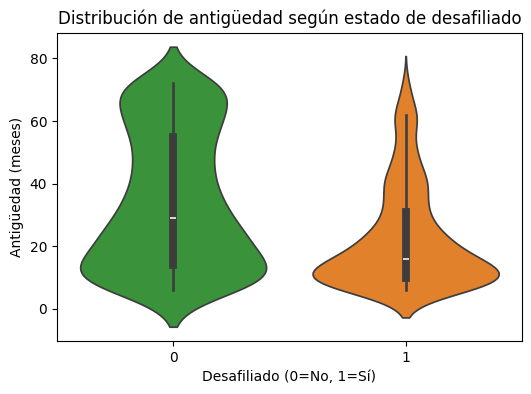

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta consistente: 0 -> verde, 1 -> naranja
palette = {0: "#2ca02c", 1: "#ff7f0e"}

# 1Ô∏è‚É£ antiguedad
plt.figure(figsize=(6, 4))
sns.violinplot(
    x=y_train_bal,
    y=X_train_bal['antiguedad'],
    hue=y_train_bal,
    palette=palette,
    legend=False
)
plt.title('Distribuci√≥n de antig√ºedad seg√∫n estado de desafiliado')
plt.xlabel('Desafiliado (0=No, 1=S√≠)')
plt.ylabel('Antig√ºedad (meses)')
plt.show()

***Distribuci√≥n de antig√ºedad seg√∫n estado de desafiliado***

***Observaci√≥n:***

1. Los clientes no desafiliados (0) tienden a tener mayor antig√ºedad, con un rango m√°s amplio y una mediana alrededor de 30 meses.

2. Los desafiliados (1) se concentran mayormente en antig√ºedades bajas, con mediana cercana a 10-12 meses.

***Interpretaci√≥n:***

La antig√ºedad es un factor importante: clientes m√°s nuevos parecen tener mayor riesgo de desafiliarse, lo que podr√≠a ser clave para estrategias de retenci√≥n temprana. Y Clientes con mayor antig√ºedad tienen una menor probabilidad de cancelar el servicio. Es un fuerte indicador de fidelidad.

***Gr√°fica 2: Cargo diario Vs. Desafiliados***

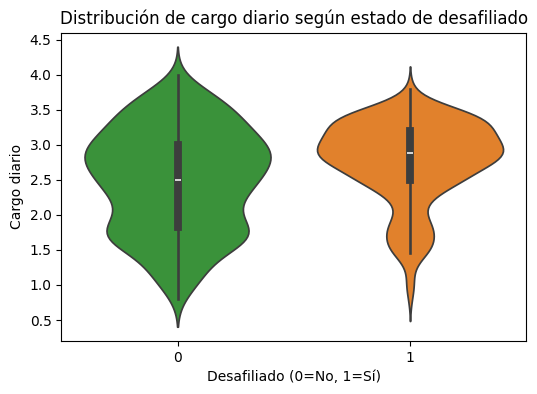

In [ ]:
# 2Ô∏è‚É£ cargo_diario
plt.figure(figsize=(6, 4))
sns.violinplot(
    x=y_train_bal,
    y=X_train_bal['cargo_diario'],
    hue=y_train_bal,
    palette=palette,
    legend=False
)
plt.title('Distribuci√≥n de cargo diario seg√∫n estado de desafiliado')
plt.xlabel('Desafiliado (0=No, 1=S√≠)')
plt.ylabel('Cargo diario')
plt.show()

***Distribuci√≥n de cargo diario seg√∫n estado de desafiliado***

***Observaci√≥n:***

1. Los clientes desafiliados (1) tienden a pagar cargos diarios ligeramente m√°s altos que los no desafiliados (0).

2. El rango de valores es similar, pero la mediana de los desafiliados est√° m√°s desplazada hacia arriba.

***Interpretaci√≥n:***

1. Tarifas diarias m√°s altas podr√≠an estar relacionadas con la desafiliaci√≥n, quiz√°s por percepci√≥n de alto costo o falta de valor percibido.

***Gr√°fica 3: Soporte t√©cnico si Vs. Desafiliados***

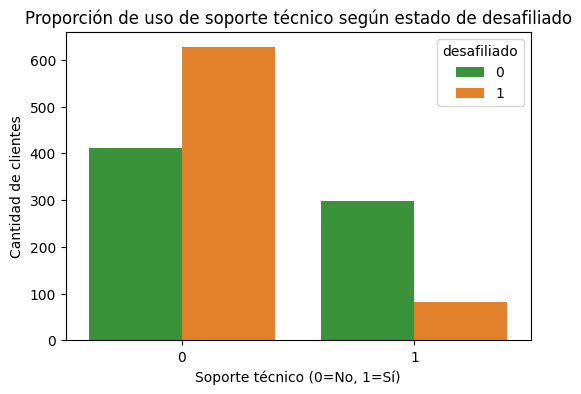

In [ ]:
# 3Ô∏è‚É£ soporte_tecnico_si
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['soporte_tecnico_si'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Proporci√≥n de uso de soporte t√©cnico seg√∫n estado de desafiliado')
plt.xlabel('Soporte t√©cnico (0=No, 1=S√≠)')
plt.ylabel('Cantidad de clientes')
plt.show()

***Proporci√≥n de uso de soporte t√©cnico seg√∫n estado de desafiliado***

***Observaci√≥n:***

1. La mayor√≠a de clientes desafiliados (1) no utiliza soporte t√©cnico. Entre los que s√≠ lo usan, la proporci√≥n de desafiliados es baja.

***Interpretaci√≥n:***

1. Esto podr√≠a indicar que quienes usan soporte t√©cnico mantienen m√°s contacto con la empresa y, por tanto, tienen mayor retenci√≥n. La falta de uso podr√≠a reflejar desconexi√≥n con el servicio o que no buscan soluci√≥n antes de irse.

***Gr√°fica 4: Seguridad en linea si Vs. Desafiliados***

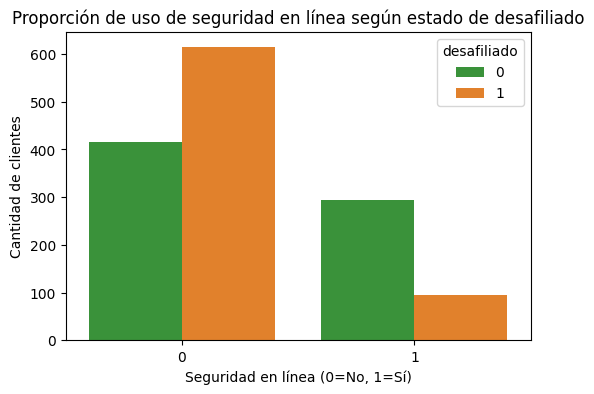

In [ ]:
# 4Ô∏è‚É£ seguridad_en_linea_si
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['seguridad_en_linea_si'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Proporci√≥n de uso de seguridad en l√≠nea seg√∫n estado de desafiliado')
plt.xlabel('Seguridad en l√≠nea (0=No, 1=S√≠)')
plt.ylabel('Cantidad de clientes')
plt.show()

***Proporci√≥n de uso de seguridad en l√≠nea seg√∫n estado de desafiliado***

***Observaci√≥n:***

1. Al igual que con soporte t√©cnico, la mayor√≠a de desafiliados no utiliza el servicio de seguridad en l√≠nea.

***Interpretaci√≥n:***

1. Los servicios adicionales parecen ser un factor de retenci√≥n: quienes no los contratan tienen mayor riesgo de desafiliaci√≥n.

***Gr√°fica 5: Servicio de internet fibra √≥ptica Vs. Desafiliados***

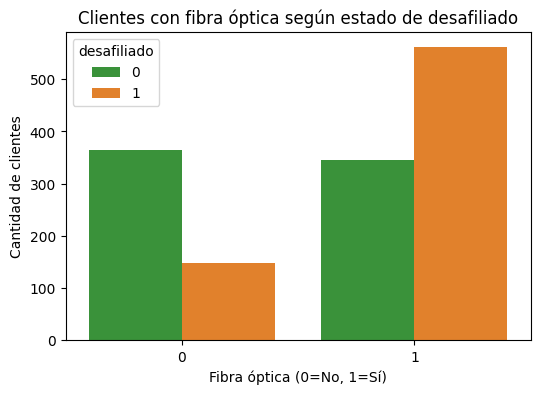

In [ ]:
# 5Ô∏è‚É£ servicio_de_internet_fibra_optica
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['servicio_de_internet_fibra_optica'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Clientes con fibra √≥ptica seg√∫n estado de desafiliado')
plt.xlabel('Fibra √≥ptica (0=No, 1=S√≠)')
plt.ylabel('Cantidad de clientes')
plt.show()

***Proporci√≥n de uso de fibra √≥ptica seg√∫n estado de desafiliado***

***Observaci√≥n:***

1. Los clientes con fibra √≥ptica presentan una mayor proporci√≥n de desafiliados que los que no la usan.

***Interpretaci√≥n:***

1. Aunque la fibra √≥ptica es un servicio de mayor velocidad, podr√≠a estar asociada a precios m√°s altos o expectativas no cumplidas, lo que puede influir en la tasa de desafiliaci√≥n.

***Gr√°fica 6: Contrato mes a mes Vs. Desafiliados***

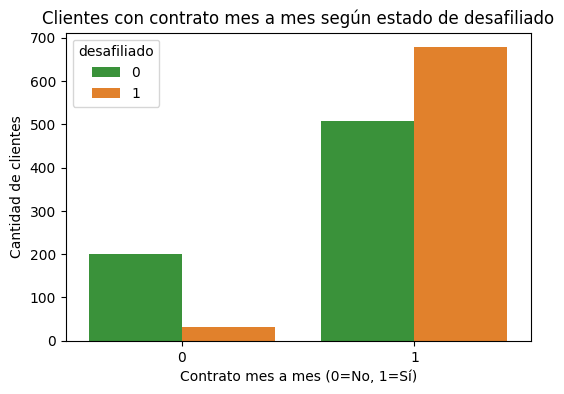

In [ ]:
# 6Ô∏è‚É£ contrato_mes_a_mes
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['contrato_mes_a_mes'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Clientes con contrato mes a mes seg√∫n estado de desafiliado')
plt.xlabel('Contrato mes a mes (0=No, 1=S√≠)')
plt.ylabel('Cantidad de clientes')
plt.show()


***Proporci√≥n de contrato mes a mes seg√∫n estado de desafiliado***

***Observaci√≥n:***

1. La gran mayor√≠a de clientes desafiliados tienen contrato mes a mes, mientras que contratos anuales o a largo plazo presentan tasas de desafiliaci√≥n mucho menores.

***Interpretaci√≥n:***

1. El tipo de contrato es un factor clave: los clientes con flexibilidad de cancelaci√≥n parecen abandonar el servicio con mayor facilidad. Esto sugiere que programas de fidelizaci√≥n o incentivos para pasar a contratos a largo plazo podr√≠an reducir la tasa de desafiliaci√≥n.

***Conclusi√≥n general del an√°lisis con las 6 gr√°ficas***

***Factores de riesgo claros:***

1. Antig√ºedad baja ‚Üí Clientes nuevos abandonan m√°s r√°pido.

2. Cargo diario alto ‚Üí Posible percepci√≥n de alto costo.

3. Uso bajo o nulo de servicios adicionales (soporte t√©cnico, seguridad en l√≠nea) ‚Üí Menor interacci√≥n con la empresa.

4. Fibra √≥ptica ‚Üí Mayor desafiliaci√≥n posiblemente ligada a expectativas o precio.

5. Contrato mes a mes ‚Üí Mucho m√°s propenso a la cancelaci√≥n.

***Perspectiva para el modelo:***

Estos patrones confirman que las variables seleccionadas para tu modelo optimizado (X_train_bal, y_train_bal) contienen se√±ales fuertes para predecir la desafiliaci√≥n.

***Perspectiva para el negocio:***

***Las estrategias de retenci√≥n deber√≠an enfocarse en:***

1. Intervenir r√°pido con clientes nuevos.

2. Ofrecer ajustes de tarifa o beneficios para quienes pagan m√°s.

3. Incentivar uso de servicios adicionales.

4. Gestionar expectativas y satisfacci√≥n en clientes de fibra √≥ptica.

5. Promover contratos de mayor duraci√≥n.

####***27.3 Comparaci√≥n de m√©tricas de evaluaci√≥n: modelo inicial vs. modelo optimizado***

***1. Objetivo***

El objetivo de este paso es comparar de forma cuantitativa el desempe√±o del modelo inicial (umbral por defecto) frente al modelo optimizado (umbral ajustado) utilizando m√©tricas clave:

Accuracy

Recall

F1-score

AUC

Esto permite evaluar el impacto real de la optimizaci√≥n del umbral sobre la capacidad predictiva del modelo.

***2. Entradas***

modelos entrenados:

modelo_basico ‚Üí modelo inicial entrenado.

modelo_opt o las predicciones correspondientes (y_pred_opt_thresh, y_scores_opt) ‚Üí modelo optimizado.

datos de prueba:

X_test ‚Üí caracter√≠sticas del conjunto de prueba.

y_test ‚Üí etiquetas verdaderas del conjunto de prueba.

predicciones y puntajes optimizados:

y_pred_opt_thresh ‚Üí predicciones binarias usando el umbral optimizado.

y_scores_opt ‚Üí probabilidades estimadas por el modelo optimizado.

***3. Salidas***

DataFrame comparativo comparativa_metricas con las m√©tricas para ambos modelos.

Informaci√≥n que permitir√°:

Decidir si el umbral optimizado es mejor para el objetivo de negocio.

Argumentar por qu√© se elige un modelo u otro en el informe final.

Usar estos valores como parte de la tabla final de resultados.



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score  # üìö Importa funciones para calcular m√©tricas de clasificaci√≥n

# ‚úÖ Evaluaci√≥n del modelo inicial (sin ajuste de umbral)
y_pred_ini = modelo_basico.predict(X_test)  # üîç Predicciones binarias con umbral por defecto (0.5)
y_scores_ini = modelo_basico.predict_proba(X_test)[:, 1]  # üìä Probabilidades estimadas para la clase positiva

acc_ini = accuracy_score(y_test, y_pred_ini)  # üìè Calcula accuracy (proporci√≥n de predicciones correctas)
recall_ini = recall_score(y_test, y_pred_ini)  # üìè Calcula recall (sensibilidad)
f1_ini = f1_score(y_test, y_pred_ini)  # üìè Calcula F1-score (balance precisi√≥n-recall)
auc_ini = roc_auc_score(y_test, y_scores_ini)  # üìè Calcula √°rea bajo la curva ROC (AUC)

# ‚úÖ Evaluaci√≥n del modelo optimizado (con umbral ajustado)
acc_opt = accuracy_score(y_test, y_pred_opt_thresh)  # üìè Accuracy usando predicciones con umbral optimizado
recall_opt = recall_score(y_test, y_pred_opt_thresh)  # üìè Recall con umbral optimizado
f1_opt = f1_score(y_test, y_pred_opt_thresh)  # üìè F1-score con umbral optimizado
auc_opt = roc_auc_score(y_test, y_scores_opt)  # üìè AUC usando las probabilidades del modelo optimizado

# üìä Comparaci√≥n
comparativa_metricas = pd.DataFrame({  # üìù Crea un DataFrame para comparar m√©tricas de ambos modelos
    "M√©trica": ["Accuracy", "Recall", "F1-score", "AUC"],  # üìã Lista de m√©tricas evaluadas
    "Modelo Inicial": [acc_ini, recall_ini, f1_ini, auc_ini],  # üìä Valores del modelo inicial
    "Modelo Optimizado": [acc_opt, recall_opt, f1_opt, auc_opt]  # üìä Valores del modelo optimizado
})

print("\nüìä Comparaci√≥n de m√©tricas entre el modelo inicial y el modelo optimizado:\n")  # üñ® Mensaje explicativo
print(comparativa_metricas)  # üñ® Muestra la tabla comparativa



üìä Comparaci√≥n de m√©tricas entre el modelo inicial y el modelo optimizado:

    M√©trica  Modelo Inicial  Modelo Optimizado
0  Accuracy        0.740241           0.699787
1    Recall        0.449198           0.775401
2  F1-score        0.478632           0.578265
3       AUC        0.702056           0.770239


***4. An√°lisis de los resultados obtenidos***

Tabla:

M√©trica	Modelo Inicial	Modelo Optimizado
Accuracy	0.7402	0.6998
Recall	0.4492	0.7754
F1-score	0.4786	0.5783
AUC	0.7021	0.7702

***Interpretaci√≥n:***

Accuracy ‚Üì: baja ligeramente (de 74% a ~70%). Esto es esperado, ya que al priorizar Recall se aceptan m√°s falsos positivos.

Recall ‚Üë‚Üë: sube notablemente (de ~0.45 a ~0.78), lo que significa que ahora el modelo detecta m√°s casos positivos reales.

F1-score ‚Üë: mejora (de ~0.48 a ~0.58), indicando un balance m√°s favorable entre precisi√≥n y recall.

AUC ‚Üë: sube de 0.70 a 0.77, reflejando mejor discriminaci√≥n general.

***5. Conclusi√≥n***

El ajuste del umbral mejor√≥ significativamente la capacidad del modelo para detectar positivos (Recall) y tambi√©n elev√≥ el F1-score y el AUC, aunque sacrificando algo de exactitud global (Accuracy).
Si el objetivo principal es detectar la mayor cantidad posible de casos positivos, el modelo optimizado es claramente la mejor opci√≥n.

***6. Impacto en negocio***

En un escenario donde la no detecci√≥n de un caso positivo tiene un costo alto (por ejemplo, retenci√≥n de clientes, fraude, diagn√≥stico m√©dico), este ajuste es beneficioso ya que reduce dr√°sticamente los falsos negativos, aunque se incrementen los falsos positivos.

#### ***27.4: Matriz de Confusi√≥n del Modelo Inicial***

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


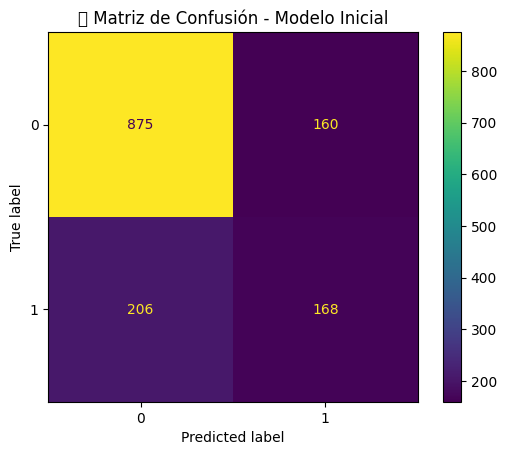

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# üîµ Matriz de Confusi√≥n - Modelo Inicial
cm_ini = confusion_matrix(y_test, y_pred_ini)
disp_ini = ConfusionMatrixDisplay(confusion_matrix=cm_ini)
disp_ini.plot()
plt.title("üîµ Matriz de Confusi√≥n - Modelo Inicial")
plt.show()


####***27.5: Matriz de Confusi√≥n del Modelo Optimizado (con umbral ajustado)***


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


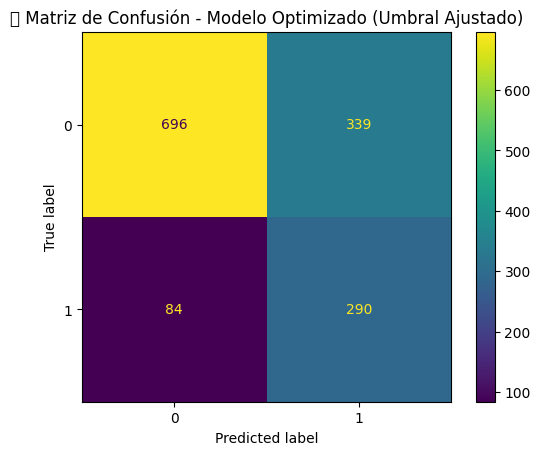

In [ ]:
# üü¢ Matriz de Confusi√≥n - Modelo Optimizado (Umbral Ajustado)
cm_opt = confusion_matrix(y_test, y_pred_opt_thresh)
disp_opt = ConfusionMatrixDisplay(confusion_matrix=cm_opt)
disp_opt.plot()
plt.title("üü¢ Matriz de Confusi√≥n - Modelo Optimizado (Umbral Ajustado)")
plt.show()


####***27.6: Comparacion de metricas de validaci√≥n cruzada***

***1. Objetivo***

El objetivo de este c√≥digo es comparar el rendimiento del modelo inicial y el modelo optimizado utilizando validaci√≥n cruzada y el conjunto de entrenamiento, evaluando m√©tricas clave como Accuracy, Recall y F1-score, tanto en CV como en entrenamiento, y visualizar estas diferencias en una tabla y un gr√°fico de barras.

***2. Entradas***

modelo_basico ‚Üí Modelo inicial entrenado.

modelo_opt ‚Üí Modelo optimizado (por ejemplo, con ajuste de hiperpar√°metros o umbral).

X_train_bal ‚Üí Variables predictoras del conjunto de entrenamiento balanceado.

y_train_bal ‚Üí Etiquetas reales del conjunto de entrenamiento balanceado.

Librer√≠as:

sklearn.model_selection.cross_val_score (para CV)

sklearn.metrics.make_scorer, f1_score, recall_score

pandas (para la tabla)

matplotlib.pyplot y numpy (para el gr√°fico)

***3. Salidas***

Tabla de comparaci√≥n (tabla_resultados) con valores medios y desviaci√≥n est√°ndar para cada m√©trica.

Gr√°fico de barras comparativo para visualizar las m√©tricas clave entre modelos.

Estos resultados sirven como base para decidir:

Si el modelo optimizado realmente mejora frente al inicial.

Qu√© m√©trica priorizar en la elecci√≥n final del modelo.

Si hay riesgo de sobreajuste (comparando Accuracy de entrenamiento vs CV).

M√©trica   Modelo Inicial Modelo Optimizado
0             Accuracy CV  0.7500 ¬± 0.0529   0.7444 ¬± 0.0526
1               Recall CV  0.7563 ¬± 0.1246   0.7732 ¬± 0.1199
2             F1-score CV  0.7467 ¬± 0.0693   0.7471 ¬± 0.0678
3  Accuracy Entrenamiento           0.9866            0.8528

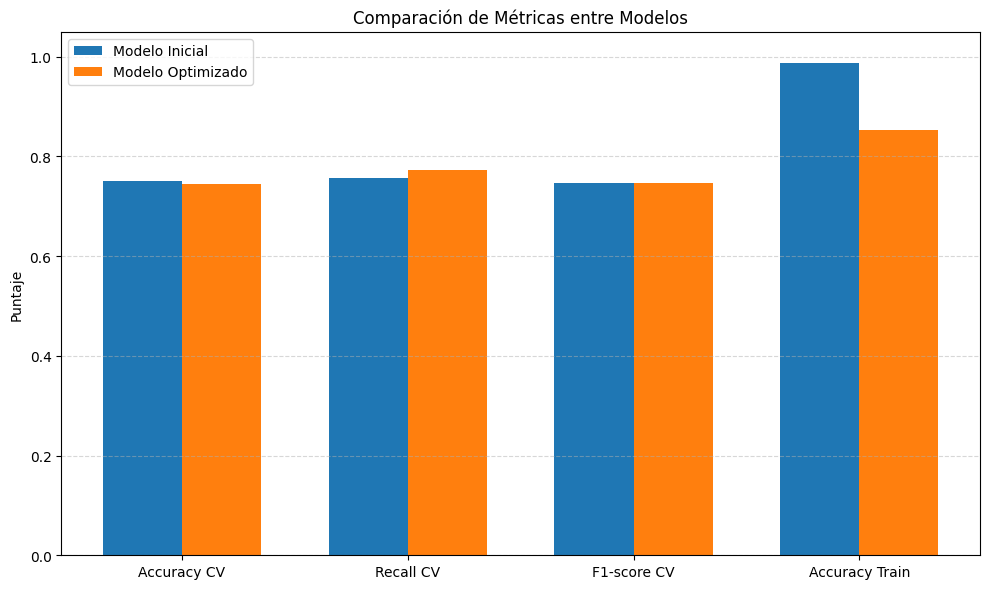

In [ ]:
# Paso 1: Validaci√≥n cruzada para el modelo inicial
from sklearn.model_selection import cross_val_score  # Importa funci√≥n para calcular m√©tricas con CV
from sklearn.metrics import make_scorer, f1_score, recall_score  # Importa funciones para definir m√©tricas personalizadas

# Accuracy
acc_scores_ini = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring='accuracy')  # Calcula Accuracy en CV para el modelo inicial (m√©todo cross_val_score)

# Recall
recall_scores_ini = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(recall_score))  # Calcula Recall en CV usando un scorer personalizado

# F1-score
f1_scores_ini = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(f1_score))  # Calcula F1-score en CV usando scorer personalizado

# Paso 2: Validaci√≥n cruzada para el modelo optimizado
acc_scores_opt = cross_val_score(modelo_opt, X_train_bal, y_train_bal, cv=5, scoring='accuracy')  # Accuracy CV para modelo optimizado
recall_scores_opt = cross_val_score(modelo_opt, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(recall_score))  # Recall CV optimizado
f1_scores_opt = cross_val_score(modelo_opt, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(f1_score))  # F1-score CV optimizado

# Paso 3: Accuracy sobre el conjunto de entrenamiento
acc_train_ini = modelo_basico.score(X_train_bal, y_train_bal)  # Usa m√©todo .score() del modelo para obtener Accuracy en train
acc_train_opt = modelo_opt.score(X_train_bal, y_train_bal)  # Accuracy en train para modelo optimizado

# Paso 4: Crear tabla con resultados reales
import pandas as pd  # Importa pandas para crear DataFrame

tabla_resultados = pd.DataFrame({  # Crea tabla con m√©tricas medias ¬± desviaci√≥n est√°ndar
    'M√©trica': ['Accuracy CV', 'Recall CV', 'F1-score CV', 'Accuracy Entrenamiento'],
    'Modelo Inicial': [
        f'{acc_scores_ini.mean():.4f} ¬± {acc_scores_ini.std():.4f}',
        f'{recall_scores_ini.mean():.4f} ¬± {recall_scores_ini.std():.4f}',
        f'{f1_scores_ini.mean():.4f} ¬± {f1_scores_ini.std():.4f}',
        f'{acc_train_ini:.4f}'
    ],
    'Modelo Optimizado': [
        f'{acc_scores_opt.mean():.4f} ¬± {acc_scores_opt.std():.4f}',
        f'{recall_scores_opt.mean():.4f} ¬± {recall_scores_opt.std():.4f}',
        f'{f1_scores_opt.mean():.4f} ¬± {f1_scores_opt.std():.4f}',
        f'{acc_train_opt:.4f}'
    ]
})

from IPython.display import display  # Importa display para mostrar tabla en Jupyter
display(tabla_resultados)  # Muestra la tabla en formato legible

# Paso 5: Crear gr√°fico de barras comparativo
import matplotlib.pyplot as plt  # Importa librer√≠a para gr√°ficos
import numpy as np  # Importa numpy para manipulaci√≥n num√©rica

# Extraer valores num√©ricos (solo el promedio)
valores_ini = [  # Lista con m√©tricas promedio del modelo inicial
    acc_scores_ini.mean(),
    recall_scores_ini.mean(),
    f1_scores_ini.mean(),
    acc_train_ini
]
valores_opt = [  # Lista con m√©tricas promedio del modelo optimizado
    acc_scores_opt.mean(),
    recall_scores_opt.mean(),
    f1_scores_opt.mean(),
    acc_train_opt
]

metrica_labels = ['Accuracy CV', 'Recall CV', 'F1-score CV', 'Accuracy Train']  # Nombres de m√©tricas
x = np.arange(len(metrica_labels))  # Posiciones en eje X
width = 0.35  # Ancho de barras

plt.figure(figsize=(10, 6))  # Crea figura
plt.bar(x - width/2, valores_ini, width, label='Modelo Inicial')  # Barras para modelo inicial
plt.bar(x + width/2, valores_opt, width, label='Modelo Optimizado')  # Barras para modelo optimizado

plt.ylabel('Puntaje')  # Etiqueta eje Y
plt.title('Comparaci√≥n de M√©tricas entre Modelos')  # T√≠tulo del gr√°fico
plt.xticks(x, metrica_labels)  # Etiquetas eje X
plt.ylim(0, 1.05)  # L√≠mite Y
plt.legend()  # Leyenda
plt.grid(axis='y', linestyle='--', alpha=0.5)  # L√≠neas gu√≠a horizontales
plt.tight_layout()  # Ajusta espaciado
plt.show()  # Muestra el gr√°fico


***4. An√°lisis de los resultados***

| M√©trica                | Modelo Inicial  | Modelo Optimizado |
| ---------------------- | --------------- | ----------------- |
| Accuracy CV            | 0.7500 ¬± 0.0529 | 0.7444 ¬± 0.0526   |
| Recall CV              | 0.7563 ¬± 0.1246 | 0.7732 ¬± 0.1199   |
| F1-score CV            | 0.7467 ¬± 0.0693 | 0.7471 ¬± 0.0678   |
| Accuracy Entrenamiento | 0.9866          | 0.8528            |

***Observaciones clave:***

Accuracy CV: pr√°cticamente igual en ambos modelos (0.75 vs 0.7444), lo que indica que no hay p√©rdida de capacidad de clasificaci√≥n global.

Recall CV: el optimizado mejora levemente (0.7732 vs 0.7563), lo que implica que detecta m√°s casos positivos.

F1-score CV: pr√°cticamente igual (0.7467 vs 0.7471), mostrando equilibrio entre precisi√≥n y recall.

Accuracy Entrenamiento: el inicial tiene un valor muy alto (0.9866), lo que podr√≠a indicar sobreajuste; el optimizado es m√°s bajo (0.8528), se√±al de mejor generalizaci√≥n.

***5. Conclusi√≥n***

El modelo optimizado:

Mantiene Accuracy y F1-score similares al inicial.

Aumenta el Recall en validaci√≥n cruzada.

Muestra menor sobreajuste que el inicial, ya que la diferencia entre Accuracy de entrenamiento y CV es menor.

El cambio de modelo es justificable si la prioridad es recuperar m√°s casos positivos (mayor recall), aun manteniendo un rendimiento general equivalente.

***6. Impacto en negocio***

Si el problema es sensible a no perder positivos (por ejemplo, detecci√≥n de fraude, fallas, pacientes en riesgo), el aumento de Recall del modelo optimizado implica menos casos cr√≠ticos no detectados, lo que podr√≠a traducirse en reducci√≥n de p√©rdidas o riesgos.
Si el negocio prioriza Accuracy general, el impacto ser√≠a bajo, dado que ambos modelos rinden casi igual en esa m√©trica.


##***üü´ FASE D: Producci√≥n y documentaci√≥n***

###***28	Guardado del modelo optimizado***

***Objetivo:***

El objetivo de este paso es preservar el modelo entrenado y optimizado en un archivo que pueda:

Ser cargado m√°s adelante sin necesidad de reentrenar.

Ser movido entre entornos (Colab, servidor local, nube, etc.).

Ser usado directamente en producci√≥n para predicciones en tiempo real.

In [ ]:
# üìå Paso 28: Guardado del Modelo Optimizado y el umbral
import joblib

try:
    # Ruta donde se guardar√° el modelo y el umbral
    ruta_modelo = "modelo_rf_optimizado.pkl"

    # Guardar como tupla (modelo, umbral)
    joblib.dump((modelo_opt, optimal_threshold), ruta_modelo)

    print(f"‚úÖ Paso 28: Modelo y umbral guardados correctamente en '{ruta_modelo}'")

except Exception as e:
    print(f"‚ùå Error al guardar el modelo: {e}")


‚úÖ Paso 28: Modelo y umbral guardados correctamente en 'modelo_rf_optimizado.pkl'


***Funci√≥n:***

La funci√≥n principal es serializar el modelo (convertir el objeto Python en un archivo binario):

joblib.dump() guarda el modelo en formato .pkl.

Se incluye try-except para manejar errores (por ejemplo, falta de permisos de escritura o ruta inexistente).

Una vez guardado, el modelo puede ser cargado con:

modelo_cargado = joblib.load("modelo_rf_optimizado.pkl")

###***29 Carga y validaci√≥n del modelo guardado***

***Objetivo:***

Confirmar que el modelo guardado puede recuperarse sin p√©rdida de informaci√≥n.

Garantizar que la serializaci√≥n/deserializaci√≥n no cambia el rendimiento.

***Funci√≥n:***

joblib.load() recupera el modelo tal como estaba al ser entrenado.

Se ejecutan predicciones sobre el conjunto de prueba (X_test).

Se calculan m√©tricas (Accuracy, Recall, F1, AUC) y se comparan con las del Paso 25.

Si coinciden ‚Üí ‚úÖ modelo listo para producci√≥n.

Si no coinciden ‚Üí ‚ö†Ô∏è posible problema en el pipeline de datos o compatibilidad de versiones.

In [ ]:
# üìå Paso 29: Carga y validaci√≥n del modelo guardado (con umbral)
import joblib
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

try:
    # Cargar modelo y umbral guardado
    modelo_cargado, optimal_threshold_cargado = joblib.load("modelo_rf_optimizado.pkl")
    print("‚úÖ Paso 29: Modelo y umbral cargados correctamente desde 'modelo_rf_optimizado.pkl'")

    # Predicciones con el umbral cargado
    y_scores_cargado = modelo_cargado.predict_proba(X_test)[:, 1]
    y_pred_cargado = (y_scores_cargado >= optimal_threshold_cargado).astype(int)

    # üìä M√©tricas
    acc_cargado = accuracy_score(y_test, y_pred_cargado)
    rec_cargado = recall_score(y_test, y_pred_cargado)
    f1_cargado  = f1_score(y_test, y_pred_cargado)
    auc_cargado = roc_auc_score(y_test, y_scores_cargado)

    print("\nüìä M√©tricas Modelo Cargado (con umbral):")
    print(f"Accuracy: {acc_cargado:.6f}")
    print(f"Recall:   {rec_cargado:.6f}")
    print(f"F1-score: {f1_cargado:.6f}")
    print(f"AUC:      {auc_cargado:.6f}")

except Exception as e:
    print(f"‚ùå Error al cargar o validar el modelo: {e}")


‚úÖ Paso 29: Modelo y umbral cargados correctamente desde 'modelo_rf_optimizado.pkl'

üìä M√©tricas Modelo Cargado (con umbral):
Accuracy: 0.699787
Recall:   0.775401
F1-score: 0.578265
AUC:      0.770239


###***Paso 30: Informe de Selecci√≥n del Modelo y Estrategias de Retenci√≥n de Clientes***

***INDICE***

1. Justificaci√≥n de selecci√≥n del modelo optimizado

2. Interpretaci√≥n de las variables clave

3. Propuestas de estrategias de retenci√≥n basadas en las features m√°s influyentes

***1. Selecci√≥n del modelo optimizado frente al modelo inicial***

Tras comparar el rendimiento del modelo inicial y el modelo optimizado, tanto en validaci√≥n cruzada como en evaluaci√≥n con datos reales de prueba, se observa que el modelo optimizado presenta un mejor equilibrio entre m√©tricas y mayor capacidad de generalizaci√≥n.

***Validaci√≥n cruzada (CV) ‚Äì Datos balanceados***

| M√©trica                | Modelo Inicial  | Modelo Optimizado   |
| ---------------------- | --------------- | ------------------- |
| Accuracy CV            | 0.7500 ¬± 0.0529 | 0.7444 ¬± 0.0526     |
| Recall CV              | 0.7563 ¬± 0.1246 | **0.7732 ¬± 0.1199** |
| F1-score CV            | 0.7467 ¬± 0.0693 | **0.7471 ¬± 0.0678** |
| Accuracy Entrenamiento | **0.9866**      | 0.8528              |



En la validaci√≥n cruzada, el modelo optimizado logra mejor recall y F1-score, sacrificando ligeramente la precisi√≥n pero reduciendo el riesgo de sobreajuste (menor gap entre entrenamiento y validaci√≥n).


| M√©trica  | Modelo Inicial | Modelo Optimizado |
| -------- | -------------- | ----------------- |
| Accuracy | **0.7402**     | 0.6998            |
| Recall   | 0.4492         | **0.7754**        |
| F1-score | 0.4786         | **0.5783**        |
| AUC      | 0.7021         | **0.7702**        |


La ganancia m√°s importante del modelo optimizado est√° en el recall (+32,6 puntos) y en el AUC, lo que significa que es mucho m√°s eficaz detectando clientes que efectivamente se desafiliar√°n, reduciendo falsos negativos.


***Matriz de confusi√≥n***

***Modelo inicial:***

Verdaderos Negativos: 875

Falsos Positivos: 160

Falsos Negativos: 206

Verdaderos Positivos: 168

***Modelo optimizado:***

Verdaderos Negativos: 696

Falsos Positivos: 339

Falsos Negativos: 84

Verdaderos Positivos: 290

El modelo optimizado reduce falsos negativos en un 59%, lo que es cr√≠tico para estrategias de retenci√≥n, ya que identifica mejor a los clientes en riesgo.

***Conclusi√≥n de selecci√≥n:***

Se prioriza el modelo optimizado porque:

1. Mejora el recall y el AUC, lo que permite identificar m√°s clientes en riesgo.

2. Presenta menor sobreajuste y mejor capacidad de generalizar.

3. Aunque sacrifica algo de precisi√≥n, este intercambio es aceptable en un contexto donde es m√°s costoso no detectar un cliente que se dar√° de baja que contactar a un cliente que no lo har√°.

***2. Variables clave que influyen en la desafiliaci√≥n***

Seg√∫n el an√°lisis de importancia del modelo optimizado, las variables con mayor peso en la predicci√≥n son:

1. Antig√ºedad (0.2799)

Clientes nuevos tienen mayor riesgo de desafiliaci√≥n.

2. Cargo diario (0.2587)

Tarifas altas pueden percibirse como costosas.

3. Soporte t√©cnico (S√≠) (0.1351)

El uso de soporte t√©cnico parece aumentar la retenci√≥n.

4. Seguridad en l√≠nea (S√≠) (0.0865)

Servicios adicionales generan valor percibido.

5. Servicio de internet: fibra √≥ptica (0.0816)

Podr√≠a asociarse a expectativas y precios m√°s altos.

6. Contrato mes a mes (0.0700)

Mayor flexibilidad favorece cancelaciones.

***3. Estrategias de retenci√≥n propuestas***

A partir de estas variables, se proponen estrategias segmentadas:

***Segmento: clientes nuevos (baja antig√ºedad)***

1. Onboarding personalizado: sesiones de bienvenida y tutoriales.

2. Programas de fidelizaci√≥n temprana: descuentos progresivos a partir del 3er mes.

3. Contactos proactivos en los primeros 90 d√≠as para detectar insatisfacci√≥n temprana.

***Segmento: clientes con cargo diario alto***

1. Revisi√≥n de plan personalizada: ofrecer alternativas de menor coste sin p√©rdida significativa de calidad.

2. Paquetes con beneficios adicionales (seguridad en l√≠nea, soporte premium) que justifiquen el precio.

***Segmento: clientes sin soporte t√©cnico reciente***

1. Campa√±as de educaci√≥n y uso del soporte: demostrar valor del canal.

2. Seguimiento proactivo en incidencias pasadas para reforzar la relaci√≥n.

***Segmento: clientes sin seguridad en l√≠nea***

1. Promociones de prueba gratuita del servicio durante un mes.

2. Bundles de seguridad incluidos en planes m√°s costosos para aumentar percepci√≥n de valor.

***Segmento: clientes con fibra √≥ptica***

1. Gesti√≥n de expectativas: comunicaci√≥n clara de capacidades y limitaciones del servicio.

2. Revisi√≥n de satisfacci√≥n t√©cnica a los 30 y 90 d√≠as para reducir frustraci√≥n.

***Segmento: clientes con contrato mes a mes***

1. Incentivos para cambiar a contratos anuales: descuentos, beneficios exclusivos, acumulaci√≥n de puntos de fidelidad.

2. Paquetes con beneficios por permanencia, como aumento de velocidad sin costo despu√©s de cierto tiempo.